In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import statistics
import math
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import pandas as pd
import matplotlib as mpl
from sklearn.cluster import KMeans


In [2]:
#Model Data
ECearth_ds = xr.open_dataset('/share/pech2273/ECEarthProcessed.nc')
NorESM_ds = xr.open_dataset('/share/pech2273/NorESMProcessed.nc')
#Droplet Data from PARSEC
ECCDNC_ds = xr.open_dataset('/share/pech2273/ECCDNCParsec.nc')
NorCDNC_ds = xr.open_dataset('/share/pech2273/NorCDNCParsec.nc')


In [3]:
#EC-Earth Activation Radius from PARSEC
ECActR = [np.float64(361.54046296644844), 
 np.float64(203.16583101639702),
 np.float64(141.33523429255584),
 np.float64(251.5108263233402),
 np.float64(304.7839531499037),
 np.float64(141.33523429255584),
 np.float64(268.14425005353365),
 np.float64(124.34457265169122),
 np.float64(92.22282316159196),
 np.float64(160.6475298965127),
 np.float64(203.16583101639702),
 np.float64(96.24531891583946),
 np.float64(207.54929878718698),
 np.float64(98.3218898207321),
 np.float64(76.1032141604749),
 np.float64(121.71839935273819),
 np.float64(157.25463349130524),
 np.float64(81.13622616582478)]
ECActRdf = np.array(ECActR).reshape(3, 6)

ECActR_df = pd.DataFrame(ECActRdf, columns=["Cluster 1", "Cluster 2", "Cluster 3","Cluster 4", "Cluster 5", "Cluster 6"], index =['Updraft 1', 'Updraft2', 'Updraft 3'])
ECActR_df

Cluster 1   Cluster 2   Cluster 3   Cluster 4   Cluster 5  \
Updraft 1  361.540463  203.165831  141.335234  251.510826  304.783953   
Updraft2   268.144250  124.344573   92.222823  160.647530  203.165831   
Updraft 3  207.549299   98.321890   76.103214  121.718399  157.254633   

            Cluster 6  
Updraft 1  141.335234  
Updraft2    96.245319  
Updraft 3   81.136226

In [4]:
#EC-Earth Activation Radius from PARSEC with Co-Condensation

ECActR_CC = [np.nan,
 np.float64(190.56312424898383),
 np.float64(127.02740777196964),
 np.float64(240.99913346981475),
 np.float64(285.87770907458366),
 np.float64(127.02740777196964),
 np.float64(207.54929878718698),
 np.float64(102.61040941702),
 np.float64(72.92254148679628),
 np.float64(141.33523429255584),
 np.float64(186.53840665982455),
 np.float64(77.74520280028237),
 np.float64(144.38465673381506),
 np.float64(74.49590453102621),
 np.float64(57.66139958192239),
 np.float64(98.3218898207321),
 np.float64(132.5679799526813),
 np.float64(64.15613419567872)]
ECActR_CCdf = np.array(ECActR_CC).reshape(3, 6)

ECActR_CC_df = pd.DataFrame(ECActR_CCdf, columns=["Cluster 1", "Cluster 2", "Cluster 3","Cluster 4", "Cluster 5", "Cluster 6"], index =['Updraft 1', 'Updraft2', 'Updraft 3'])
ECActR_CC_df

Cluster 1   Cluster 2   Cluster 3   Cluster 4   Cluster 5  \
Updraft 1         NaN  190.563124  127.027408  240.999133  285.877709   
Updraft2   207.549299  102.610409   72.922541  141.335234  186.538407   
Updraft 3  144.384657   74.495905   57.661400   98.321890  132.567980   

            Cluster 6  
Updraft 1  127.027408  
Updraft2    77.745203  
Updraft 3   64.156134

In [5]:
#Calculating the increase of Droplet Numbers of EC-Earth with Co-condensation

for i in range(6):
    if i == 0:
        mask = ECearth_ds['label'] == i  
        ECearth_ds['DropletsCCUp1'] = xr.where( mask, np.nan, ECearth_ds['DropletsCCUp1'])
        continue
    mask = ECearth_ds['label'] == i  
    ECearth_ds['DropletsCCUp1'] = xr.where( mask, ECearth_ds['Droplets']*(1+ECCDNC_ds['Percentage_Increase'][i]/100), ECearth_ds['DropletsCCUp1'])
for i in range(6):
    if i == 0:
        mask = ECearth_ds['label'] == i  
        ECearth_ds['DropletsCCUp2'] = xr.where( mask, np.nan, ECearth_ds['DropletsCCUp2'])
        continue
    mask = ECearth_ds['label'] == i  
    ECearth_ds['DropletsCCUp2'] = xr.where(mask, ECearth_ds['Droplets']* (1+ECCDNC_ds['Percentage_Increase'][i+6]/100), ECearth_ds['DropletsCCUp2'])
for i in range(6):
    if i == 0:
        mask = ECearth_ds['label'] == i  
        ECearth_ds['DropletsCCUp3'] = xr.where( mask, np.nan, ECearth_ds['DropletsCCUp3'])
        continue
    mask = ECearth_ds['label'] == i  
    ECearth_ds['DropletsCCUp3'] = xr.where(mask, ECearth_ds['Droplets']* (1+ECCDNC_ds['Percentage_Increase'][i+12]/100), ECearth_ds['DropletsCCUp3'])

In [6]:

x = xr.DataArray(np.logspace(-0.5,4, num=200), dims =['D'], coords= {'D':np.logspace(-0.5,4, num=200)})

dx = xr.DataArray(np.logspace(-0.5,4, num=200), dims =['D'], coords= {'D':np.logspace(-0.5,4, num=200)})
for i in range (1,len(dx)):
    dx[i]= np.log10(x[i]/x[i-1])
dx[0] =dx[1]

In [9]:
#Calculating the Number of Activated Aerosols Based on the Activation Diameter From PARSEC
for i in range(6):
    if i == 0:
        mask = ECearth_ds['label'] == i  
        ECearth_ds['ActivatedNumberUpdraft1'] = xr.where( mask, ECearth_ds['Tot_dis'].where(ECearth_ds['D']>ECActR[i]).sum('D')*dx[0], ECearth_ds['ActivatedNumberUpdraft1'])
        ECearth_ds['ActivatedNumberUpdraft1CC'] = xr.where( mask, np.nan, ECearth_ds['ActivatedNumberUpdraft1CC']) 
        continue
    mask = ECearth_ds['label'] == i 
    ECearth_ds['ActivatedNumberUpdraft1'] = xr.where( mask, ECearth_ds['Tot_dis'].where(ECearth_ds['D']>ECActR[i]).sum('D')*dx[0], ECearth_ds['ActivatedNumberUpdraft1'])
    ECearth_ds['ActivatedNumberUpdraft1CC'] = xr.where( mask, ECearth_ds['Tot_dis'].where(ECearth_ds['D']>ECActR_CC[i]).sum('D')*dx[0], ECearth_ds['ActivatedNumberUpdraft1CC'])

for i in range(6):
    mask = ECearth_ds['label'] == i  
    ECearth_ds['ActivatedNumberUpdraft2'] = xr.where( mask, ECearth_ds['Tot_dis'].where(ECearth_ds['D']>ECActR[i+6]).sum('D')*dx[0], ECearth_ds['ActivatedNumberUpdraft2'])
    ECearth_ds['ActivatedNumberUpdraft2CC'] = xr.where( mask, ECearth_ds['Tot_dis'].where(ECearth_ds['D']>ECActR_CC[i+6]).sum('D')*dx[0], ECearth_ds['ActivatedNumberUpdraft2CC'])

for i in range(6):
    mask = ECearth_ds['label'] == i  
    ECearth_ds['ActivatedNumberUpdraft3'] = xr.where( mask, ECearth_ds['Tot_dis'].where(ECearth_ds['D']>ECActR[i+12]).sum('D')*dx[0], ECearth_ds['ActivatedNumberUpdraft3'])
    ECearth_ds['ActivatedNumberUpdraft3CC'] = xr.where( mask, ECearth_ds['Tot_dis'].where(ECearth_ds['D']>ECActR_CC[i+12]).sum('D')*dx[0], ECearth_ds['ActivatedNumberUpdraft3CC'])

1
2
3
4
5


In [10]:
#Group the Data by K-means Cluster
NorGroup = NorESM_ds.groupby(NorESM_ds['label'])
ECGroup = ECearth_ds.groupby(ECearth_ds['label'])

In [12]:
# For the Histograms
minimum = 1
maximum = 4


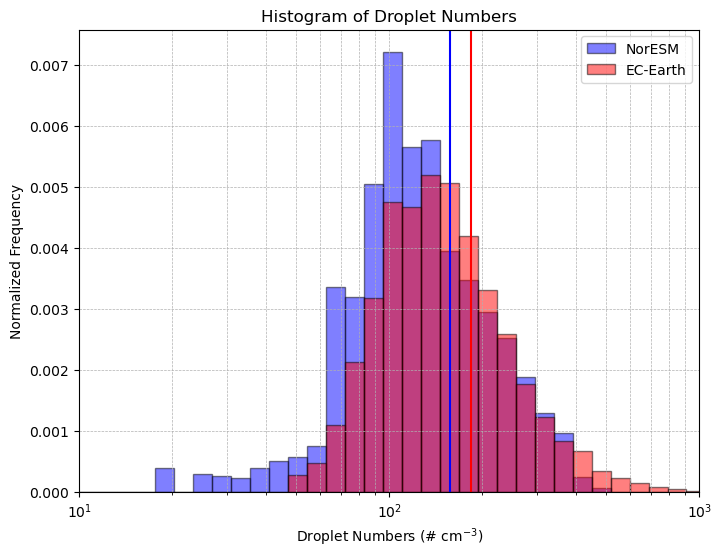

In [13]:
bins = np.logspace(minimum, maximum, 50)

plt.figure(figsize=(8, 6))
plt.hist(NorESM_ds['Droplets'].isel(lev = -1), bins=bins, alpha=0.5, label='NorESM', color='blue', edgecolor='black', density=True)
plt.hist(ECearth_ds['Droplets'].isel(lev = 0), bins=bins, alpha=0.5, label='EC-Earth', color='red', edgecolor='black', density=True)
plt.axvline(ECearth_ds['Droplets'].isel(lev = 0).median(), color = 'red')
plt.axvline(NorESM_ds['Droplets'].isel(lev = -1).median(), color = 'blue')

plt.xlim([10,10**3])
plt.xscale('log')
plt.ylabel('Normalized Frequency')
plt.xlabel(r'$\text{Droplet Numbers } (\#\ \text{cm}^{-3})$')
plt.title('Histogram of Droplet Numbers')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

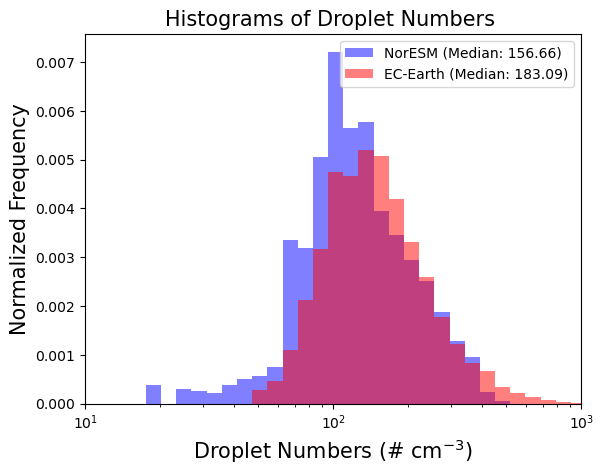

In [14]:

bins = np.logspace(minimum, maximum, 50)
data1 = NorESM_ds['Droplets'].isel(lev = -1)
data2 = ECearth_ds['Droplets'].isel(lev = 0)  
median1 = np.median(data1.dropna('time'))
median2 = np.median(data2.dropna('time'))
fig, ax = plt.subplots()
ax.hist(data1, bins=bins, alpha=0.5, label=f"NorESM (Median: {median1:.2f})", color="blue", density = True)
ax.hist(data2, bins=bins, alpha=0.5, label=f"EC-Earth (Median: {median2:.2f})", color="red", density = True)
plt.xscale('log')
legend = ax.legend(loc="upper right", frameon=True)
plt.xlim([10,1E3])
plt.xlabel(r'$\text{Droplet Numbers } (\#\ \text{cm}^{-3})$', fontsize = 15)
plt.ylabel("Normalized Frequency", fontsize = 15)
plt.title("Histograms of Droplet Numbers ", fontsize = 15)
plt.show()


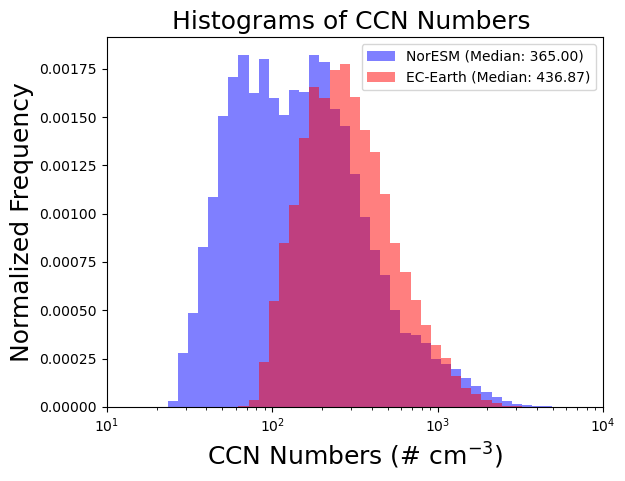

In [15]:

bins = np.logspace(minimum, maximum, 50)
data1 = NorESM_ds['TotN70'].isel(lev = -1)
data2 = ECearth_ds['TotN70'].isel(lev = 0)/1E6 
median1 = np.median(data1.dropna('time'))
median2 = np.median(data2.dropna('time'))
fig, ax = plt.subplots()
ax.hist(data1, bins=bins, alpha=0.5, label=f"NorESM (Median: {median1:.2f})", color="blue", density = True)
ax.hist(data2, bins=bins, alpha=0.5, label=f"EC-Earth (Median: {median2:.2f})", color="red", density = True)
plt.xscale('log')
legend = ax.legend(loc="upper right", frameon=True)
plt.xlim([10,1E4])
plt.xlabel(r'$\text{CCN Numbers } (\#\ \text{cm}^{-3})$', fontsize = 18)
plt.ylabel("Normalized Frequency", fontsize = 18)
plt.title("Histograms of CCN Numbers ", fontsize = 18)
plt.show()


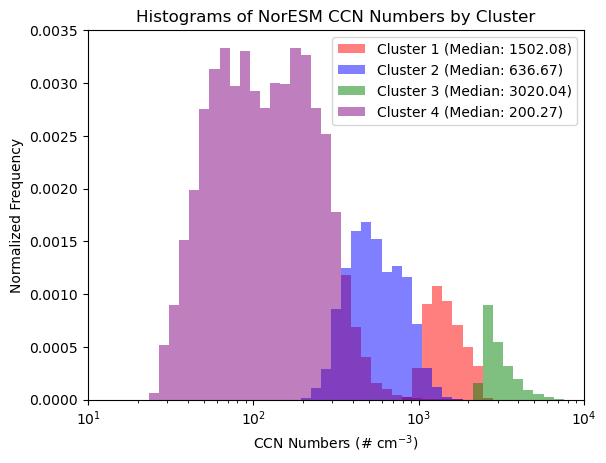

In [127]:
fig, ax = plt.subplots()
bins = np.logspace(minimum, maximum, 50)
Norcolors = ['red','blue','green','purple']
for i in range(4):
    data = NorESM_ds['TotN70'].isel(lev = -1).where(NorESM_ds['label'] == i)
    median = np.median(data.dropna('time'))
    ax.hist(data, bins=bins, alpha=0.5, label=f"Cluster {i+1} (Median: {median:.2f})", color=Norcolors[i], density = True)

plt.xscale('log')
legend = ax.legend(loc="upper right", frameon=True)
plt.xlim([10,1E4])
plt.xlabel(r'$\text{CCN Numbers } (\#\ \text{cm}^{-3})$')
plt.ylabel("Normalized Frequency")
plt.title("Histograms of NorESM CCN Numbers by Cluster")
plt.show()


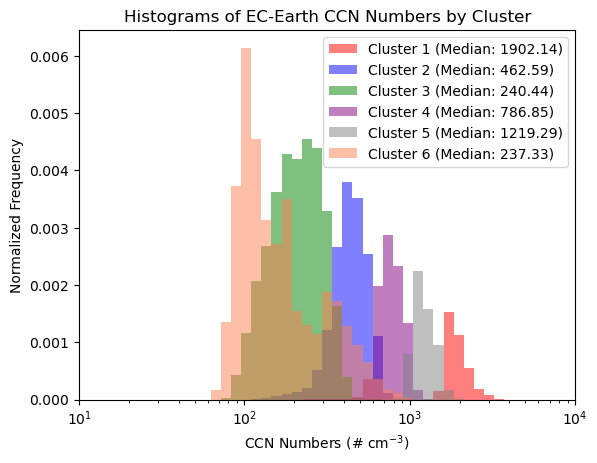

In [130]:

bins = np.logspace(minimum, maximum, 50)
fig, ax = plt.subplots()
ECcolors = ['red','blue','green','purple','gray', 'coral']
for i in range(6):
    data = ECearth_ds['TotN70'].isel(lev = 0).where(ECearth_ds['label'] == i)/1E6
    median = np.median(data.dropna('time'))
    ax.hist(data, bins=bins, alpha=0.5, label=f"Cluster {i+1} (Median: {median:.2f})", color=ECcolors[i], density = True)

plt.xscale('log')
legend = ax.legend(loc="upper right", frameon=True)
plt.xlim([10,1E4])
plt.xlabel(r'$\text{CCN Numbers } (\#\ \text{cm}^{-3})$')
plt.ylabel("Normalized Frequency")
plt.title("Histograms of EC-Earth CCN Numbers by Cluster")
plt.show()


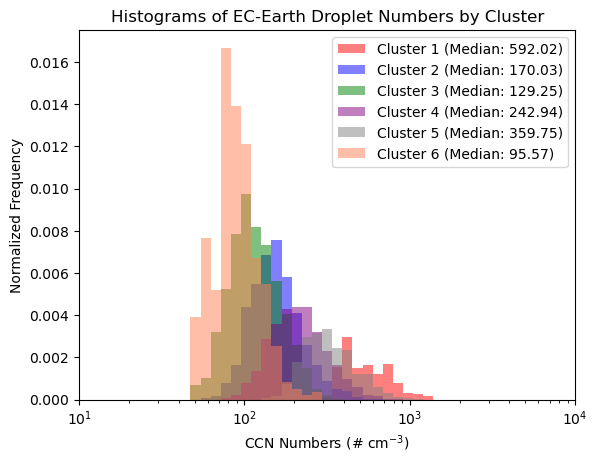

In [132]:

bins = np.logspace(minimum, maximum, 50)
fig, ax = plt.subplots()
ECcolors = ['red','blue','green','purple','gray', 'coral']
for i in range(6):
    data = ECearth_ds['Droplets'].isel(lev = 0).where(ECearth_ds['label'] == i)
    median = np.median(data.dropna('time'))
    ax.hist(data, bins=bins, alpha=0.5, label=f"Cluster {i+1} (Median: {median:.2f})", color=ECcolors[i], density = True)

plt.xscale('log')
legend = ax.legend(loc="upper right", frameon=True)
plt.xlim([10,1E4])
plt.xlabel(r'$\text{CCN Numbers } (\#\ \text{cm}^{-3})$')
plt.ylabel("Normalized Frequency")
plt.title("Histograms of EC-Earth Droplet Numbers by Cluster")
plt.show()


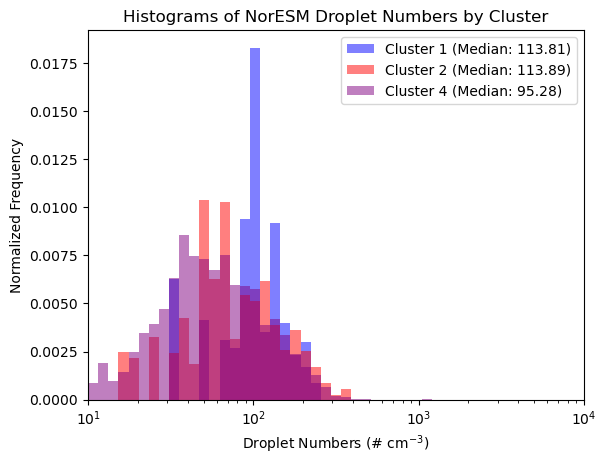

In [20]:

bins = np.logspace(minimum, maximum, 50)
data1 = NorESM_ds['Droplets'].isel(lev = -3).where(NorESM_ds['label'] == 0)
data2 = NorESM_ds['Droplets'].isel(lev = -3).where(NorESM_ds['label'] == 1)
#data3 = NorESM_ds['Droplets'].isel(lev = -1).where(NorESM_ds['label'] == 2)
data4 = NorESM_ds['Droplets'].isel(lev = -3).where(NorESM_ds['label'] == 3)
median1 = np.median(data1.dropna('time'))
median2 = np.median(data2.dropna('time'))
median3 = np.median(data3.dropna('time'))
median4 = np.median(data4.dropna('time'))
fig, ax = plt.subplots()
ax.hist(data1, bins=bins, alpha=0.5, label=f"Cluster 1 (Median: {median1:.2f})", color="blue", density = True)
ax.hist(data2, bins=bins, alpha=0.5, label=f"Cluster 2 (Median: {median2:.2f})", color="red", density = True)
#ax.hist(data3, bins=bins, alpha=0.5, label=f"Cluster 3 (Median: {median3:.2f})", color="green", density = True)
ax.hist(data4, bins=bins, alpha=0.5, label=f"Cluster 4 (Median: {median4:.2f})", color="purple", density = True)
plt.xscale('log')
legend = ax.legend(loc="upper right", frameon=True)
plt.xlim([10,1E4])
plt.xlabel(r'$\text{Droplet Numbers } (\#\ \text{cm}^{-3})$')
plt.ylabel("Normalized Frequency")
plt.title("Histograms of NorESM Droplet Numbers by Cluster")
plt.show()


In [21]:
from scipy.stats import bootstrap

data_tuple = (ECearth_ds['Droplets'].isel(lev=0).dropna('time'),)
data_tuple1 = (NorESM_ds['Droplets'].isel(lev=-1).dropna('time'),)

bootstrap_ci1 = bootstrap(data_tuple, np.median, confidence_level=0.95,random_state=1, method='percentile')
bootstrap_ci2 = bootstrap(data_tuple1, np.median, confidence_level=0.95,random_state=1, method='percentile')
print(bootstrap_ci1.confidence_interval)
print(bootstrap_ci2.confidence_interval)


ConfidenceInterval(low=np.float32(180.5274), high=np.float32(186.2163))
ConfidenceInterval(low=np.float32(148.14381), high=np.float32(164.3857))


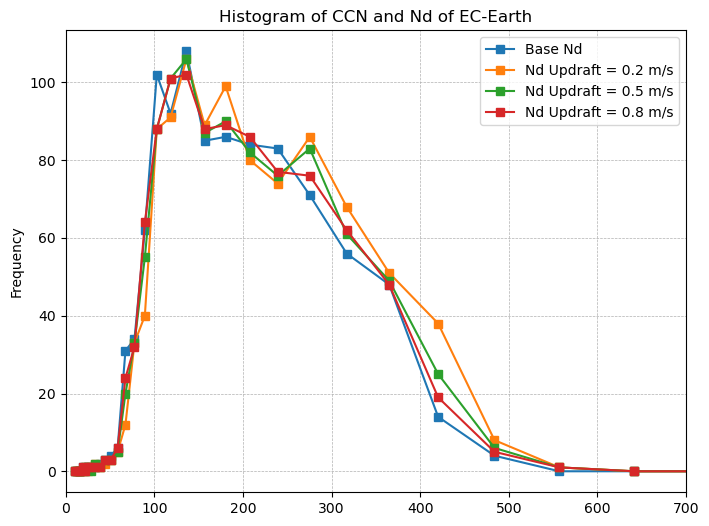

In [22]:
bins = np.logspace(minimum, maximum, 50)
hist_Droplets, bin_edges = np.histogram( NorESM_ds['Droplets'].isel(lev=-1), bins=bins)
hist_Droplets1, bin_edges = np.histogram( NorESM_ds['DropletsCCUp1'].isel(lev=-1), bins=bins)
hist_Droplets2, bin_edges = np.histogram( NorESM_ds['DropletsCCUp2'].isel(lev=-1), bins=bins)
hist_Droplets3, bin_edges = np.histogram( NorESM_ds['DropletsCCUp3'].isel(lev=-1), bins=bins)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, hist_Droplets, marker='s', linestyle='-', label='Base Nd')
plt.plot(bin_centers, hist_Droplets1, marker='s', linestyle='-', label='Nd Updraft = 0.2 m/s')
plt.plot(bin_centers, hist_Droplets2, marker='s', linestyle='-', label='Nd Updraft = 0.5 m/s')
plt.plot(bin_centers, hist_Droplets3, marker='s', linestyle='-', label='Nd Updraft = 0.8 m/s')

plt.xlim([0,700])
plt.ylabel('Frequency')
plt.title('Histogram of CCN and Nd of EC-Earth')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In [23]:
NorActR = [np.float64(171.27179794508717),
 np.float64(129.7681272383768),
 np.float64(226.04956544882387),
 np.float64(82.88680612635326),
 np.float64(127.02740777196964),
 np.float64(92.22282316159196),
 np.float64(174.96712605504354),
 np.float64(60.17642489833283),
 np.float64(107.08598197131427),
 np.float64(79.42261867825579),
 np.float64(147.49987294031467),
 np.float64(50.72961548053402)]
NorActR= np.array(NorActR).reshape(3, 4)

NorActR_df = pd.DataFrame(NorActR, columns=["Cluster 1", "Cluster 2", "Cluster 3","Cluster 4"], index =['Updraft 1', 'Updraft2', 'Updraft 3'])

In [24]:
NorActR_CC = [np.float64(167.65451563806593),
 np.float64(121.71839935273819),
 np.float64(221.2753696768497),
 np.float64(74.49590453102621),
 np.float64(119.14769117018751),
 np.float64(82.88680612635326),
 np.float64(171.27179794508717),
 np.float64(54.08456923060725),
 np.float64(98.3218898207321),
 np.float64(68.39903769437733),
 np.float64(138.3502160437893),
 np.float64(46.57782066434512)]
NorActR_CC= np.array(NorActR_CC).reshape(3, 4)

NorActR_CC_df = pd.DataFrame(NorActR_CC, columns=["Cluster 1", "Cluster 2", "Cluster 3","Cluster 4"], index =['Updraft 1', 'Updraft2', 'Updraft 3'])

In [25]:
VarNamesReOrder = ['Lev1Up1NoCC','Lev2Up1NoCC','Lev3Up1NoCC',\
                   'Lev1Up1CC','Lev2Up1CC','Lev3Up1CC',\
                   'Lev1Up2NoCC','Lev2Up2NoCC','Lev3Up2NoCC',\
                   'Lev1Up2CC','Lev2Up2CC','Lev3Up2CC',\
                   'Lev1Up3NoCC','Lev2Up3NoCC','Lev3Up3NoCC',\
                   'Lev1Up3CC','Lev2Up3CC','Lev3Up3CC']
VarLev3 = ['Lev3Up1NoCC','Lev3Up1CC','Lev3Up2NoCC','Lev3Up2CC','Lev3Up3NoCC','Lev3Up3CC']

In [26]:
NorDiameterUp1NoCC = []
NorDiameterUp2NoCC = []
NorDiameterUp3NoCC = []
NorDiameterUp1CC = []
NorDiameterUp2CC = []
NorDiameterUp3CC = []

ListVarNor = [NorDiameterUp1NoCC,NorDiameterUp2NoCC,NorDiameterUp3NoCC,NorDiameterUp1CC,NorDiameterUp2CC,NorDiameterUp3CC]
for z in [-1,-2,-3]:
    ClusterWeight = []
    for i in range(4):
        ClusterWeight.append(len(NorGroup[i]['Droplets'].isel(lev = z).dropna('time'))/len(NorESM_ds['Droplets'].isel(lev = z).dropna('time')))
    for i in range(3):
        ListVarNor[i].append(sum(ClusterWeight*NorActR_df.values[i]))
        ListVarNor[i+3].append(sum(ClusterWeight*NorActR_CC_df.values[i]))


In [27]:
NorDiameterUp1NoCC = []
NorDiameterUp2NoCC = []
NorDiameterUp3NoCC = []
NorDiameterUp1CC = []
NorDiameterUp2CC = []
NorDiameterUp3CC = []

ListVarNor = [NorDiameterUp1NoCC,NorDiameterUp2NoCC,NorDiameterUp3NoCC,NorDiameterUp1CC,NorDiameterUp2CC,NorDiameterUp3CC]
for z in [-1,-2,-3]:
    ClusterWeight = []
    for i in range(4):
        ClusterWeight.append(len(NorGroup[i]['Droplets'].isel(lev = z).dropna('time'))/len(NorESM_ds['Droplets'].isel(lev = z).dropna('time')))
    for i in range(3):
        ListVarNor[i].append(sum(ClusterWeight*NorActR_df.values[i]))
        ListVarNor[i+3].append(sum(ClusterWeight*NorActR_CC_df.values[i]))



In [28]:
ECDiameterUp1NoCC = []
ECDiameterUp2NoCC = []
ECDiameterUp3NoCC = []
ECDiameterUp1CC = []
ECDiameterUp2CC = []
ECDiameterUp3CC = []
ListVarEC = [ECDiameterUp1NoCC,ECDiameterUp2NoCC,ECDiameterUp3NoCC,ECDiameterUp1CC,ECDiameterUp2CC,ECDiameterUp3CC]

for z in [0,1,2]:
    ClusterWeight = []
    for i in range(6):
        ClusterWeight.append(len(ECGroup[i]['Droplets'].isel(lev = z).dropna('time'))/len(ECearth_ds['Droplets'].isel(lev = z).dropna('time')))
    for i in range(3):
        if i == 0:
            ListVarEC[i].append(sum(ClusterWeight*ECActR_df.values[i]))
            ListVarEC[i+3].append(sum(ClusterWeight[1:]*ECActR_CC_df.iloc[0][1:]))
            continue
        ListVarEC[i].append(sum(ClusterWeight*ECActR_df.values[i]))
        ListVarEC[i+3].append(sum(ClusterWeight*ECActR_CC_df.values[i]))

In [29]:
ListNames = ['Lev1Up1NoCC','Lev2Up1NoCC','Lev3Up1NoCC','Lev1Up2NoCC','Lev2Up2NoCC','Lev3Up2NoCC','Lev1Up3NoCC','Lev2Up3NoCC','Lev3Up3NoCC',\
             'Lev1Up1CC','Lev2Up1CC','Lev3Up1CC','Lev1Up2CC','Lev2Up2CC','Lev3Up2CC','Lev1Up3CC','Lev2Up3CC','Lev3Up3CC']
for i in range(0,18,3):
    NorESM_ds[ListNames[i]] = NorESM_ds['Tot_dis'].isel(lev = -1).where(NorESM_ds['D']>ListVarNor[int(i/3)][0]).sum('D')*dx[0]
    NorESM_ds[ListNames[i+1]] = NorESM_ds['Tot_dis'].isel(lev = -2).where(NorESM_ds['D']>ListVarNor[int(i/3)][1]).sum('D')*dx[0]
    NorESM_ds[ListNames[i+2]] = NorESM_ds['Tot_dis'].isel(lev = -3).where(NorESM_ds['D']>ListVarNor[int(i/3)][2]).sum('D')*dx[0]
for i in range(0,18,3):
    ECearth_ds[ListNames[i]] = ECearth_ds['Tot_dis'].isel(lev = 0).where(ECearth_ds['D']>ListVarEC[int(i/3)][0]).sum('D')*dx[0]
    ECearth_ds[ListNames[i+1]] = ECearth_ds['Tot_dis'].isel(lev = 1).where(ECearth_ds['D']>ListVarEC[int(i/3)][1]).sum('D')*dx[0]
    ECearth_ds[ListNames[i+2]] = ECearth_ds['Tot_dis'].isel(lev = 2).where(ECearth_ds['D']>ListVarEC[int(i/3)][2]).sum('D')*dx[0]

In [30]:
def NdtoCCNGraph(x,y):
    
    x = x.to_numpy()
    y = y.to_numpy()
    Y = np.log10(y)
    X = np.log10(x)
    X = sm.add_constant(X)
    model = sm.OLS(Y,X).fit()
    res = stats.linregress(np.log10(x),np.log10(y))
    lims = [1,10000]
    fig = plt.hexbin(x,y,gridsize=50, bins= 'log', xscale='log', yscale='log',edgecolors = 'face', cmap ='inferno',extent = [0,4,0,4], mincnt = 1)
    plt.xlim(lims)
    plt.ylim(lims)
    plt.plot([1,10000],[10**res.intercept*1**res.slope,10**res.intercept*10000**res.slope])
    plt.plot(lims,lims)
    plt.colorbar(label='counts')
    plt.xlabel('CCN, $cm^{-3}$')
    plt.ylabel('Nd, $cm^{-3}$')
    return fig
    
def Susceptibility(x,y):
    x = x.to_numpy()
    y = y.to_numpy()
    Y = np.log10(y)
    X = np.log10(x)
    X = sm.add_constant(X)
    model = sm.OLS(Y,X).fit()
    parameters = model.params
    sterrs = model.bse
    S = parameters[1]
    Sterr = sterrs[1]
    return S, Sterr
    
def SusceptibilityGraph(model):

    parameters = model.params
    sterrs = model.bse
    S = parameters[1]
    Sterr = sterrs[1]
    return S, Sterr

In [31]:
SensitivityEC = []
YerrEC= []
BaseCaselev1EC = Susceptibility(ECearth_ds['TotN70'].isel(lev = 0).where(ECearth_ds['Droplets'].isel(lev = 0)>0).dropna('time')/1E6,ECearth_ds['Droplets'].isel(lev = 0).dropna('time'))
BaseCaselev2EC = Susceptibility(ECearth_ds['TotN70'].isel(lev = 1).where(ECearth_ds['Droplets'].isel(lev = 1)>0).dropna('time')/1E6,ECearth_ds['Droplets'].isel(lev = 1).dropna('time'))
BaseCaselev3EC = Susceptibility(ECearth_ds['TotN70'].isel(lev = 2).where(ECearth_ds['Droplets'].isel(lev = 2)>0).dropna('time')/1E6,ECearth_ds['Droplets'].isel(lev = 2).dropna('time'))

for name in [BaseCaselev1EC,BaseCaselev2EC, BaseCaselev3EC]:
    SensitivityEC.append(name[0])
    YerrEC.append(name[1]*1.96)
    
for i in range (18):
    z = [0,1, 2][i % 3]
    if i in [3,4,5]:
        SensitivityEC.append(Susceptibility(ECearth_ds[VarNamesReOrder[i]].where(ECearth_ds['DropletsCCUp1'].isel(lev = z)>0).dropna('time')/1E6,ECearth_ds['DropletsCCUp1'].isel(lev = z).dropna('time'))[0])
        YerrEC.append(Susceptibility(ECearth_ds[VarNamesReOrder[i]].where(ECearth_ds['DropletsCCUp1'].isel(lev = z)>0).dropna('time')/1E6,ECearth_ds['DropletsCCUp1'].isel(lev = z).dropna('time'))[1]*1.96)
        continue
    if i in [9,10,11]:
        SensitivityEC.append(Susceptibility(ECearth_ds[VarNamesReOrder[i]].where(ECearth_ds['DropletsCCUp2'].isel(lev = z)>0).dropna('time')/1E6,ECearth_ds['DropletsCCUp2'].isel(lev = z).dropna('time'))[0])
        YerrEC.append(Susceptibility(ECearth_ds[VarNamesReOrder[i]].where(ECearth_ds['DropletsCCUp2'].isel(lev = z)>0).dropna('time')/1E6,ECearth_ds['DropletsCCUp2'].isel(lev = z).dropna('time'))[1]*1.96)
        continue
    if i in [15,16,17]:
        SensitivityEC.append(Susceptibility(ECearth_ds[VarNamesReOrder[i]].where(ECearth_ds['DropletsCCUp3'].isel(lev = z)>0).dropna('time')/1E6,ECearth_ds['DropletsCCUp3'].isel(lev = z).dropna('time'))[0])
        YerrEC.append(Susceptibility(ECearth_ds[VarNamesReOrder[i]].where(ECearth_ds['DropletsCCUp3'].isel(lev = z)>0).dropna('time')/1E6,ECearth_ds['DropletsCCUp3'].isel(lev = z).dropna('time'))[1]*1.96)
        continue   
    SensitivityEC.append(Susceptibility(ECearth_ds[VarNamesReOrder[i]].where(ECearth_ds['Droplets'].isel(lev = z)>0).dropna('time')/1E6,ECearth_ds['Droplets'].isel(lev = z).dropna('time'))[0])
    YerrEC.append(Susceptibility(ECearth_ds[VarNamesReOrder[i]].where(ECearth_ds['Droplets'].isel(lev = z)>0).dropna('time')/1E6,ECearth_ds['Droplets'].isel(lev = z).dropna('time'))[1]*1.96)

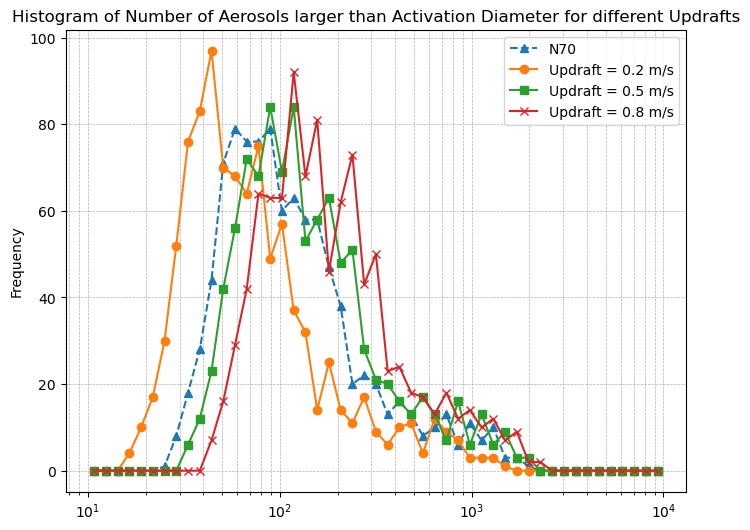

In [32]:
bins = np.logspace(minimum, maximum, 50)
hist_n70, bin_edges = np.histogram(NorESM_ds['TotN70'].isel(lev=-1).where(NorESM_ds['Droplets'].isel(lev=-1) > 0),bins=bins)
hist_Activated1, bin_edges = np.histogram(NorESM_ds['Lev1Up1NoCC'].where(NorESM_ds['Droplets'].isel(lev=-1) > 0),bins=bins)
hist_Activated2, bin_edges = np.histogram(NorESM_ds['Lev1Up2NoCC'].where(NorESM_ds['Droplets'].isel(lev=-1) > 0),bins=bins)
hist_Activated3, bin_edges = np.histogram(NorESM_ds['Lev1Up3NoCC'].where(NorESM_ds['Droplets'].isel(lev=-1) > 0),bins=bins)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, hist_n70, marker='^', linestyle='--', label='N70')
plt.plot(bin_centers, hist_Activated1, marker='o', linestyle='-', label='Updraft = 0.2 m/s')
plt.plot(bin_centers, hist_Activated2, marker='s', linestyle='-', label='Updraft = 0.5 m/s')
plt.plot(bin_centers, hist_Activated3, marker='x', linestyle='-', label='Updraft = 0.8 m/s')

plt.xscale('log')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Aerosols larger than Activation Diameter for different Updrafts')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

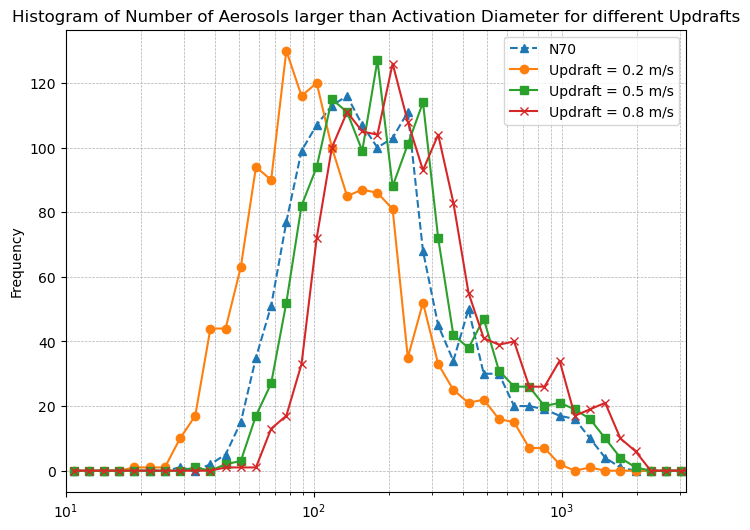

In [33]:
bins = np.logspace(minimum, maximum, 50)
hist_n70, bin_edges = np.histogram(NorESM_ds['TotN70'].isel(lev=-2).where(NorESM_ds['Droplets'].isel(lev=-2) > 0),bins=bins)
hist_Activated1, bin_edges = np.histogram(NorESM_ds['Lev2Up1NoCC'].where(NorESM_ds['Droplets'].isel(lev=-2) > 0),bins=bins)
hist_Activated2, bin_edges = np.histogram(NorESM_ds['Lev2Up2NoCC'].where(NorESM_ds['Droplets'].isel(lev=-2) > 0),bins=bins)
hist_Activated3, bin_edges = np.histogram(NorESM_ds['Lev2Up3NoCC'].where(NorESM_ds['Droplets'].isel(lev=-2) > 0),bins=bins)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, hist_n70, marker='^', linestyle='--', label='N70')
plt.plot(bin_centers, hist_Activated1, marker='o', linestyle='-', label='Updraft = 0.2 m/s')
plt.plot(bin_centers, hist_Activated2, marker='s', linestyle='-', label='Updraft = 0.5 m/s')
plt.plot(bin_centers, hist_Activated3, marker='x', linestyle='-', label='Updraft = 0.8 m/s')

plt.xscale('log')
plt.xlim([1E1,10**3.5])
plt.ylabel('Frequency')
plt.title('Histogram of Number of Aerosols larger than Activation Diameter for different Updrafts')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

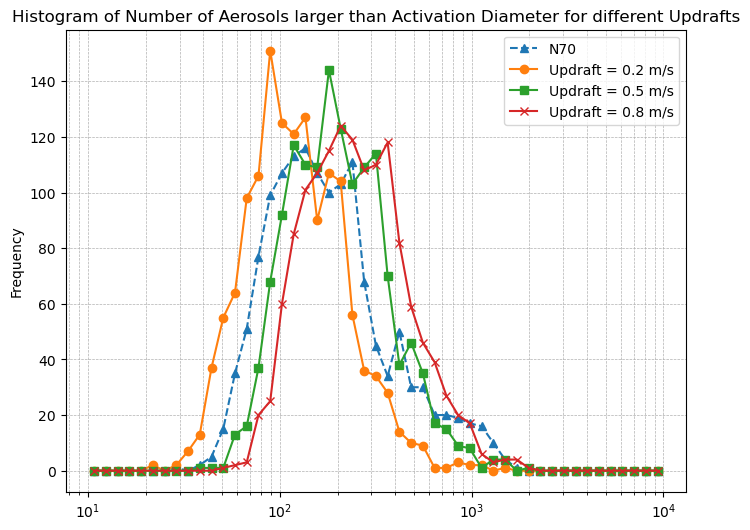

In [34]:
bins = np.logspace(minimum, maximum, 50)
hist_n70, bin_edges = np.histogram(NorESM_ds['TotN70'].isel(lev=-2).where(NorESM_ds['Droplets'].isel(lev=-2) > 0),bins=bins)
hist_Activated1, bin_edges = np.histogram(NorESM_ds['ActivatedNumberUpdraft1'].isel(lev=-2).where(NorESM_ds['Droplets'].isel(lev=-2) > 0),bins=bins)
hist_Activated2, bin_edges = np.histogram(NorESM_ds['ActivatedNumberUpdraft2'].isel(lev=-2).where(NorESM_ds['Droplets'].isel(lev=-2) > 0),bins=bins)
hist_Activated3, bin_edges = np.histogram(NorESM_ds['ActivatedNumberUpdraft3'].isel(lev=-2).where(NorESM_ds['Droplets'].isel(lev=-2) > 0),bins=bins)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, hist_n70, marker='^', linestyle='--', label='N70')
plt.plot(bin_centers, hist_Activated1, marker='o', linestyle='-', label='Updraft = 0.2 m/s')
plt.plot(bin_centers, hist_Activated2, marker='s', linestyle='-', label='Updraft = 0.5 m/s')
plt.plot(bin_centers, hist_Activated3, marker='x', linestyle='-', label='Updraft = 0.8 m/s')

plt.xscale('log')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Aerosols larger than Activation Diameter for different Updrafts')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

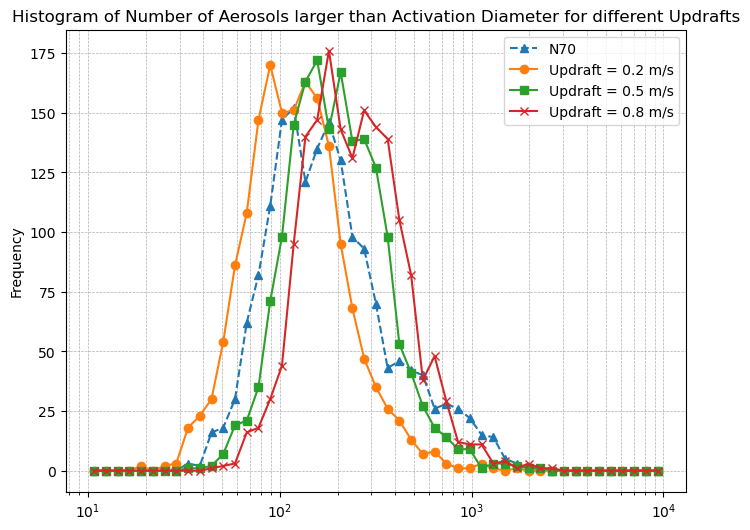

In [35]:
bins = np.logspace(minimum, maximum, 50)
hist_n70, bin_edges = np.histogram(NorESM_ds['TotN70'].isel(lev=-3).where(NorESM_ds['Droplets'].isel(lev=-3) > 0),bins=bins)
hist_Activated1, bin_edges = np.histogram(NorESM_ds['ActivatedNumberUpdraft1'].isel(lev=-3).where(NorESM_ds['Droplets'].isel(lev=-3) > 0),bins=bins)
hist_Activated2, bin_edges = np.histogram(NorESM_ds['ActivatedNumberUpdraft2'].isel(lev=-3).where(NorESM_ds['Droplets'].isel(lev=-3) > 0),bins=bins)
hist_Activated3, bin_edges = np.histogram(NorESM_ds['ActivatedNumberUpdraft3'].isel(lev=-3).where(NorESM_ds['Droplets'].isel(lev=-3) > 0),bins=bins)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, hist_n70, marker='^', linestyle='--', label='N70')
plt.plot(bin_centers, hist_Activated1, marker='o', linestyle='-', label='Updraft = 0.2 m/s')
plt.plot(bin_centers, hist_Activated2, marker='s', linestyle='-', label='Updraft = 0.5 m/s')
plt.plot(bin_centers, hist_Activated3, marker='x', linestyle='-', label='Updraft = 0.8 m/s')

plt.xscale('log')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Aerosols larger than Activation Diameter for different Updrafts')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

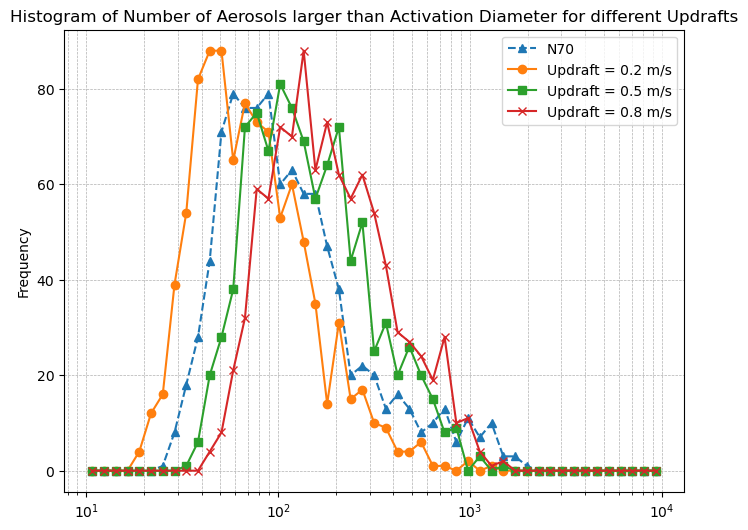

In [36]:
bins = np.logspace(minimum, maximum, 50)
hist_n70, bin_edges = np.histogram(NorESM_ds['TotN70'].isel(lev=-1).where(NorESM_ds['Droplets'].isel(lev=-1) > 0),bins=bins)
hist_Activated1, bin_edges = np.histogram(NorESM_ds['ActivatedNumberUpdraft1'].isel(lev=-1).where(NorESM_ds['Droplets'].isel(lev=-1) > 0),bins=bins)
hist_Activated2, bin_edges = np.histogram(NorESM_ds['ActivatedNumberUpdraft2'].isel(lev=-1).where(NorESM_ds['Droplets'].isel(lev=-1) > 0),bins=bins)
hist_Activated3, bin_edges = np.histogram(NorESM_ds['ActivatedNumberUpdraft3'].isel(lev=-1).where(NorESM_ds['Droplets'].isel(lev=-1) > 0),bins=bins)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, hist_n70, marker='^', linestyle='--', label='N70')
plt.plot(bin_centers, hist_Activated1, marker='o', linestyle='-', label='Updraft = 0.2 m/s')
plt.plot(bin_centers, hist_Activated2, marker='s', linestyle='-', label='Updraft = 0.5 m/s')
plt.plot(bin_centers, hist_Activated3, marker='x', linestyle='-', label='Updraft = 0.8 m/s')

plt.xscale('log')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Aerosols larger than Activation Diameter for different Updrafts')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

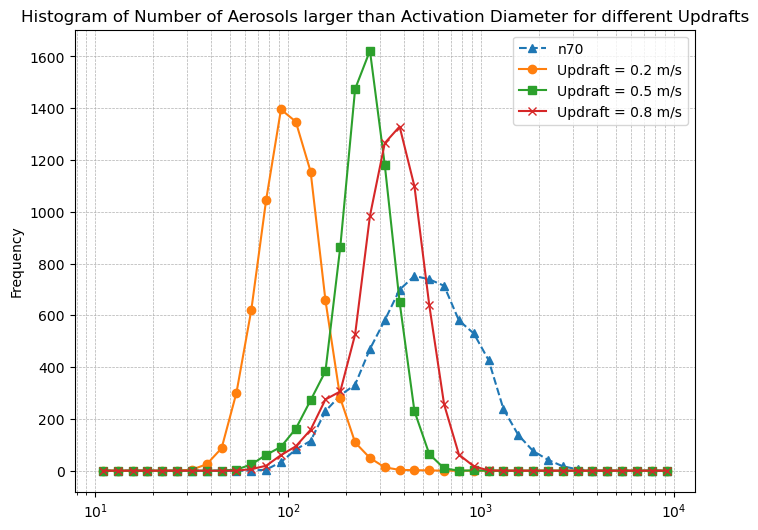

In [37]:
bins = np.logspace(minimum, maximum, 40)
hist_n70, bin_edges = np.histogram(ECearth_ds['TotN70'].isel(lev=0).where(ECearth_ds['Droplets'].isel(lev=0)> 0)/1E6,bins=bins)

hist_Activated1, bin_edges = np.histogram(ECearth_ds['ActivatedNumberUpdraft1'].isel(lev=0).where(ECearth_ds['Droplets'].isel(lev=0) > 0)/1E6,bins=bins)
hist_Activated2, bin_edges = np.histogram(ECearth_ds['ActivatedNumberUpdraft2'].isel(lev=0).where(ECearth_ds['Droplets'].isel(lev=0) > 0)/1E6,bins=bins)
hist_Activated3, bin_edges = np.histogram(ECearth_ds['ActivatedNumberUpdraft3'].isel(lev=0).where(ECearth_ds['Droplets'].isel(lev=0) > 0)/1E6,bins=bins)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, hist_n70, marker='^', linestyle='--', label='n70')
plt.plot(bin_centers, hist_Activated1, marker='o', linestyle='-', label='Updraft = 0.2 m/s')
plt.plot(bin_centers, hist_Activated2, marker='s', linestyle='-', label='Updraft = 0.5 m/s')
plt.plot(bin_centers, hist_Activated3, marker='x', linestyle='-', label='Updraft = 0.8 m/s')

plt.xscale('log')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Aerosols larger than Activation Diameter for different Updrafts')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

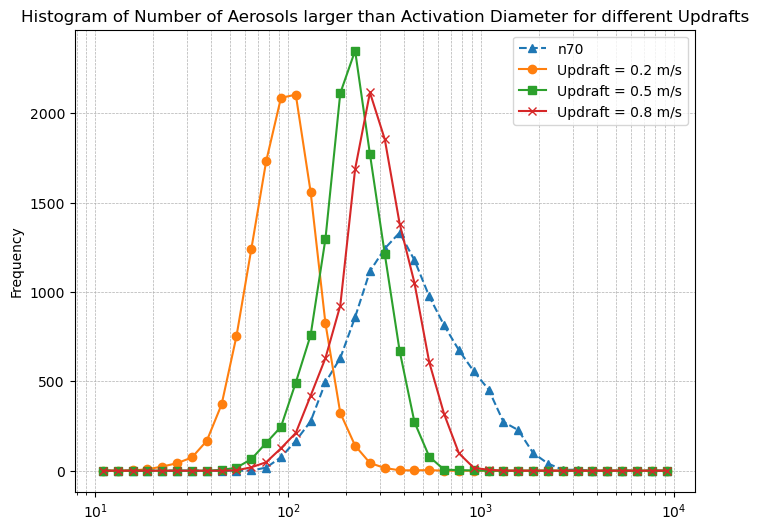

In [38]:
bins = np.logspace(minimum, maximum, 40)
hist_n70, bin_edges = np.histogram(ECearth_ds['TotN70'].isel(lev=1).where(ECearth_ds['Droplets'].isel(lev=1)> 0)/1E6,bins=bins)

hist_Activated1, bin_edges = np.histogram(ECearth_ds['ActivatedNumberUpdraft1'].isel(lev=1).where(ECearth_ds['Droplets'].isel(lev=1) > 0)/1E6,bins=bins)
hist_Activated2, bin_edges = np.histogram(ECearth_ds['ActivatedNumberUpdraft2'].isel(lev=1).where(ECearth_ds['Droplets'].isel(lev=1) > 0)/1E6,bins=bins)
hist_Activated3, bin_edges = np.histogram(ECearth_ds['ActivatedNumberUpdraft3'].isel(lev=1).where(ECearth_ds['Droplets'].isel(lev=1) > 0)/1E6,bins=bins)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, hist_n70, marker='^', linestyle='--', label='n70')
plt.plot(bin_centers, hist_Activated1, marker='o', linestyle='-', label='Updraft = 0.2 m/s')
plt.plot(bin_centers, hist_Activated2, marker='s', linestyle='-', label='Updraft = 0.5 m/s')
plt.plot(bin_centers, hist_Activated3, marker='x', linestyle='-', label='Updraft = 0.8 m/s')

plt.xscale('log')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Aerosols larger than Activation Diameter for different Updrafts')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

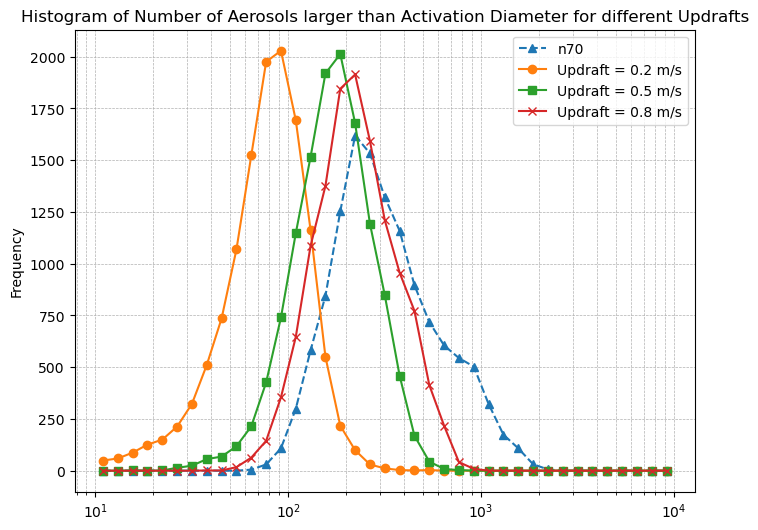

In [39]:
bins = np.logspace(minimum, maximum, 40)
hist_n70, bin_edges = np.histogram(ECearth_ds['TotN70'].isel(lev=2).where(ECearth_ds['Droplets'].isel(lev=2)> 0)/1E6,bins=bins)

hist_Activated1, bin_edges = np.histogram(ECearth_ds['ActivatedNumberUpdraft1'].isel(lev=2).where(ECearth_ds['Droplets'].isel(lev=2) > 0)/1E6,bins=bins)
hist_Activated2, bin_edges = np.histogram(ECearth_ds['ActivatedNumberUpdraft2'].isel(lev=2).where(ECearth_ds['Droplets'].isel(lev=2) > 0)/1E6,bins=bins)
hist_Activated3, bin_edges = np.histogram(ECearth_ds['ActivatedNumberUpdraft3'].isel(lev=2).where(ECearth_ds['Droplets'].isel(lev=2) > 0)/1E6,bins=bins)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, hist_n70, marker='^', linestyle='--', label='n70')
plt.plot(bin_centers, hist_Activated1, marker='o', linestyle='-', label='Updraft = 0.2 m/s')
plt.plot(bin_centers, hist_Activated2, marker='s', linestyle='-', label='Updraft = 0.5 m/s')
plt.plot(bin_centers, hist_Activated3, marker='x', linestyle='-', label='Updraft = 0.8 m/s')

plt.xscale('log')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Aerosols larger than Activation Diameter for different Updrafts')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

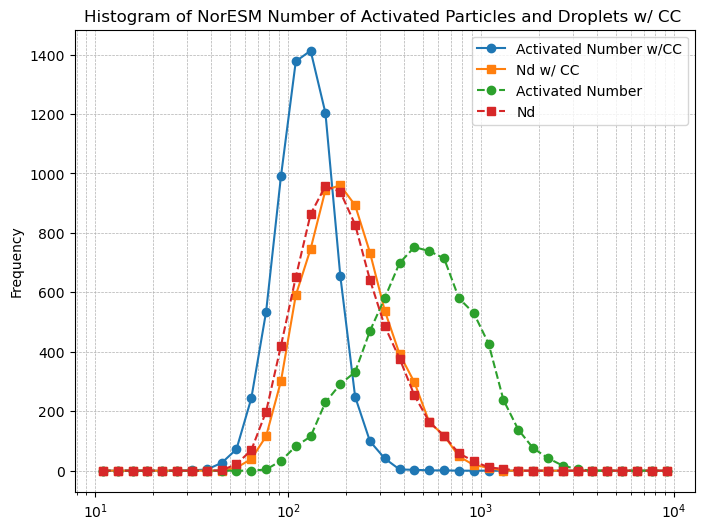

In [40]:
bins = np.logspace(minimum, maximum, 40)
hist_Act, bin_edges = np.histogram(ECearth_ds['ActivatedNumberUpdraft1CC'].isel(lev=0).where(ECearth_ds['DropletsCCUp1'].isel(lev=0) > 0)/1E6,bins=bins)
hist_DropletsCC, _ = np.histogram( ECearth_ds['DropletsCCUp1'].isel(lev=0), bins=bins)
hist_TotN70, bin_edges = np.histogram(ECearth_ds['TotN70'].isel(lev=0).where(ECearth_ds['Droplets'].isel(lev=0) > 0)/1E6,bins=bins)
hist_Droplets, _ = np.histogram( ECearth_ds['Droplets'].isel(lev=0), bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, hist_Act, marker='o', linestyle='-', label='Activated Number w/CC')
plt.plot(bin_centers, hist_DropletsCC, marker='s', linestyle='-', label='Nd w/ CC')
plt.plot(bin_centers, hist_TotN70, marker='o', linestyle='--', label='Activated Number')
plt.plot(bin_centers, hist_Droplets, marker='s', linestyle='--', label='Nd')
plt.xscale('log')
plt.ylabel('Frequency')
plt.title('Histogram of NorESM Number of Activated Particles and Droplets w/ CC ')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

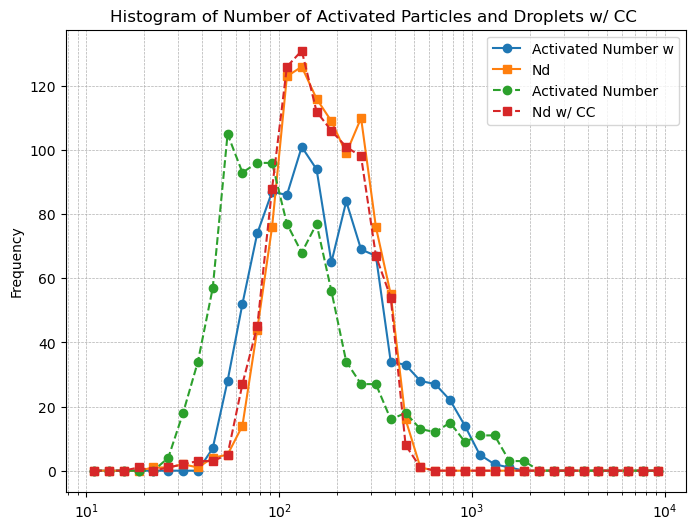

In [41]:
bins = np.logspace(minimum, maximum, 40)
hist_Act, bin_edges = np.histogram(NorESM_ds['ActivatedNumberUpdraft2CC'].isel(lev=-1).where(NorESM_ds['DropletsCCUp2'].isel(lev=-1) > 0),bins=bins)
hist_DropletsCC, _ = np.histogram( NorESM_ds['DropletsCCUp2'].isel(lev=-1), bins=bins)
hist_TotN70, bin_edges = np.histogram(NorESM_ds['TotN70'].isel(lev=-1).where(NorESM_ds['Droplets'].isel(lev=-1) > 0),bins=bins)
hist_Droplets, _ = np.histogram( NorESM_ds['Droplets'].isel(lev=-1), bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, hist_Act, marker='o', linestyle='-', label='Activated Number w')
plt.plot(bin_centers, hist_DropletsCC, marker='s', linestyle='-', label='Nd')
plt.plot(bin_centers, hist_TotN70, marker='o', linestyle='--', label='Activated Number')
plt.plot(bin_centers, hist_Droplets, marker='s', linestyle='--', label='Nd w/ CC')
plt.xscale('log')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Activated Particles and Droplets w/ CC ')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

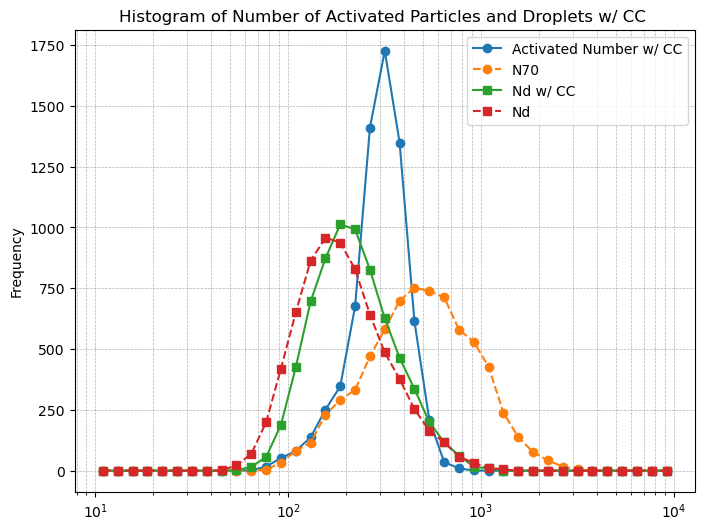

In [42]:
bins = np.logspace(minimum, maximum, 40)
hist_Act, bin_edges = np.histogram(ECearth_ds['ActivatedNumberUpdraft2CC'].isel(lev=0).where(ECearth_ds['DropletsCCUp2'].isel(lev=0) > 0)/1E6,bins=bins)
hist_DropletsCC, _ = np.histogram( ECearth_ds['DropletsCCUp2'].isel(lev=0), bins=bins)
hist_TotN70, bin_edges = np.histogram(ECearth_ds['TotN70'].isel(lev=0).where(ECearth_ds['Droplets'].isel(lev=0) > 0)/1E6,bins=bins)
hist_Droplets, _ = np.histogram( ECearth_ds['Droplets'].isel(lev=0), bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, hist_Act, marker='o', linestyle='-', label='Activated Number w/ CC')
plt.plot(bin_centers, hist_TotN70, marker='o', linestyle='--', label='N70')
plt.plot(bin_centers, hist_DropletsCC, marker='s', linestyle='-', label='Nd w/ CC')
plt.plot(bin_centers, hist_Droplets, marker='s', linestyle='--', label='Nd')
plt.xscale('log')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Activated Particles and Droplets w/ CC ')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

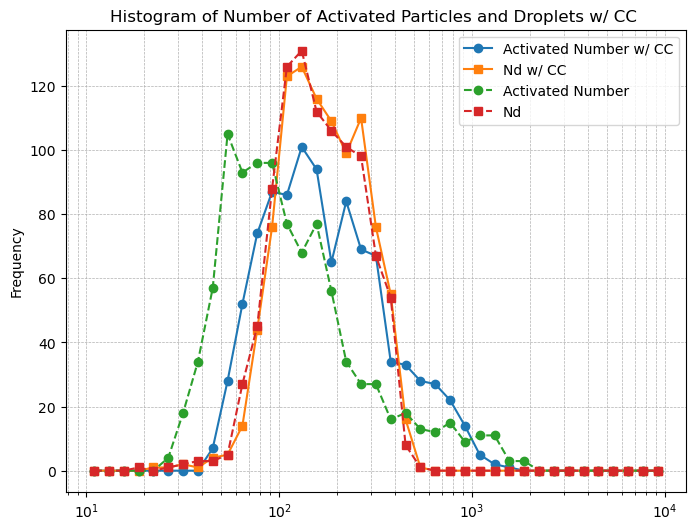

In [43]:
bins = np.logspace(minimum, maximum, 40)
hist_Act, bin_edges = np.histogram(NorESM_ds['ActivatedNumberUpdraft2CC'].isel(lev=-1).where(NorESM_ds['DropletsCCUp2'].isel(lev=-1) > 0),bins=bins)
hist_DropletsCC, _ = np.histogram( NorESM_ds['DropletsCCUp2'].isel(lev=-1), bins=bins)
hist_TotN70, bin_edges = np.histogram(NorESM_ds['TotN70'].isel(lev=-1).where(NorESM_ds['Droplets'].isel(lev=-1) > 0),bins=bins)
hist_Droplets, _ = np.histogram( NorESM_ds['Droplets'].isel(lev=-1), bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, hist_Act, marker='o', linestyle='-', label='Activated Number w/ CC')
plt.plot(bin_centers, hist_DropletsCC, marker='s', linestyle='-', label='Nd w/ CC')
plt.plot(bin_centers, hist_TotN70, marker='o', linestyle='--', label='Activated Number')
plt.plot(bin_centers, hist_Droplets, marker='s', linestyle='--', label='Nd')
plt.xscale('log')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Activated Particles and Droplets w/ CC ')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

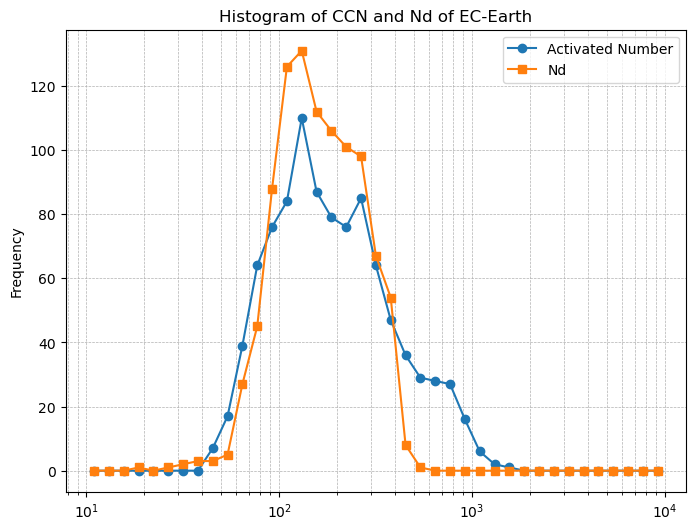

In [44]:
bins = np.logspace(minimum, maximum, 40)
hist_TotN70, bin_edges = np.histogram(NorESM_ds['ActivatedNumberUpdraft3'].isel(lev=-1).where(NorESM_ds['Droplets'].isel(lev=-1) > 0),bins=bins)
hist_Droplets, _ = np.histogram( NorESM_ds['Droplets'].isel(lev=-1), bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, hist_TotN70, marker='o', linestyle='-', label='Activated Number')
plt.plot(bin_centers, hist_Droplets, marker='s', linestyle='-', label='Nd')
plt.xscale('log')
plt.ylabel('Frequency')
plt.title('Histogram of CCN and Nd of EC-Earth')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In [45]:
def TripleGraph(Cluster, level, GroupedData, CC = False, NorESM = True):

    fig, ax = plt.subplots(1, 3, figsize=(12, 4)) 
    for n in range (1,4):
        i = Cluster-1
        if NorESM == True:
            
            if CC == False:
                x = GroupedData[i][f'ActivatedNumberUpdraft{n}'].isel(lev = level).where(GroupedData[i]['Droplets'].isel(lev = level)>0).dropna('time')
                y = GroupedData[i]['Droplets'].isel(lev = level).dropna('time')
            else:
                x = GroupedData[i][f'ActivatedNumberUpdraft{n}CC'].isel(lev = level).where(GroupedData[i][f'DropletsCCUp{n}'].isel(lev = level)>0).dropna('time')
                y = GroupedData[i][f'DropletsCCUp{n}'].isel(lev = level).dropna('time')
        else:
            if CC == False:
                x = GroupedData[i][f'ActivatedNumberUpdraft{n}'].isel(lev = level).where(GroupedData[i]['Droplets'].isel(lev = level)>0).dropna('time')*1E-6
                y = GroupedData[i]['Droplets'].isel(lev = level).dropna('time')
            else:
                x = GroupedData[i][f'ActivatedNumberUpdraft{n}CC'].isel(lev = level).where(GroupedData[i][f'DropletsCCUp{n}'].isel(lev = level)>0).dropna('time')*1E-6
                y = GroupedData[i][f'DropletsCCUp{n}'].isel(lev = level).dropna('time')
        x = x.to_numpy()
        y = y.to_numpy()
        Y = np.log10(y)
        X = np.log10(x)
        X = sm.add_constant(X)
        model = sm.OLS(Y,X).fit()
        Sensitivity = SusceptibilityGraph(model)
        res = stats.linregress(np.log10(x),np.log10(y))
        lims = [1,10000]
        ax[n-1].hexbin(x,y,gridsize=50, bins= 'log', xscale='log', yscale='log',edgecolors = 'face', cmap ='inferno',extent = [0,4,0,4], mincnt = 1)
        plt.xlim(lims)
        plt.ylim(lims)
        ax[n-1].plot([1,10000],[10**res.intercept*1**res.slope,10**res.intercept*10000**res.slope])
        ax[n-1].plot(lims,lims)
        if CC == False:
            if NorESM == True:
                ax[n-1].set_title(f'NorESM Cluster {Cluster}, Updraft {n}, No CC')
            else:
                ax[n-1].set_title(f'EC-Earth Cluster {Cluster}, Updraft {n}, No CC')
        else:
            if NorESM == True:
                ax[n-1].set_title(f'NorESM Cluster {Cluster}, Updraft {n}, With CC')
            else:
                ax[n-1].set_title(f'EC-Earth Cluster {Cluster}, Updraft {n}, With CC')          
        if NorESM == True:
            ax[n-1].text(lims[1],lims[0], f'Level {abs(level)}',ha="right", va="bottom")
        else:
            ax[n-1].text(lims[1],lims[0],  f'Level {level+1}',ha="right", va="bottom")
        if NorESM == True and CC == False:
            ax[n-1].text(2,5000, f'Activation Diameter = {NorActR_df.iloc[n-1].values[i]:.2f} nm')
        if NorESM == True and CC == True:
            ax[n-1].text(2,5000, f'Activation Diameter = {NorActR_CC_df.iloc[n-1].values[i]:.2f} nm')
        if NorESM == False and CC == False:
            ax[n-1].text(2,5000, f'Activation Diameter = {ECActR_df.iloc[n-1].values[i]:.2f} nm')
        if NorESM == False and CC == True:   
            ax[n-1].text(2,5000, f'Activation Diameter = {ECActR_CC_df.iloc[n-1].values[i]:.2f} nm')
            
        ax[n-1].text(2,2500,f'Susceptibility = {Sensitivity[0]:.3f} +/- {Sensitivity[1]:.3f}')     
    plt.tight_layout()

In [47]:
for i in range(0,4):
    print(len(NorGroup[i]['Droplets'].isel(lev = -1).dropna('time'))/len(NorGroup[i]['T'].isel(lev = -1).dropna('time')))
print('BREAK')
for i in range(0,6):
    print(len(ECGroup[i]['Droplets'].isel(lev = 0).dropna('time'))/len(ECGroup[i]['T'].isel(lev = 0).dropna('time')))

0.006823351023502654
0.02129436325678497
0.0
0.19242836226730808
BREAK
0.08810353409656546
0.1327037773359841
0.09439853076216713
0.14633240482822654
0.12300531914893617
0.11750205423171733


In [48]:
row_names = ['Level 1', 'Level 2', 'Level 3']
Norweighted_dfnoCC = pd.DataFrame({
    'Updraft = 0.2, No CC': ListVarNor[0],
    'Updraft = 0.5, No CC': ListVarNor[1],
    'Updraft = 0.8, No CC': ListVarNor[2],
}, index=row_names)
Norweighted_dfnoCC

Updraft = 0.2, No CC  Updraft = 0.5, No CC  Updraft = 0.8, No CC
Level 1             86.138247             62.458083             52.740381
Level 2             88.015761             63.769344             53.899278
Level 3             89.369930             64.734582             54.741988

In [49]:
row_names = ['Level 1', 'Level 2', 'Level 3']
Norweighted_dfCC = pd.DataFrame({
    'Updraft = 0.2, With CC': ListVarNor[3],
    'Updraft = 0.5, With CC': ListVarNor[4],
    'Updraft = 0.8, With CC': ListVarNor[5],
    }, index=row_names)
Norweighted_dfCC

Updraft = 0.2, With CC  Updraft = 0.5, With CC  \
Level 1               77.808940               56.180980   
Level 2               79.718001               57.381058   
Level 3               81.107431               58.279212   

         Updraft = 0.8, With CC  
Level 1               48.188615  
Level 2               49.108433  
Level 3               49.803969

In [50]:
row_names = ['Level 1', 'Level 2', 'Level 3']
ECweighted_dfnoCC = pd.DataFrame({
    'Updraft = 0.2, No CC': ListVarEC[0],
    'Updraft = 0.5, No CC': ListVarEC[1],
    'Updraft = 0.8, No CC': ListVarEC[2],
}, index=row_names)
ECweighted_dfnoCC = ECweighted_dfnoCC.style.format("{:.2f}")
ECweighted_dfnoCC

In [51]:
row_names = ['Level 1', 'Level 2', 'Level 3']
ECweighted_dfCC = pd.DataFrame({
    'D* (nm), Updraft = 0.2 m/s': ListVarEC[3],
    'D* (nm), Updraft = 0.5 m/s': ListVarEC[4],
    'D* (nm), Updraft = 0.8 m/s': ListVarEC[5],
}, index=row_names)
ECweighted_dfCC = ECweighted_dfCC.style.format("{:.2f}")
ECweighted_dfCC

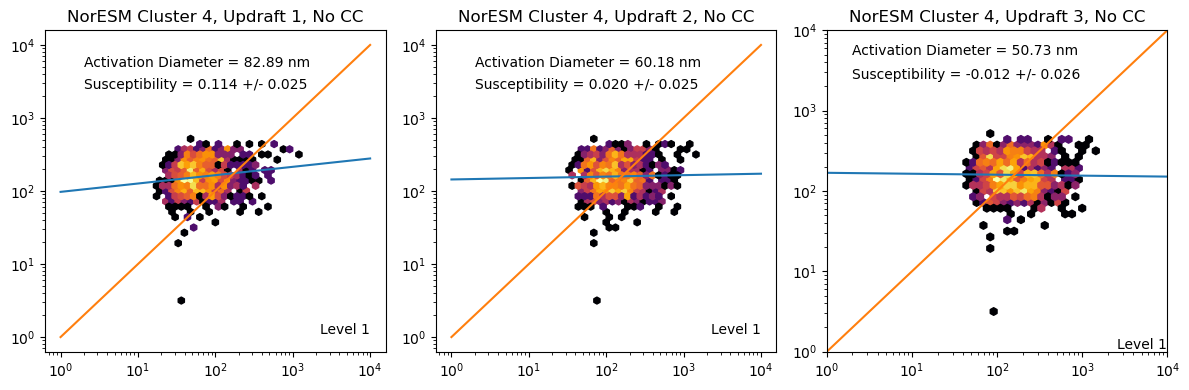

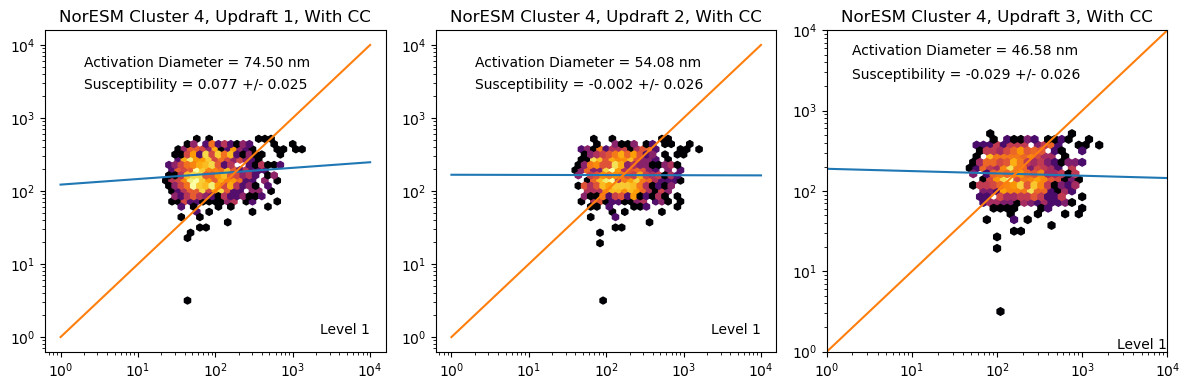

In [52]:
TripleGraph(Cluster = 4, level = -1, GroupedData = NorGroup, CC = False, NorESM = True)
TripleGraph(Cluster = 4, level = -1, GroupedData = NorGroup, CC = True, NorESM = True)


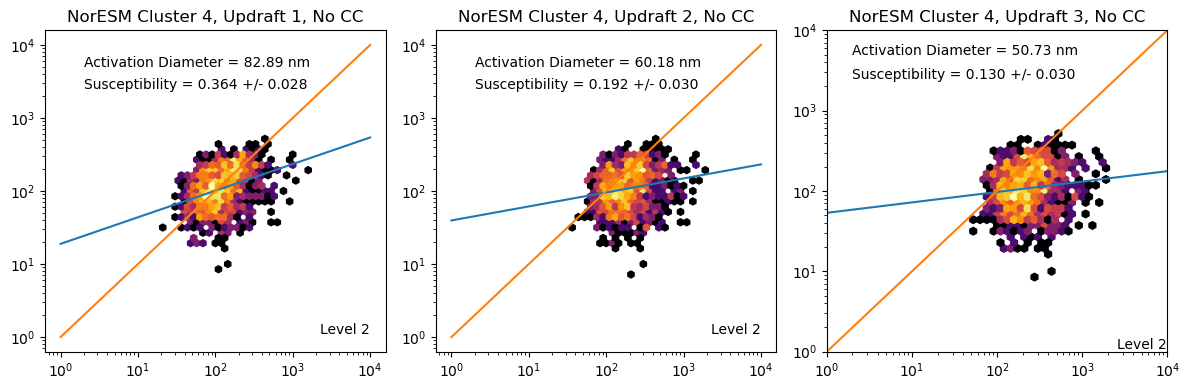

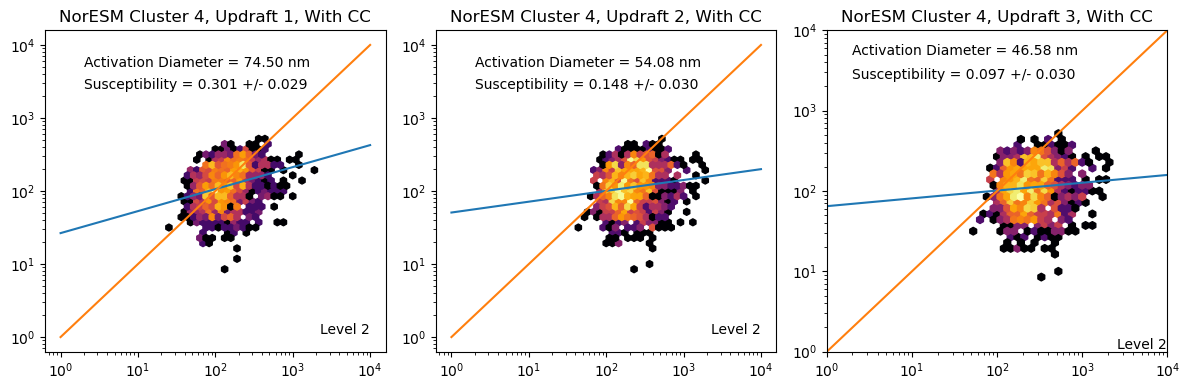

In [53]:
TripleGraph(Cluster = 4, level = -2, GroupedData = NorGroup, CC = False, NorESM = True)
TripleGraph(Cluster = 4, level = -2, GroupedData = NorGroup, CC = True, NorESM = True)


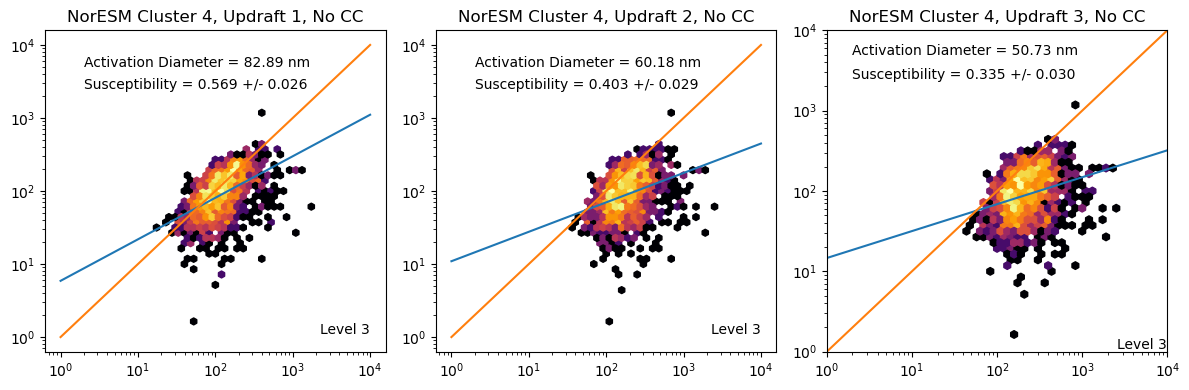

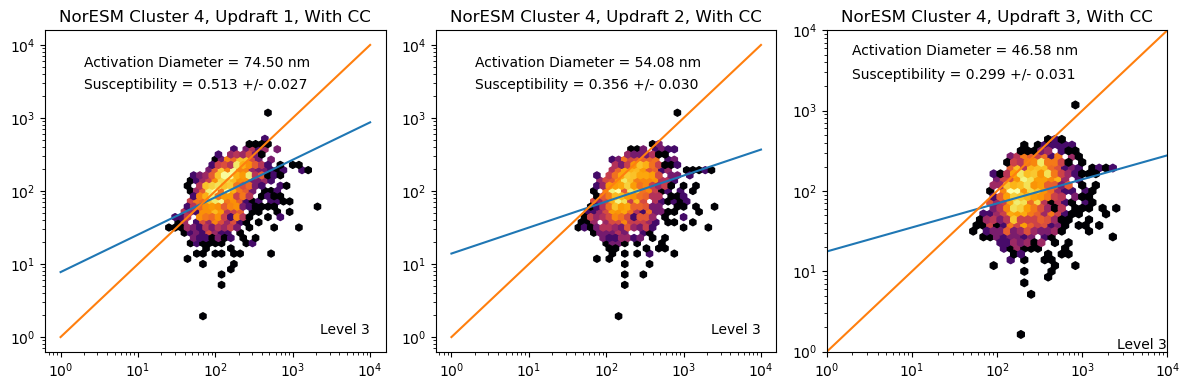

In [54]:
TripleGraph(Cluster = 4, level = -3, GroupedData = NorGroup, CC = False, NorESM = True)
TripleGraph(Cluster = 4, level = -3, GroupedData = NorGroup, CC = True, NorESM = True)


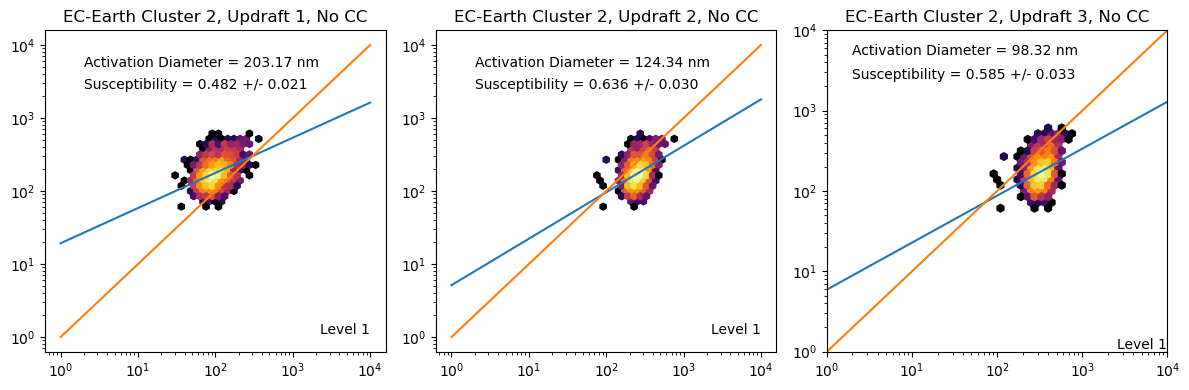

In [55]:
TripleGraph(Cluster = 2, level = 0, GroupedData = ECGroup, CC = False, NorESM = False)


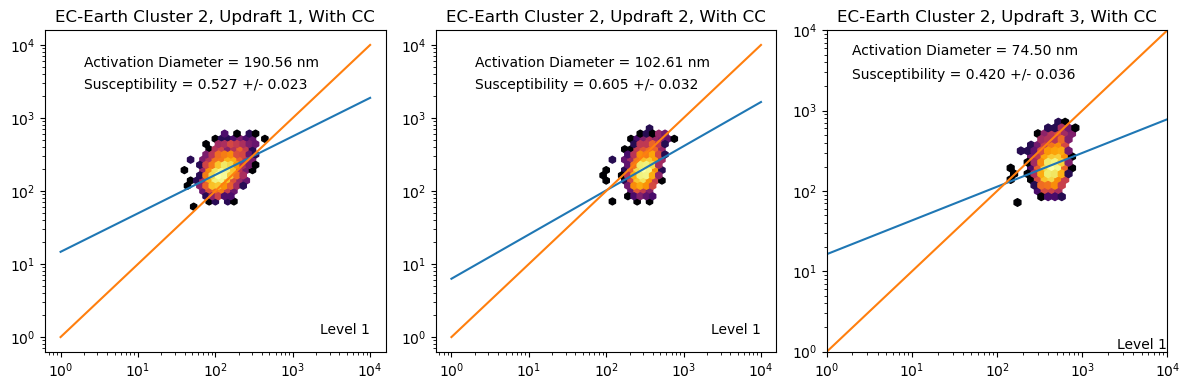

In [56]:
TripleGraph(Cluster = 2, level = 0, GroupedData = ECGroup, CC = True, NorESM = False)

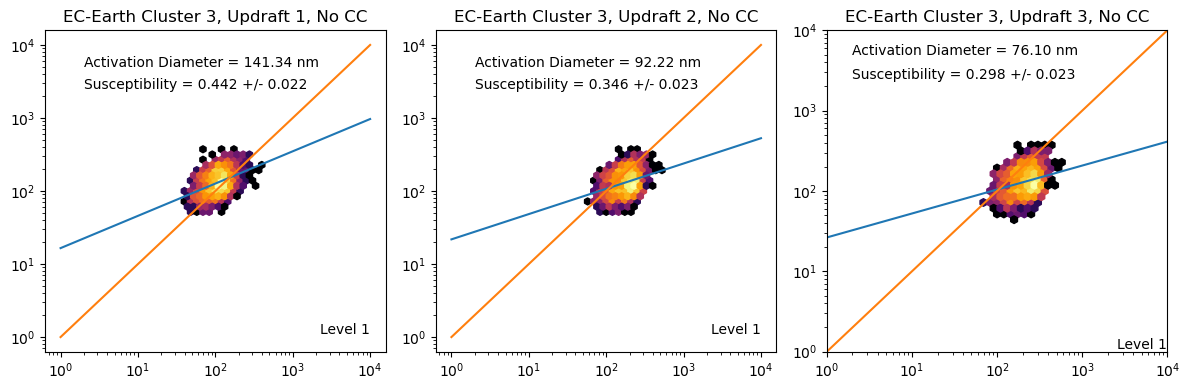

In [57]:
TripleGraph(Cluster = 3, level = 0, GroupedData = ECGroup, CC = False, NorESM = False)

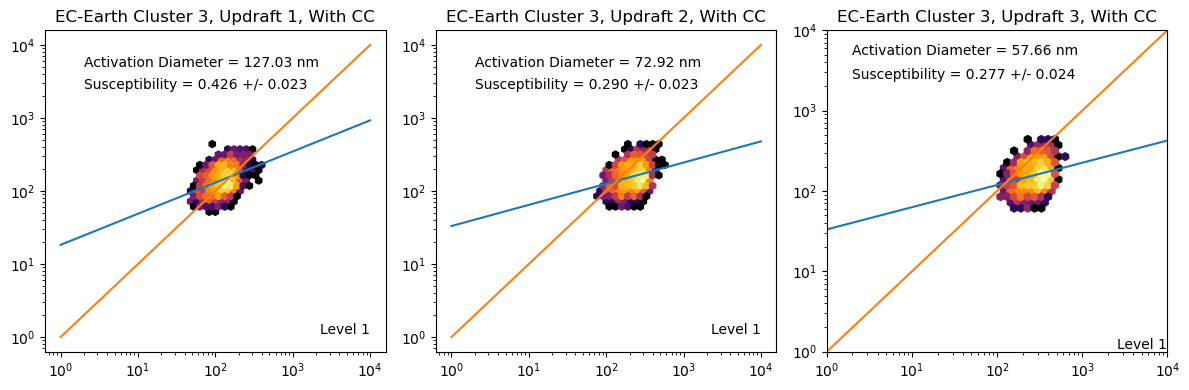

In [58]:
TripleGraph(Cluster = 3, level = 0, GroupedData = ECGroup, CC = True, NorESM = False)

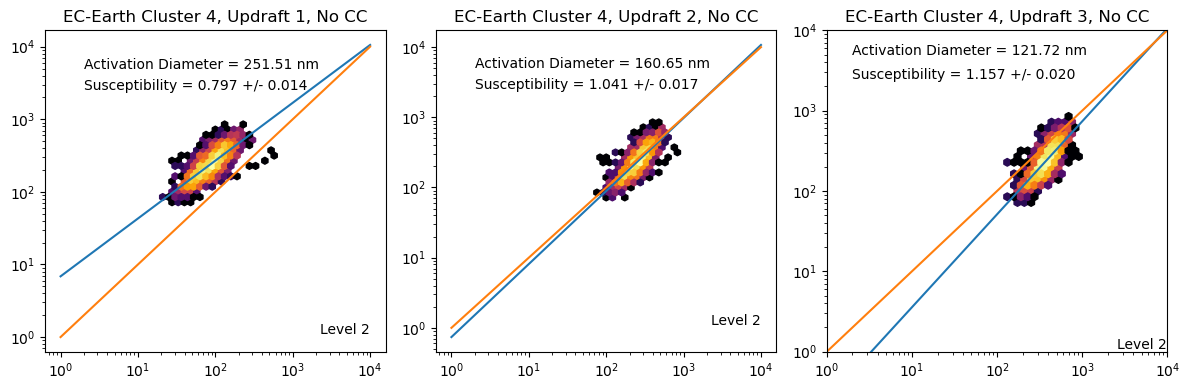

In [59]:
TripleGraph(Cluster = 4, level = 1, GroupedData = ECGroup, CC = False, NorESM = False)

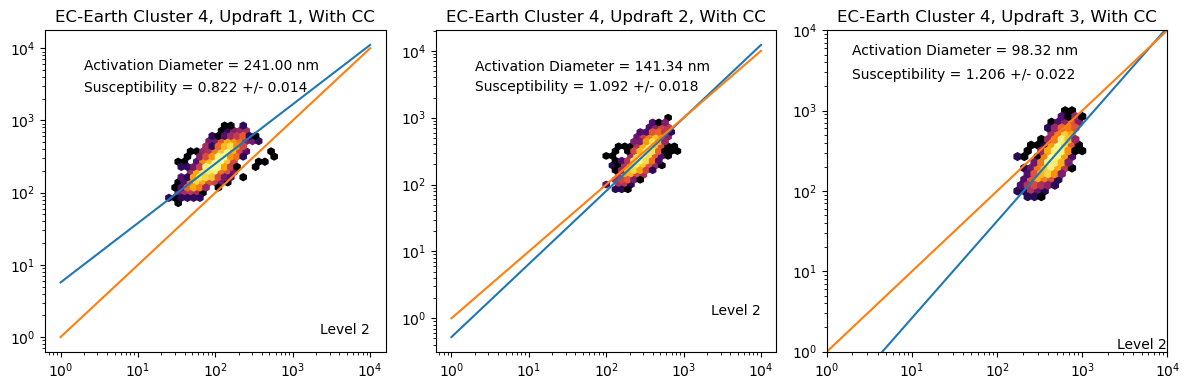

In [60]:
TripleGraph(Cluster = 4, level = 1, GroupedData = ECGroup, CC = True, NorESM = False)

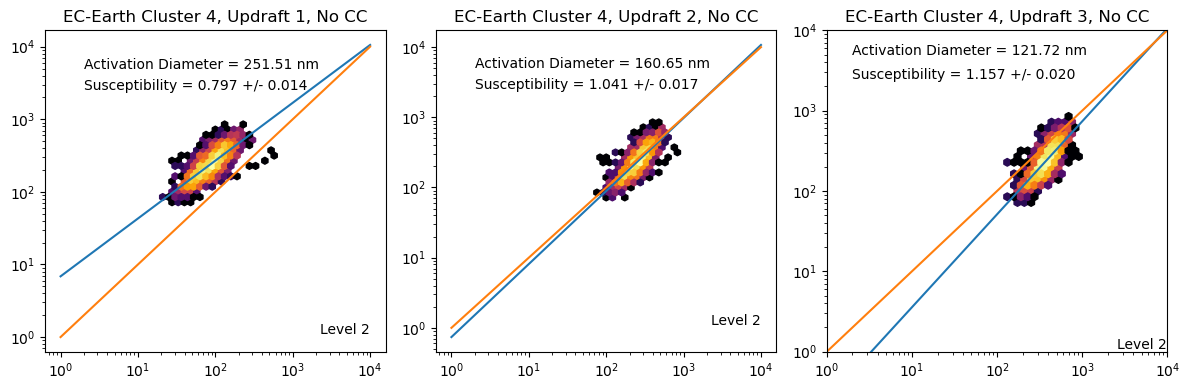

In [61]:
TripleGraph(Cluster = 4, level = 1, GroupedData = ECGroup, CC = False, NorESM = False)

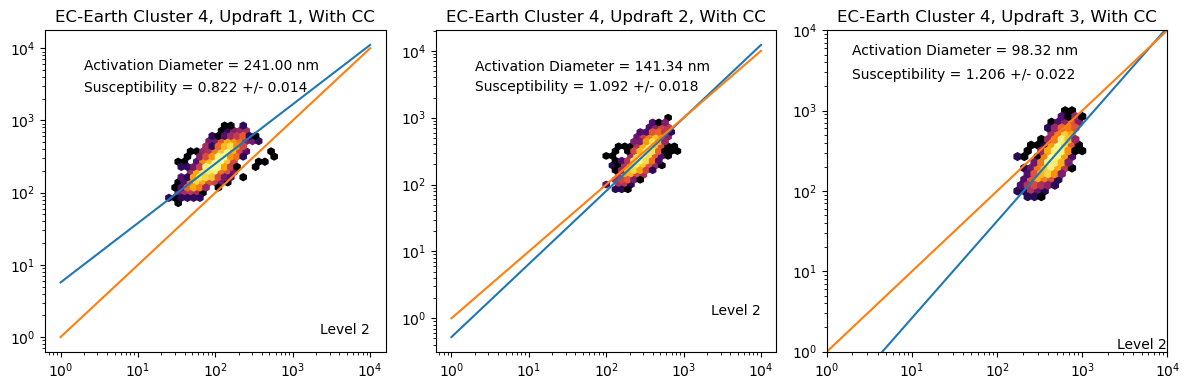

In [62]:
TripleGraph(Cluster = 4, level = 1, GroupedData = ECGroup, CC = True, NorESM = False)

In [63]:
ECCDNC_ds['Percentage_Increase'].values

array([        nan,  7.        ,  9.66183575,  5.83756345, 12.5       ,
       11.61616162, 24.87205732, 15.61181435, 21.45214521, 13.4375    ,
       10.05025126, 38.03278689, 33.66418528, 20.03546099, 20.50561798,
       15.53884712, 14.1       , 35.78947368])

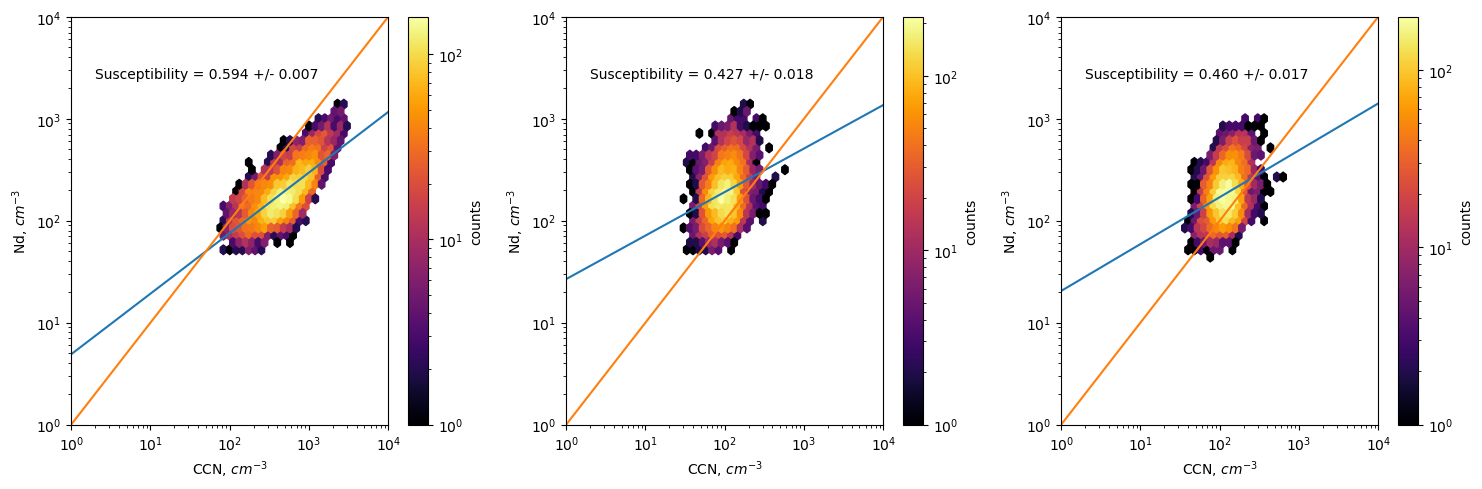

In [64]:
plt.figure(figsize = (15,5))
x = ECearth_ds['TotN70'].isel(lev = 0).where(ECearth_ds['Droplets'].isel(lev =0)>0).dropna('time')/10**6
y = ECearth_ds['Droplets'].isel(lev = 0).where(ECearth_ds['Droplets'].isel(lev =0)>0).dropna('time')
plt.subplot(1,3,1)
SBaseLev1 = Susceptibility(x,y)
plt.text(2,2500,f'Susceptibility = {SBaseLev1[0]:.3f} +/- {SBaseLev1[1]:.3f}')     
NdtoCCNGraph(x,y)
x =ECearth_ds['ActivatedNumberUpdraft1'].isel(lev = 0).where(ECearth_ds['Droplets'].isel(lev =0)>0).dropna('time')/10**6
y = ECearth_ds['Droplets'].isel(lev = 0).where((ECearth_ds['Droplets'].isel(lev =0)>0) & (ECearth_ds['ActivatedNumberUpdraft1'].isel(lev = 0)>0)).dropna('time')
plt.subplot(1,3,2)
ActivatedSensitivity = Susceptibility(x,y)
plt.text(2,2500,f'Susceptibility = {ActivatedSensitivity[0]:.3f} +/- {ActivatedSensitivity[1]:.3f}')    
NdtoCCNGraph(x,y)
x = ECearth_ds['ActivatedNumberUpdraft1CC'].isel(lev = 0).where(ECearth_ds['Droplets'].isel(lev =0)>0).dropna('time')/10**6
y = ECearth_ds['Droplets'].isel(lev = 0).where((ECearth_ds['Droplets'].isel(lev =0)>0) & (ECearth_ds['ActivatedNumberUpdraft1CC'].isel(lev = 0)>0)).dropna('time')
plt.subplot(1,3,3)
ActivatedSensitivityCC = Susceptibility(x,y)
plt.text(2,2500,f'Susceptibility = {ActivatedSensitivityCC[0]:.3f} +/- {ActivatedSensitivityCC[1]:.3f}')    

NdtoCCNGraph(x,y)
plt.tight_layout()

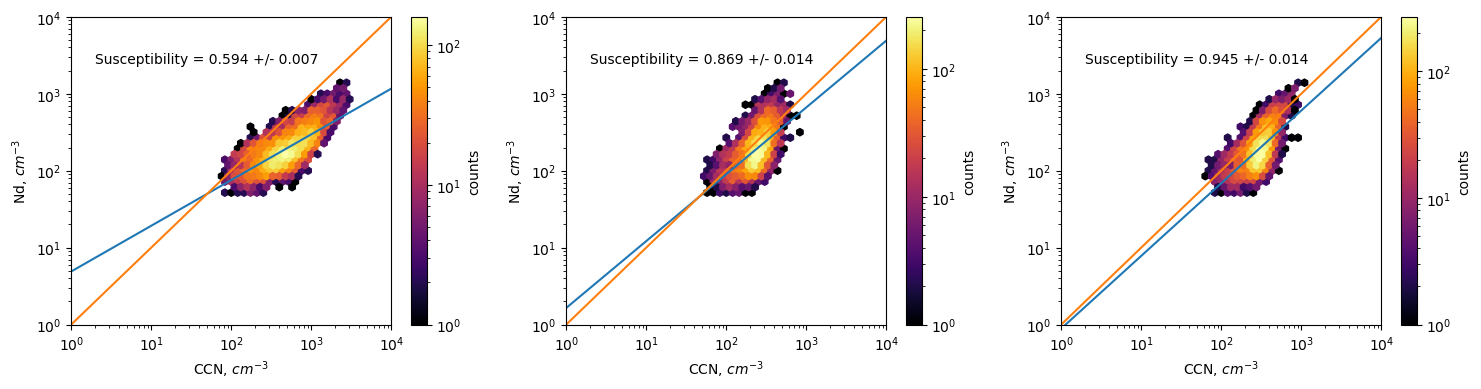

In [65]:
plt.figure(figsize = (15,4))
x = ECearth_ds['TotN70'].isel(lev = 0).where(ECearth_ds['Droplets'].isel(lev =0)>0).dropna('time')/10**6
y = ECearth_ds['Droplets'].isel(lev = 0).where(ECearth_ds['Droplets'].isel(lev =0)>0).dropna('time')
plt.subplot(1,3,1)
SBaseLev1 = Susceptibility(x,y)
plt.text(2,2500,f'Susceptibility = {SBaseLev1[0]:.3f} +/- {SBaseLev1[1]:.3f}')     
NdtoCCNGraph(x,y)
x =ECearth_ds['ActivatedNumberUpdraft2'].isel(lev = 0).where(ECearth_ds['Droplets'].isel(lev =0)>0).dropna('time')/10**6
y = ECearth_ds['Droplets'].isel(lev = 0).where((ECearth_ds['Droplets'].isel(lev =0)>0) & (ECearth_ds['ActivatedNumberUpdraft2'].isel(lev = 0)>0)).dropna('time')
plt.subplot(1,3,2)
ActivatedSensitivity = Susceptibility(x,y)
plt.text(2,2500,f'Susceptibility = {ActivatedSensitivity[0]:.3f} +/- {ActivatedSensitivity[1]:.3f}')    
NdtoCCNGraph(x,y)
x = ECearth_ds['ActivatedNumberUpdraft2CC'].isel(lev = 0).where(ECearth_ds['Droplets'].isel(lev =0)>0).dropna('time')/10**6
y = ECearth_ds['Droplets'].isel(lev = 0).where((ECearth_ds['Droplets'].isel(lev =0)>0) & (ECearth_ds['ActivatedNumberUpdraft2CC'].isel(lev = 0)>0)).dropna('time')
plt.subplot(1,3,3)
ActivatedSensitivityCC = Susceptibility(x,y)
plt.text(2,2500,f'Susceptibility = {ActivatedSensitivityCC[0]:.3f} +/- {ActivatedSensitivityCC[1]:.3f}')    

NdtoCCNGraph(x,y)
plt.tight_layout()

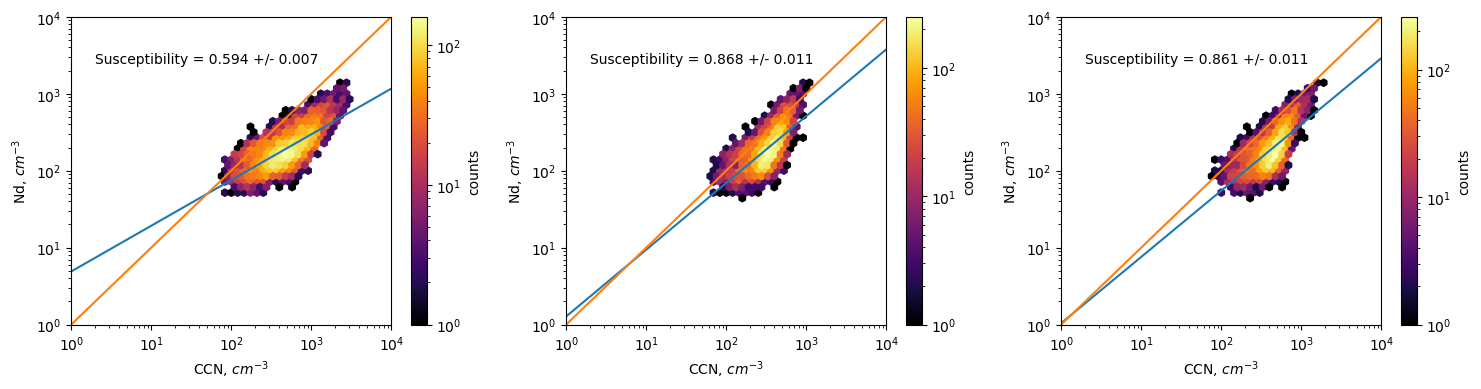

In [66]:
plt.figure(figsize = (15,4))
x = ECearth_ds['TotN70'].isel(lev = 0).where(ECearth_ds['Droplets'].isel(lev =0)>0).dropna('time')/10**6
y = ECearth_ds['Droplets'].isel(lev = 0).where(ECearth_ds['Droplets'].isel(lev =0)>0).dropna('time')
plt.subplot(1,3,1)
SBaseLev1 = Susceptibility(x,y)
plt.text(2,2500,f'Susceptibility = {SBaseLev1[0]:.3f} +/- {SBaseLev1[1]:.3f}')     
NdtoCCNGraph(x,y)
x =ECearth_ds['ActivatedNumberUpdraft3'].isel(lev = 0).where(ECearth_ds['Droplets'].isel(lev =0)>0).dropna('time')/10**6
y = ECearth_ds['Droplets'].isel(lev = 0).where((ECearth_ds['Droplets'].isel(lev =0)>0) & (ECearth_ds['ActivatedNumberUpdraft3'].isel(lev = 0)>0)).dropna('time')
plt.subplot(1,3,2)
ActivatedSensitivity = Susceptibility(x,y)
plt.text(2,2500,f'Susceptibility = {ActivatedSensitivity[0]:.3f} +/- {ActivatedSensitivity[1]:.3f}')    
NdtoCCNGraph(x,y)
x = ECearth_ds['ActivatedNumberUpdraft3CC'].isel(lev = 0).where(ECearth_ds['Droplets'].isel(lev =0)>0).dropna('time')/10**6
y = ECearth_ds['Droplets'].isel(lev = 0).where((ECearth_ds['Droplets'].isel(lev =0)>0) & (ECearth_ds['ActivatedNumberUpdraft3CC'].isel(lev = 0)>0)).dropna('time')
plt.subplot(1,3,3)
ActivatedSensitivityCC = Susceptibility(x,y)
plt.text(2,2500,f'Susceptibility = {ActivatedSensitivityCC[0]:.3f} +/- {ActivatedSensitivityCC[1]:.3f}')    

NdtoCCNGraph(x,y)
plt.tight_layout()

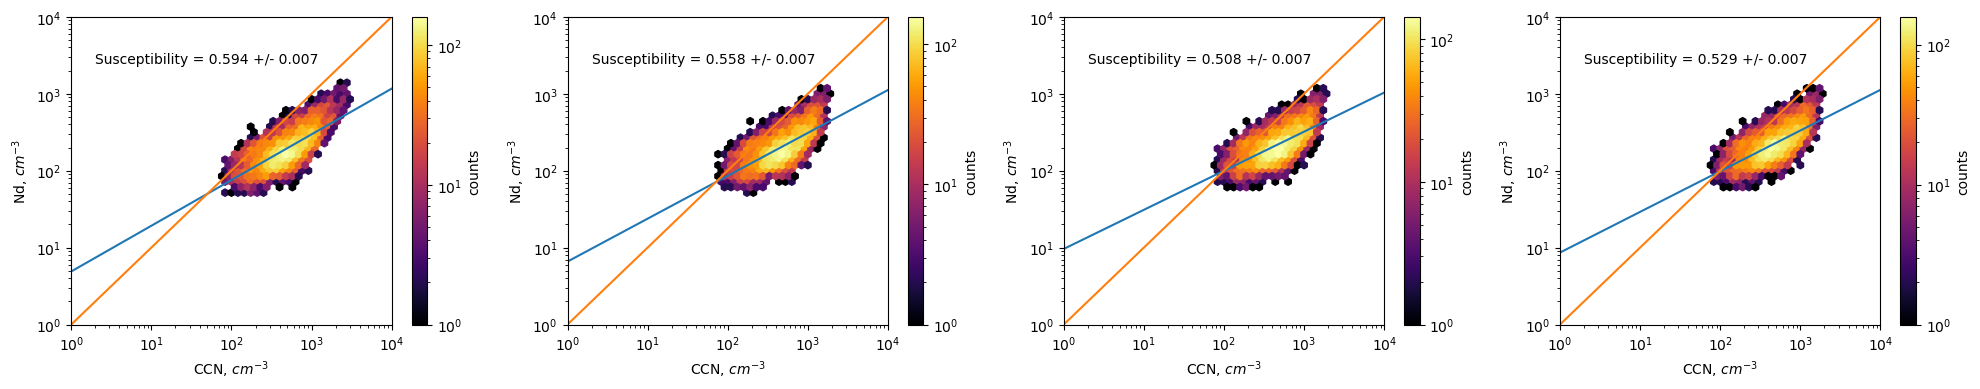

In [67]:
plt.figure(figsize = (20,4))
x = ECearth_ds['TotN70'].isel(lev = 0).where(ECearth_ds['Droplets'].isel(lev =0)>0).dropna('time')/10**6
y = ECearth_ds['Droplets'].isel(lev = 0).where(ECearth_ds['Droplets'].isel(lev =0)>0).dropna('time')
plt.subplot(1,4,1)
SBaseLev1 = Susceptibility(x,y)
plt.text(2,2500,f'Susceptibility = {SBaseLev1[0]:.3f} +/- {SBaseLev1[1]:.3f}')     
NdtoCCNGraph(x,y)
x =ECearth_ds['TotN70'].isel(lev = 0).where(ECearth_ds['DropletsCCUp1'].isel(lev =0)>0).dropna('time')/10**6
y = ECearth_ds['DropletsCCUp1'].isel(lev = 0).where((ECearth_ds['DropletsCCUp1'].isel(lev =0)>0) & (ECearth_ds['TotN70'].isel(lev = 0)>0)).dropna('time')
plt.subplot(1,4,2)
ActivatedSensitivity = Susceptibility(x,y)
plt.text(2,2500,f'Susceptibility = {ActivatedSensitivity[0]:.3f} +/- {ActivatedSensitivity[1]:.3f}')    
NdtoCCNGraph(x,y)
x = ECearth_ds['TotN70'].isel(lev = 0).where(ECearth_ds['DropletsCCUp2'].isel(lev =0)>0).dropna('time')/10**6
y = ECearth_ds['DropletsCCUp2'].isel(lev = 0).where((ECearth_ds['DropletsCCUp2'].isel(lev =0)>0) & (ECearth_ds['TotN70'].isel(lev = 0)>0)).dropna('time')
plt.subplot(1,4,3)
ActivatedSensitivityCC = Susceptibility(x,y)
plt.text(2,2500,f'Susceptibility = {ActivatedSensitivityCC[0]:.3f} +/- {ActivatedSensitivityCC[1]:.3f}')    
NdtoCCNGraph(x,y)

x = ECearth_ds['TotN70'].isel(lev = 0).where(ECearth_ds['DropletsCCUp3'].isel(lev =0)>0).dropna('time')/10**6
y = ECearth_ds['DropletsCCUp3'].isel(lev = 0).where((ECearth_ds['DropletsCCUp3'].isel(lev =0)>0) & (ECearth_ds['TotN70'].isel(lev = 0)>0)).dropna('time')
plt.subplot(1,4,4)
ActivatedSensitivityCC = Susceptibility(x,y)
plt.text(2,2500,f'Susceptibility = {ActivatedSensitivityCC[0]:.3f} +/- {ActivatedSensitivityCC[1]:.3f}')    
NdtoCCNGraph(x,y)
plt.tight_layout()

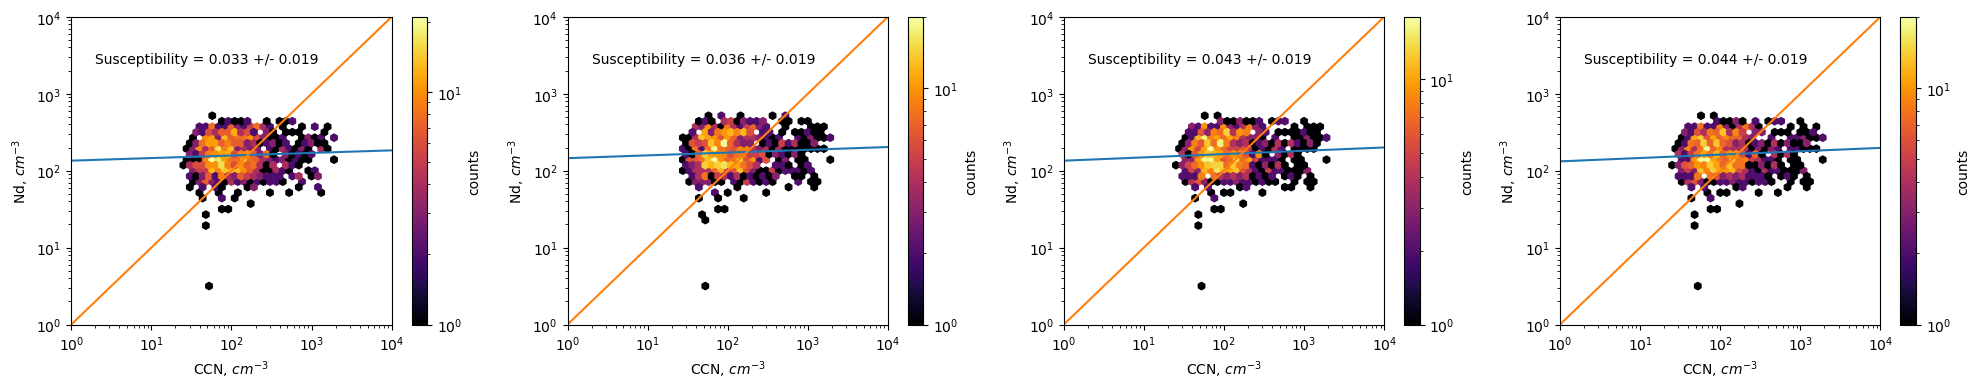

In [68]:
plt.figure(figsize = (20,4))
x = NorESM_ds['TotN70'].isel(lev = -1).where(NorESM_ds['Droplets'].isel(lev =-1)>0).dropna('time')
y = NorESM_ds['Droplets'].isel(lev = -1).where(NorESM_ds['Droplets'].isel(lev =-1)>0).dropna('time')
plt.subplot(1,4,1)
SBaseLev1 = Susceptibility(x,y)
plt.text(2,2500,f'Susceptibility = {SBaseLev1[0]:.3f} +/- {SBaseLev1[1]:.3f}')     
NdtoCCNGraph(x,y)
x =NorESM_ds['TotN70'].isel(lev = -1).where(NorESM_ds['DropletsCCUp1'].isel(lev =-1)>0).dropna('time')
y = NorESM_ds['DropletsCCUp1'].isel(lev = -1).where((NorESM_ds['DropletsCCUp1'].isel(lev =-1)>0) & (NorESM_ds['TotN70'].isel(lev = 0)>0)).dropna('time')
plt.subplot(1,4,2)
ActivatedSensitivity = Susceptibility(x,y)
plt.text(2,2500,f'Susceptibility = {ActivatedSensitivity[0]:.3f} +/- {ActivatedSensitivity[1]:.3f}')    
NdtoCCNGraph(x,y)
x = NorESM_ds['TotN70'].isel(lev = -1).where(NorESM_ds['DropletsCCUp2'].isel(lev =-1)>0).dropna('time')
y = NorESM_ds['DropletsCCUp2'].isel(lev = -1).where((NorESM_ds['DropletsCCUp2'].isel(lev =-1)>0) & (NorESM_ds['TotN70'].isel(lev = 0)>0)).dropna('time')
plt.subplot(1,4,3)
ActivatedSensitivityCC = Susceptibility(x,y)
plt.text(2,2500,f'Susceptibility = {ActivatedSensitivityCC[0]:.3f} +/- {ActivatedSensitivityCC[1]:.3f}')    
NdtoCCNGraph(x,y)

x = NorESM_ds['TotN70'].isel(lev = -1).where(NorESM_ds['DropletsCCUp3'].isel(lev =-1)>0).dropna('time')
y = NorESM_ds['DropletsCCUp3'].isel(lev = -1).where((NorESM_ds['DropletsCCUp3'].isel(lev =-1)>0) & (NorESM_ds['TotN70'].isel(lev = 0)>0)).dropna('time')
plt.subplot(1,4,4)
ActivatedSensitivityCC = Susceptibility(x,y)
plt.text(2,2500,f'Susceptibility = {ActivatedSensitivityCC[0]:.3f} +/- {ActivatedSensitivityCC[1]:.3f}')    
NdtoCCNGraph(x,y)
plt.tight_layout()

clUSTER size distribution and Critical radius visualization

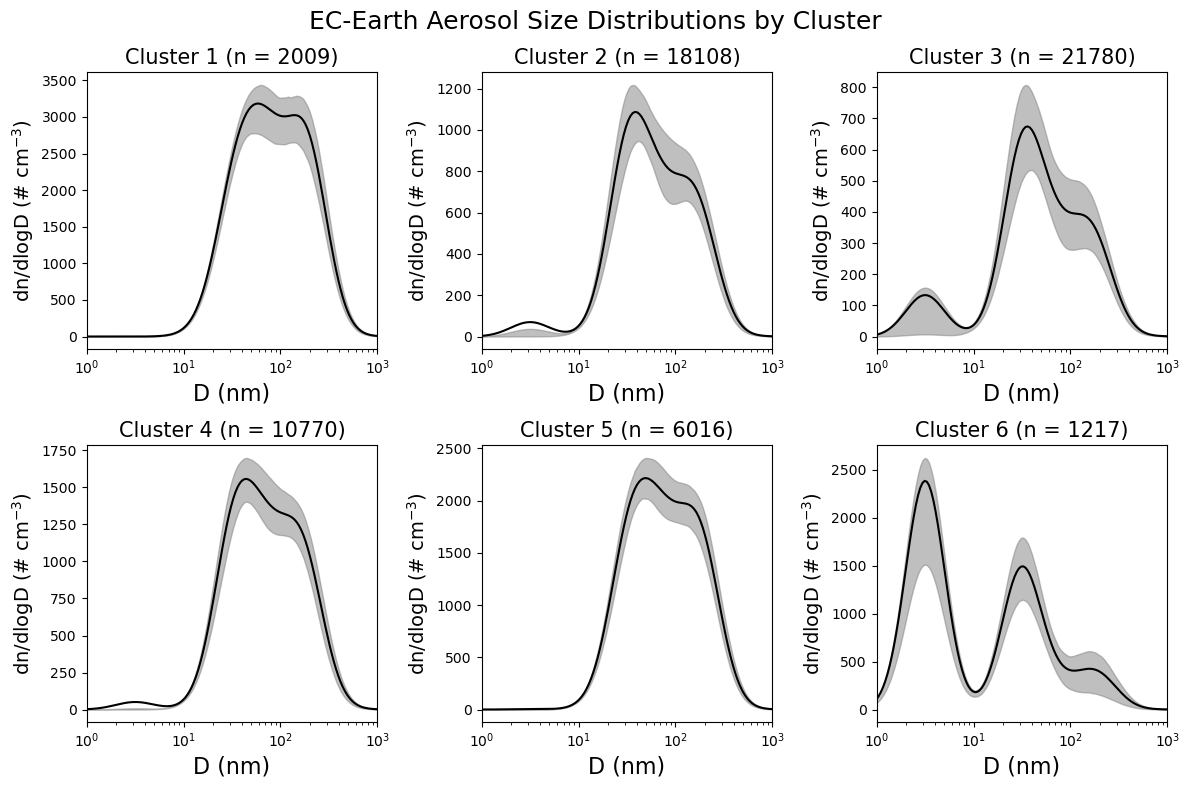

In [69]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8)) 
colors = ['red','blue','green']
legend_handles = []
for i, axis in enumerate(ax.flatten()):
    axis.plot(ECGroup[i]['D'],ECGroup[i]['Tot_dis'].isel(lev = 0).mean('time')/1E6, color = 'black')
    axis.set_xscale('log')
    axis.set_xlim([1,1000])
    axis.set_title(f'Cluster {i+1} (n = {len(ECGroup[i]['T'].dropna('time'))})', fontsize = 15)
    axis.set_xlabel('D (nm)', fontsize = 16)
    axis.set_ylabel(r'$\text{dn/dlogD } (\#\ \text{cm}^{-3})$', fontsize = 14)
    axis.fill_between(ECGroup[i]['D'],(ECGroup[i]['Tot_dis']*1E-6).isel(lev = 0).quantile(0.75, dim='time'),(ECGroup[i]['Tot_dis']*1E-6).isel(lev = 0).quantile(0.25, dim='time'),color='gray', alpha=0.5, label = 'Interquartile Range')

fig.suptitle('EC-Earth Aerosol Size Distributions by Cluster', fontsize = 18)            
plt.subplots_adjust(bottom=0.25)  
plt.tight_layout()
plt.show()
        

    
    


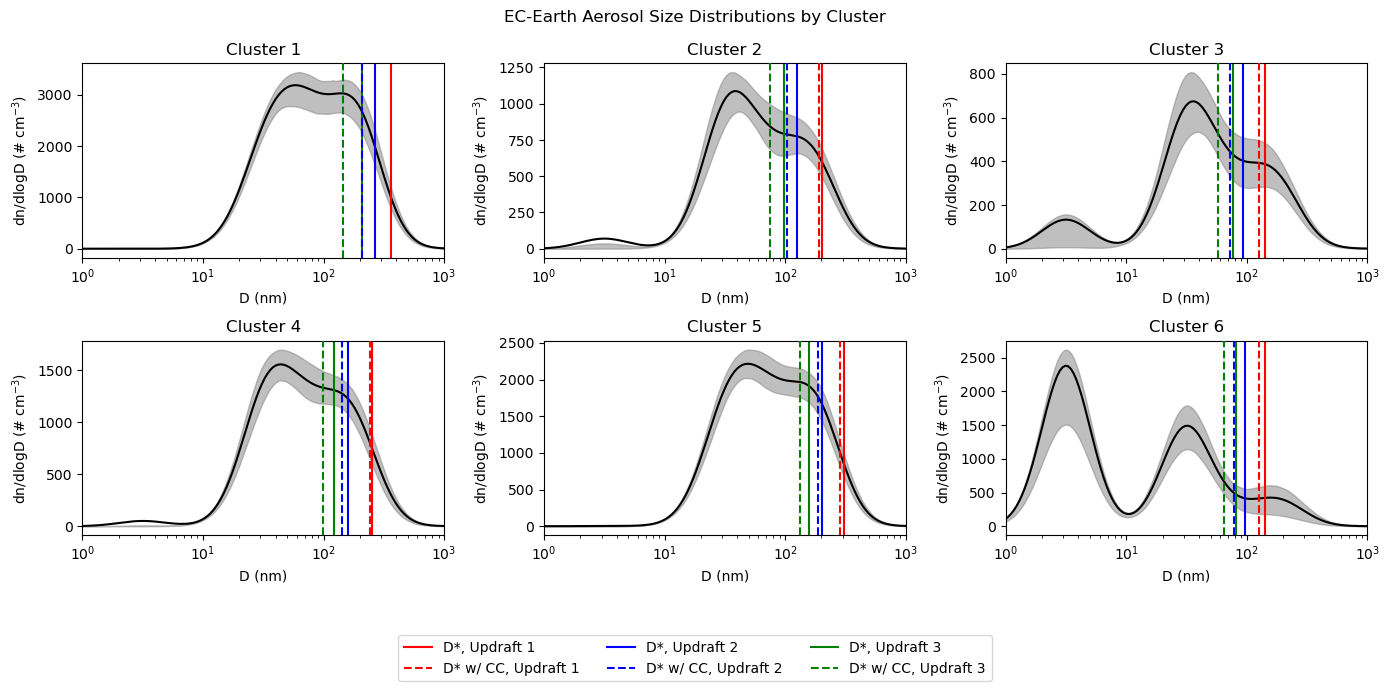

In [70]:
fig, ax = plt.subplots(2, 3, figsize=(14, 6)) 
colors = ['red','blue','green']
legend_handles = []
for i, axis in enumerate(ax.flatten()):
    axis.plot(ECGroup[i]['D'],ECGroup[i]['Tot_dis'].isel(lev = 0).mean('time')/1E6, color = 'black')
    axis.set_xscale('log')
    axis.set_xlim([1,1000])
    axis.set_title(f'Cluster {i+1}')
    axis.set_xlabel('D (nm)')
    axis.set_ylabel(r'$\text{dn/dlogD } (\#\ \text{cm}^{-3})$')
    axis.fill_between(ECGroup[i]['D'],(ECGroup[i]['Tot_dis']*1E-6).isel(lev = 0).quantile(0.75, dim='time'),(ECGroup[i]['Tot_dis']*1E-6).isel(lev = 0).quantile(0.25, dim='time'),color='gray', alpha=0.5, label = 'Interquartile Range')


    for n in range(3):
        h1 = axis.axvline(ECActR_df.iloc[n,i], color = colors[n], label = f'D*, Updraft {n+1}')
        h2 = axis.axvline(ECActR_CC_df.iloc[n,i], color = colors[n], ls = '--', zorder=1000,label = f'D* w/ CC, Updraft {n+1}')
        if i == 0:

            legend_handles.extend([h1, h2])
fig.suptitle('EC-Earth Aerosol Size Distributions by Cluster')            
fig.legend(handles=legend_handles, loc="lower center", bbox_to_anchor=(0.5,-0.15), ncol = 3)
plt.subplots_adjust(bottom=0.25)  
plt.tight_layout()
plt.show()
        

    
    


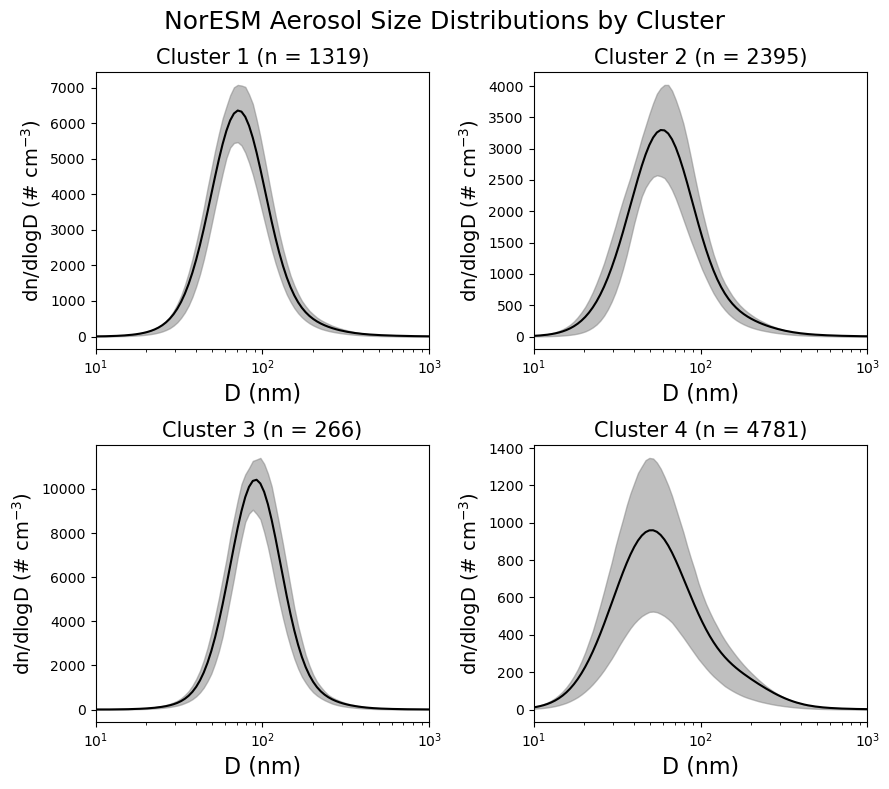

In [71]:
fig, ax = plt.subplots(2, 2, figsize=(9, 8)) 
colors = ['red','blue','green']
legend_handles = []
for i, axis in enumerate(ax.flatten()):
    axis.plot(NorGroup[i]['D'],NorGroup[i]['Tot_dis'].isel(lev = -1).mean('time'), color = 'black')
    axis.set_xscale('log')
    axis.set_xlim([10,1000])
    axis.set_title(f'Cluster {i+1} (n = {len(NorGroup[i]['T'].dropna('time'))})', fontsize = 15)
    axis.set_xlabel('D (nm)', fontsize = 16)
    axis.set_ylabel(r'$\text{dn/dlogD } (\#\ \text{cm}^{-3})$',fontsize = 14)
    axis.fill_between(NorGroup[i]['D'],NorGroup[i]['Tot_dis'].isel(lev = -1).quantile(0.75, dim='time'),NorGroup[i]['Tot_dis'].isel(lev = -1).quantile(0.25, dim='time'),color='gray', alpha=0.5, label = 'Interquartile Range')

fig.suptitle('NorESM Aerosol Size Distributions by Cluster', fontsize = 18)                        
plt.subplots_adjust(bottom=0.25)  
plt.tight_layout()
plt.show()

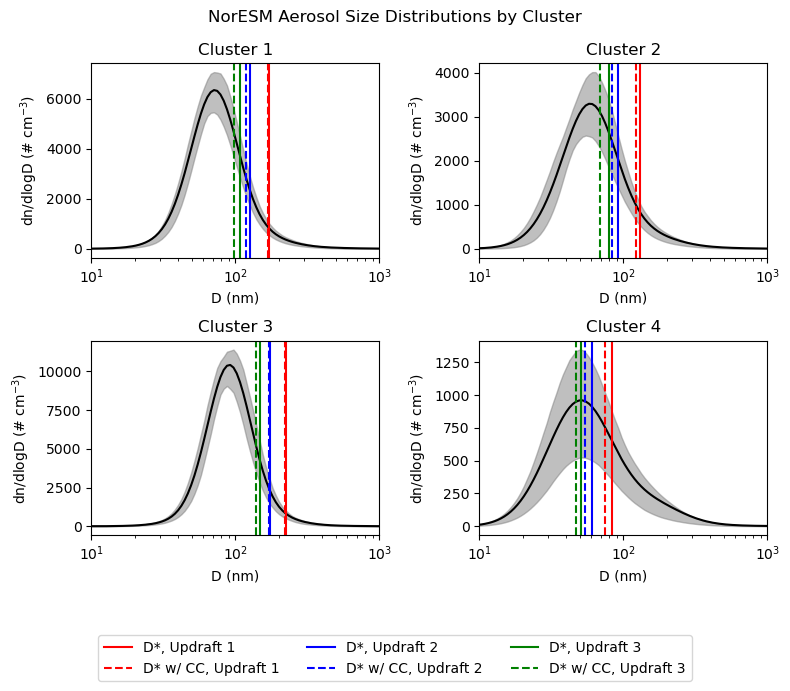

In [72]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6)) 
colors = ['red','blue','green']
legend_handles = []
for i, axis in enumerate(ax.flatten()):
    axis.plot(NorGroup[i]['D'],NorGroup[i]['Tot_dis'].isel(lev = -1).mean('time'), color = 'black')
    axis.set_xscale('log')
    axis.set_xlim([10,1000])
    axis.set_title(f'Cluster {i+1}')
    axis.set_xlabel('D (nm)')
    axis.set_ylabel(r'$\text{dn/dlogD } (\#\ \text{cm}^{-3})$')
    axis.fill_between(NorGroup[i]['D'],NorGroup[i]['Tot_dis'].isel(lev = -1).quantile(0.75, dim='time'),NorGroup[i]['Tot_dis'].isel(lev = -1).quantile(0.25, dim='time'),color='gray', alpha=0.5, label = 'Interquartile Range')
    for n in range(3):
        h1 = axis.axvline(NorActR_df.iloc[n,i], color = colors[n], label = f'D*, Updraft {n+1}')
        h2 = axis.axvline(NorActR_CC_df.iloc[n,i], color = colors[n], ls = '--', label = f'D* w/ CC, Updraft {n+1}')
        if i == 0:

            legend_handles.extend([h1, h2])
fig.suptitle('NorESM Aerosol Size Distributions by Cluster')                        
fig.legend(handles=legend_handles, loc="lower center", bbox_to_anchor=(0.5,-0.15), ncol = 3)
plt.subplots_adjust(bottom=0.25)  
plt.tight_layout()
plt.show()

nor Esm 
4 clusters
3 updrafts & 1 normal
x2 with CC 



In [73]:
BaseCaselev1 = Susceptibility(NorESM_ds['TotN70'].isel(lev = -1).where(NorESM_ds['Droplets'].isel(lev = -1)>0).dropna('time'),NorESM_ds['Droplets'].isel(lev = -1).dropna('time'))
BaseCaselev2 = Susceptibility(NorESM_ds['TotN70'].isel(lev = -2).where(NorESM_ds['Droplets'].isel(lev = -2)>0).dropna('time'),NorESM_ds['Droplets'].isel(lev = -2).dropna('time'))
BaseCaselev3 = Susceptibility(NorESM_ds['TotN70'].isel(lev = -3).where(NorESM_ds['Droplets'].isel(lev = -3)>0).dropna('time'),NorESM_ds['Droplets'].isel(lev = -3).dropna('time'))

In [74]:
Sensitivity = []
Yerr = []
for name in [BaseCaselev1,BaseCaselev2, BaseCaselev3]:
    Sensitivity.append(name[0])
    Yerr.append(name[1]*1.96)
for i in range (18):
    z = [-1, -2, -3][i % 3]
    if i in [3,4,5]:
        Sensitivity.append(Susceptibility(NorESM_ds[VarNamesReOrder[i]].where(NorESM_ds['DropletsCCUp1'].isel(lev = z)>0).dropna('time'),NorESM_ds['DropletsCCUp1'].isel(lev = z).dropna('time'))[0])
        Yerr.append(Susceptibility(NorESM_ds[VarNamesReOrder[i]].where(NorESM_ds['DropletsCCUp1'].isel(lev = z)>0).dropna('time'),NorESM_ds['DropletsCCUp1'].isel(lev = z).dropna('time'))[1]*1.96)
        continue
    if i in [9,10,11]:
        Sensitivity.append(Susceptibility(NorESM_ds[VarNamesReOrder[i]].where(NorESM_ds['DropletsCCUp2'].isel(lev = z)>0).dropna('time'),NorESM_ds['DropletsCCUp2'].isel(lev = z).dropna('time'))[0])
        Yerr.append(Susceptibility(NorESM_ds[VarNamesReOrder[i]].where(NorESM_ds['DropletsCCUp2'].isel(lev = z)>0).dropna('time'),NorESM_ds['DropletsCCUp2'].isel(lev = z).dropna('time'))[1])
        continue
    if i in [15,16,17]:
        Sensitivity.append(Susceptibility(NorESM_ds[VarNamesReOrder[i]].where(NorESM_ds['DropletsCCUp3'].isel(lev = z)>0).dropna('time'),NorESM_ds['DropletsCCUp3'].isel(lev = z).dropna('time'))[0])
        Yerr.append(Susceptibility(NorESM_ds[VarNamesReOrder[i]].where(NorESM_ds['DropletsCCUp3'].isel(lev = z)>0).dropna('time'),NorESM_ds['DropletsCCUp3'].isel(lev = z).dropna('time'))[1]*1.96)
        continue   
    Sensitivity.append(Susceptibility(NorESM_ds[VarNamesReOrder[i]].where(NorESM_ds['Droplets'].isel(lev = z)>0).dropna('time'),NorESM_ds['Droplets'].isel(lev = z).dropna('time'))[0])
    Yerr.append(Susceptibility(NorESM_ds[VarNamesReOrder[i]].where(NorESM_ds['Droplets'].isel(lev = z)>0).dropna('time'),NorESM_ds['Droplets'].isel(lev = z).dropna('time'))[1]*1.96)

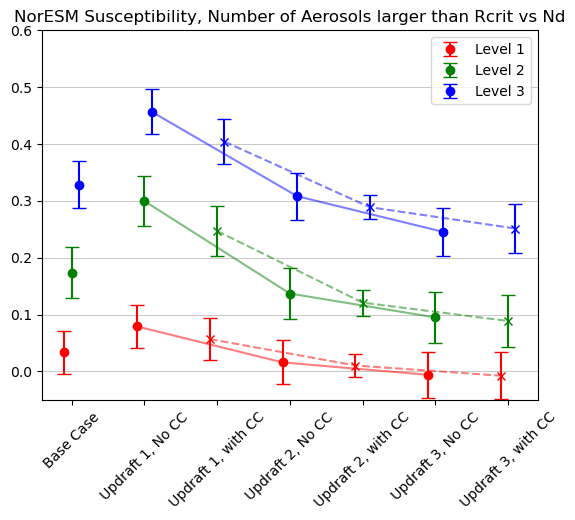

In [75]:
Names = ['Base Case', 'Updraft 1, No CC','Updraft 1, with CC',  'Updraft 2, No CC', 'Updraft 2, with CC', 'Updraft 3, No CC', 'Updraft 3, with CC']
x_positions = [.9,1,1.1,1.9,2,2.1,2.9,3,3.1,3.9,4,4.1,4.9,5,5.1,5.9,6,6.1,6.9,7,7.1]
xnames = np.arange(len(Names))
xnames = xnames +1
colors = ['red', 'green', 'blue']
for i in range(len(x_positions)):
    color = colors[i % len(colors)] 
    if i < 3:
        plt.errorbar(x_positions[i], Sensitivity[i], yerr=Yerr[i], fmt='o', capsize=5, color=color, label = f'Level {i+1}')
    else:
        if i in [3,4,5,9,10,11,15,16,17]:
            plt.errorbar(x_positions[i], Sensitivity[i], yerr=Yerr[i], fmt='o', capsize=5, color=color)
        else:
            plt.errorbar(x_positions[i], Sensitivity[i], yerr=Yerr[i], fmt='x', capsize=5, color=color)
for i in [0,1,2]:
    color = colors[i % len(colors)]
    plt.plot(x_positions[i+3:None:6],Sensitivity[i+3:None:6], linestyle = '-', color = color,  alpha = 0.5)
for i in [3,4,5]:
    color = colors[i % len(colors)]
    plt.plot(x_positions[i+3:None:6],Sensitivity[i+3:None:6], linestyle = '--', color = color,  alpha = 0.5)
plt.legend()   
plt.ylim([-0.05,.6])

plt.xticks(xnames, Names, rotation=45)
plt.grid(True, axis = 'y', which = 'major', linestyle="-", linewidth=0.5)
plt.title('NorESM Susceptibility, Number of Aerosols larger than Rcrit vs Nd')

plt.show()


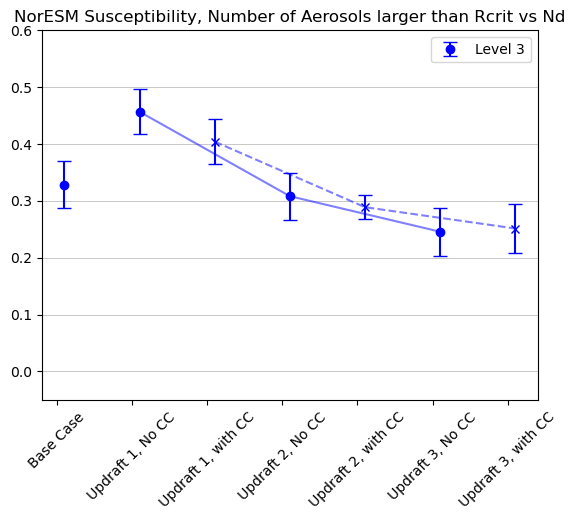

In [76]:
Names = ['Base Case', 'Updraft 1, No CC','Updraft 1, with CC',  'Updraft 2, No CC', 'Updraft 2, with CC', 'Updraft 3, No CC', 'Updraft 3, with CC']
x_positions = [.9,1,1.1,1.9,2,2.1,2.9,3,3.1,3.9,4,4.1,4.9,5,5.1,5.9,6,6.1,6.9,7,7.1]
xnames = np.arange(len(Names))
xnames = xnames +1
lev3position = [2,5,8,11,14,17, 20]
markers = ['o','x']
for i in range(len(x_positions)):
    color = 'blue'
    
    if i == 2:
        plt.errorbar(x_positions[i], Sensitivity[i], yerr=Yerr[i], fmt='o', capsize=5, color=color, label = f'Level {i+1}')
    else:
        if i in [2,5,11,17]:
            plt.errorbar(x_positions[i], Sensitivity[i], yerr=Yerr[i], fmt='o', capsize=5, color=color)
        if i in [8,14,20]: 
           plt.errorbar(x_positions[i], Sensitivity[i], yerr=Yerr[i], fmt='x', capsize=5, color=color) 
i = 2

plt.plot(x_positions[i+3:None:6],Sensitivity[i+3:None:6], linestyle = '-', color = color,  alpha = 0.5)
i = 5
plt.plot(x_positions[i+3:None:6],Sensitivity[i+3:None:6], linestyle = '--', color = color,  alpha = 0.5)
plt.ylim([-0.05,.6])
plt.legend()    
plt.xticks(xnames, Names, rotation=45)
plt.grid(True, axis = 'y', which = 'major', linestyle="-", linewidth=0.5)
plt.title('NorESM Susceptibility, Number of Aerosols larger than Rcrit vs Nd')

plt.show()


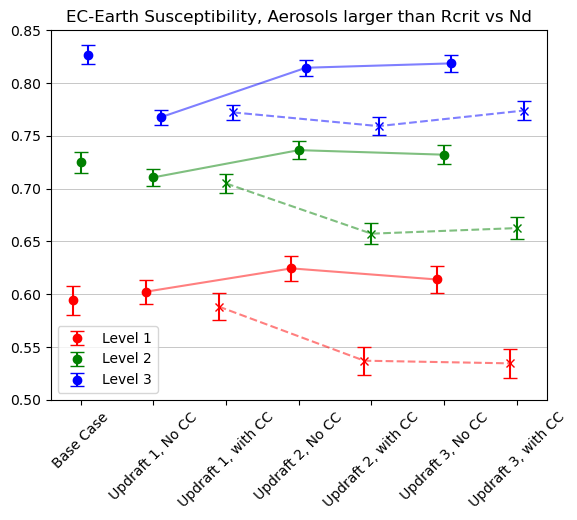

In [77]:

x_positions = [.9,1,1.1,1.9,2,2.1,2.9,3,3.1,3.9,4,4.1,4.9,5,5.1,5.9,6,6.1,6.9,7,7.1]
xnames = np.arange(len(Names))
xnames = xnames +1
colors = ['red', 'green', 'blue']
for i in range(len(x_positions)):
    color = colors[i % len(colors)] 
    if i < 3:
        plt.errorbar(x_positions[i], SensitivityEC[i], yerr=YerrEC[i], fmt='o', capsize=5, color=color, label = f'Level {i+1}')
    else:
        if i in [3,4,5,9,10,11,15,16,17]:
            plt.errorbar(x_positions[i], SensitivityEC[i], yerr=YerrEC[i], fmt='o', capsize=5, color=color)
        else:
            plt.errorbar(x_positions[i], SensitivityEC[i], yerr=YerrEC[i], fmt='x', capsize=5, color=color)
for i in [0,1,2]:
    color = colors[i % len(colors)]
    plt.plot(x_positions[i+3:None:6],SensitivityEC[i+3:None:6], linestyle = '-', color = color,  alpha = 0.5)
for i in [3,4,5]:
    color = colors[i % len(colors)]
    plt.plot(x_positions[i+3:None:6],SensitivityEC[i+3:None:6], linestyle = '--', color = color,  alpha = 0.5)
plt.legend() 
plt.ylim([0.5,.85])

plt.xticks(xnames, Names, rotation=45)
plt.grid(True, axis = 'y', which = 'major', linestyle="-", linewidth=0.5)
plt.title('EC-Earth Susceptibility, Aerosols larger than Rcrit vs Nd')

plt.show()

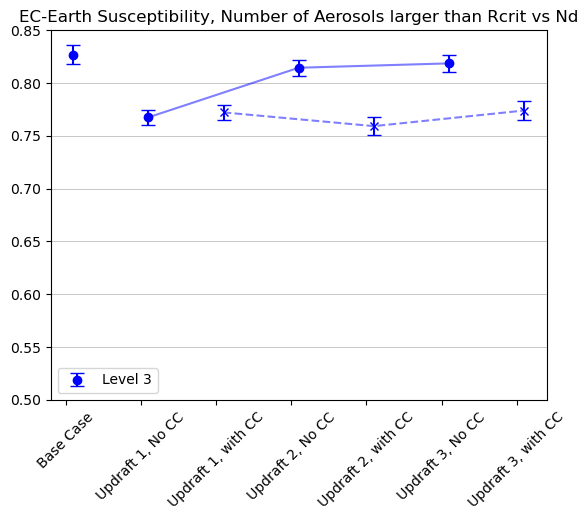

In [78]:
Names = ['Base Case', 'Updraft 1, No CC','Updraft 1, with CC',  'Updraft 2, No CC', 'Updraft 2, with CC', 'Updraft 3, No CC', 'Updraft 3, with CC']
x_positions = [.9,1,1.1,1.9,2,2.1,2.9,3,3.1,3.9,4,4.1,4.9,5,5.1,5.9,6,6.1,6.9,7,7.1]
xnames = np.arange(len(Names))
xnames = xnames +1
lev3position = [2,5,8,11,14,17, 20]
markers = ['o','x']
for i in range(len(x_positions)):
    color = 'blue'
    
    if i == 2:
        plt.errorbar(x_positions[i], SensitivityEC[i], yerr=YerrEC[i], fmt='o', capsize=5, color=color, label = f'Level {i+1}')
    else:
        if i in [2,5,11,17]:
            plt.errorbar(x_positions[i], SensitivityEC[i], yerr=YerrEC[i], fmt='o', capsize=5, color=color)
        if i in [8,14,20]: 
           plt.errorbar(x_positions[i], SensitivityEC[i], yerr=YerrEC[i], fmt='x', capsize=5, color=color) 
i = 2

plt.plot(x_positions[i+3:None:6],SensitivityEC[i+3:None:6], linestyle = '-', color = color,  alpha = 0.5)
i = 5
plt.plot(x_positions[i+3:None:6],SensitivityEC[i+3:None:6], linestyle = '--', color = color,  alpha = 0.5)
plt.ylim([0.5,.85])

plt.legend()    
plt.xticks(xnames, Names, rotation=45)
plt.grid(True, axis = 'y', which = 'major', linestyle="-", linewidth=0.5)
plt.title('EC-Earth Susceptibility, Number of Aerosols larger than Rcrit vs Nd')

plt.show()


In [79]:
x_positions = [.9,1,1.1,1.9,2,2.1,2.9,3,3.1,3.9,4,4.1,4.9,5,5.1,5.9,6,6.1,6.9,7,7.1]
noCCpositionlev1 = x_positions[3:None:6]
SensitivityEC

[np.float64(0.5941362377785278),
 np.float64(0.7251967285377134),
 np.float64(0.8269095552581155),
 np.float64(0.6024399347778284),
 np.float64(0.7106727719254942),
 np.float64(0.7675512260720169),
 np.float64(0.5883496485559064),
 np.float64(0.7049609079767138),
 np.float64(0.7722081093261631),
 np.float64(0.6245119461764363),
 np.float64(0.7364956844808648),
 np.float64(0.8145193013428002),
 np.float64(0.5370971455613047),
 np.float64(0.6573833099252807),
 np.float64(0.7592281999009901),
 np.float64(0.6140133286789485),
 np.float64(0.7321743053313008),
 np.float64(0.8186522643632355),
 np.float64(0.5345816914928191),
 np.float64(0.6626860344287021),
 np.float64(0.7740055844338938)]

(np.float64(0.6245119461764363), np.float64(0.0061282973504831785))
(np.float64(0.5370971455613047), np.float64(0.006789500468573477))
(np.float64(0.7364956844808648), np.float64(0.004361504535383857))
(np.float64(0.6573833099252807), np.float64(0.005050197923546607))
(np.float64(0.8145193013428002), np.float64(0.0038753207364766507))
(np.float64(0.7592281999009901), np.float64(0.004405900504193682))


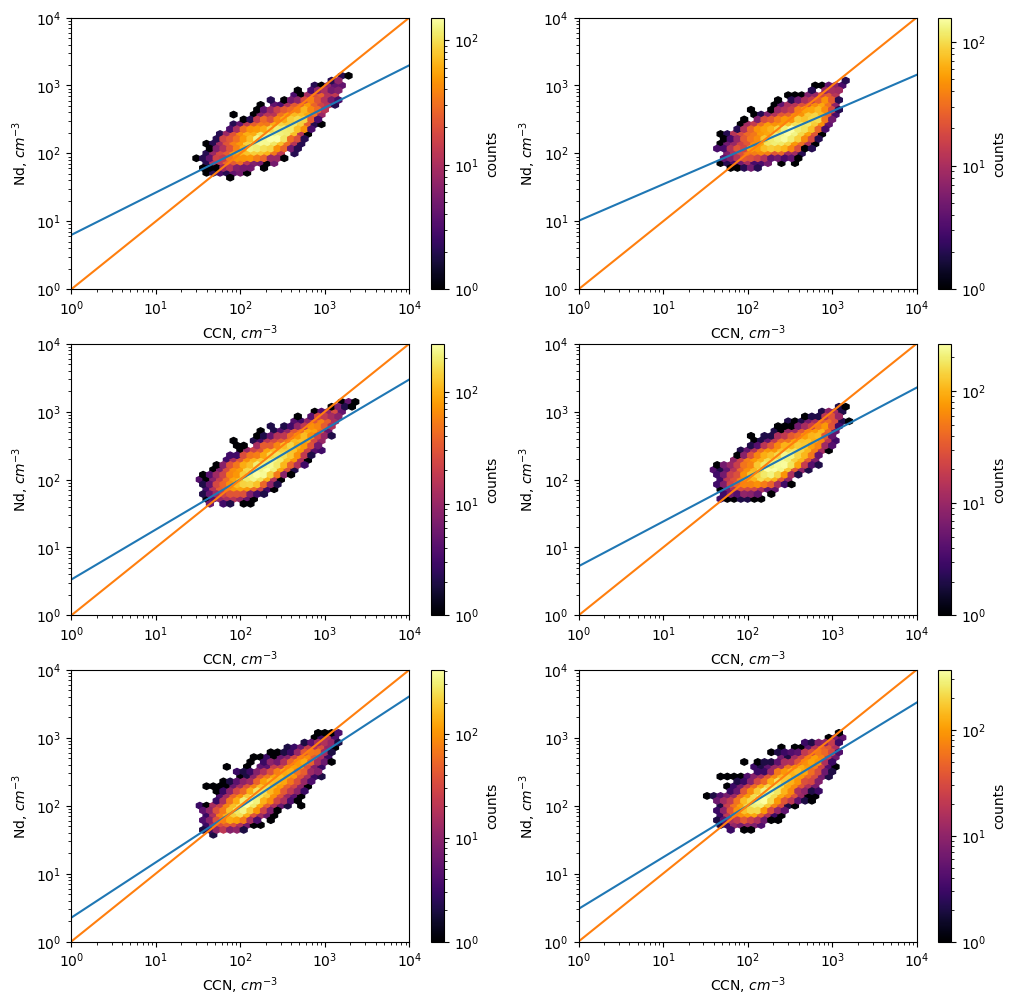

In [80]:
plt.figure(figsize = (12,12))
plt.subplot(3,2,1)
NdtoCCNGraph(ECearth_ds['Lev1Up2NoCC'].where(ECearth_ds['Droplets'].isel(lev = 0)>0).dropna('time')/1E6,ECearth_ds['Droplets'].isel(lev = 0).dropna('time'))
print(Susceptibility(ECearth_ds['Lev1Up2NoCC'].where(ECearth_ds['Droplets'].isel(lev = 0)>0).dropna('time')/1E6,ECearth_ds['Droplets'].isel(lev = 0).dropna('time')))
plt.subplot(3,2,2)
NdtoCCNGraph(ECearth_ds['Lev1Up2CC'].where(ECearth_ds['DropletsCCUp2'].isel(lev = 0)>0).dropna('time')/1E6,ECearth_ds['DropletsCCUp2'].isel(lev = 0).dropna('time'))
print(Susceptibility(ECearth_ds['Lev1Up2CC'].where(ECearth_ds['DropletsCCUp2'].isel(lev = 0)>0).dropna('time')/1E6,ECearth_ds['DropletsCCUp2'].isel(lev = 0).dropna('time')))
plt.subplot(3,2,3)
NdtoCCNGraph(ECearth_ds['Lev2Up2NoCC'].where(ECearth_ds['Droplets'].isel(lev = 1)>0).dropna('time')/1E6,ECearth_ds['Droplets'].isel(lev = 1).dropna('time'))
print(Susceptibility(ECearth_ds['Lev2Up2NoCC'].where(ECearth_ds['Droplets'].isel(lev = 1)>0).dropna('time')/1E6,ECearth_ds['Droplets'].isel(lev = 1).dropna('time')))
plt.subplot(3,2,4)
NdtoCCNGraph(ECearth_ds['Lev2Up2CC'].where(ECearth_ds['DropletsCCUp2'].isel(lev = 1)>0).dropna('time')/1E6,ECearth_ds['DropletsCCUp2'].isel(lev = 1).dropna('time'))
print(Susceptibility(ECearth_ds['Lev2Up2CC'].where(ECearth_ds['DropletsCCUp2'].isel(lev = 1)>0).dropna('time')/1E6,ECearth_ds['DropletsCCUp2'].isel(lev = 1).dropna('time')))
plt.subplot(3,2,5)
NdtoCCNGraph(ECearth_ds['Lev3Up2NoCC'].where(ECearth_ds['Droplets'].isel(lev = 2)>0).dropna('time')/1E6,ECearth_ds['Droplets'].isel(lev = 2).dropna('time'))
print(Susceptibility(ECearth_ds['Lev3Up2NoCC'].where(ECearth_ds['Droplets'].isel(lev = 2)>0).dropna('time')/1E6,ECearth_ds['Droplets'].isel(lev = 2).dropna('time')))
plt.subplot(3,2,6)
NdtoCCNGraph(ECearth_ds['Lev3Up2CC'].where(ECearth_ds['DropletsCCUp2'].isel(lev = 2)>0).dropna('time')/1E6,ECearth_ds['DropletsCCUp2'].isel(lev = 2).dropna('time'))
print(Susceptibility(ECearth_ds['Lev3Up2CC'].where(ECearth_ds['DropletsCCUp2'].isel(lev = 2)>0).dropna('time')/1E6,ECearth_ds['DropletsCCUp2'].isel(lev = 2).dropna('time')))


In [81]:
BaseCaselev1 = Susceptibility(NorESM_ds['TotN70'].isel(lev = -1).where(NorESM_ds['Droplets'].isel(lev = -1)>0).dropna('time'),NorESM_ds['Droplets'].isel(lev = -1).dropna('time'))

N70Updraft1CClev1 = Susceptibility(NorESM_ds['TotN70'].isel(lev = -1).where(NorESM_ds['DropletsCCUp1'].isel(lev = -1)>0).dropna('time'),NorESM_ds['DropletsCCUp1'].isel(lev = -1).dropna('time'))
N70Updraft2CClev1 = Susceptibility(NorESM_ds['TotN70'].isel(lev = -1).where(NorESM_ds['DropletsCCUp2'].isel(lev = -1)>0).dropna('time'),NorESM_ds['DropletsCCUp2'].isel(lev = -1).dropna('time'))
N70Updraft3CClev1 = Susceptibility(NorESM_ds['TotN70'].isel(lev = -1).where(NorESM_ds['DropletsCCUp3'].isel(lev = -1)>0).dropna('time'),NorESM_ds['DropletsCCUp3'].isel(lev = -1).dropna('time'))

BaseCaselev2 = Susceptibility(NorESM_ds['TotN70'].isel(lev = -2).where(NorESM_ds['Droplets'].isel(lev = -2)>0).dropna('time'),NorESM_ds['Droplets'].isel(lev = -2).dropna('time'))

N70Updraft1CClev2 = Susceptibility(NorESM_ds['TotN70'].isel(lev = -2).where(NorESM_ds['DropletsCCUp1'].isel(lev = -2)>0).dropna('time'),NorESM_ds['DropletsCCUp1'].isel(lev = -2).dropna('time'))
N70Updraft2CClev2 = Susceptibility(NorESM_ds['TotN70'].isel(lev = -2).where(NorESM_ds['DropletsCCUp2'].isel(lev = -2)>0).dropna('time'),NorESM_ds['DropletsCCUp2'].isel(lev = -2).dropna('time'))
N70Updraft3CClev2 = Susceptibility(NorESM_ds['TotN70'].isel(lev = -2).where(NorESM_ds['DropletsCCUp3'].isel(lev = -2)>0).dropna('time'),NorESM_ds['DropletsCCUp3'].isel(lev = -2).dropna('time'))

BaseCaselev3 = Susceptibility(NorESM_ds['TotN70'].isel(lev = -3).where(NorESM_ds['Droplets'].isel(lev = -3)>0).dropna('time'),NorESM_ds['Droplets'].isel(lev = -3).dropna('time'))

N70Updraft1CClev3 = Susceptibility(NorESM_ds['TotN70'].isel(lev = -3).where(NorESM_ds['DropletsCCUp1'].isel(lev = -3)>0).dropna('time'),NorESM_ds['DropletsCCUp1'].isel(lev = -3).dropna('time'))
N70Updraft2CClev3 = Susceptibility(NorESM_ds['TotN70'].isel(lev = -3).where(NorESM_ds['DropletsCCUp2'].isel(lev = -3)>0).dropna('time'),NorESM_ds['DropletsCCUp2'].isel(lev = -3).dropna('time'))
N70Updraft3CClev3 = Susceptibility(NorESM_ds['TotN70'].isel(lev = -3).where(NorESM_ds['DropletsCCUp3'].isel(lev = -3)>0).dropna('time'),NorESM_ds['DropletsCCUp3'].isel(lev = -3).dropna('time'))

In [82]:
NameslistN70 = [BaseCaselev1,BaseCaselev2, BaseCaselev3,\
             N70Updraft1CClev1,N70Updraft1CClev2,N70Updraft1CClev3,\
             N70Updraft2CClev1,N70Updraft2CClev2,N70Updraft2CClev3,\
             N70Updraft3CClev1,N70Updraft3CClev2,N70Updraft3CClev3]
SensitivityN70 = []
YerrN70 = []
for Name in NameslistN70:
    SensitivityN70.append(Name[0])
    YerrN70.append(Name[1]*1.96)
NamesN70 = ['Base Case','Updraft 1, with CC', 'Updraft 2, with CC', 'Updraft 3, with CC']

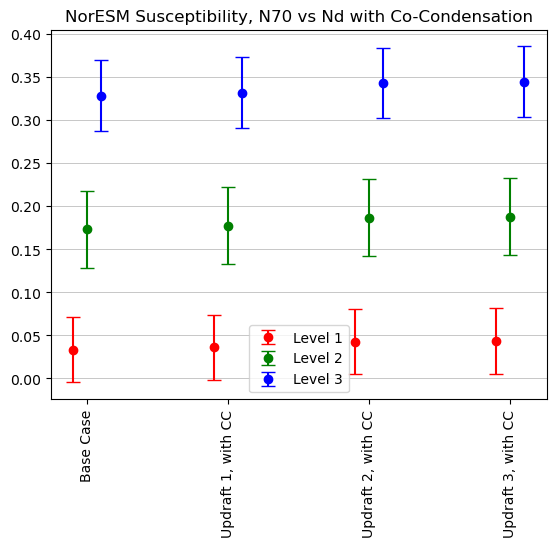

In [83]:
x_positionsN70 = [.9,1,1.1,1.9,2,2.1,2.9,3,3.1,3.9,4,4.1]
xnamesN70 = np.arange(len(NamesN70))
xnamesN70 = xnamesN70 +1
colors = ['red', 'green', 'blue']
for i in range(len(x_positionsN70)):
    color = colors[i % len(colors)] 
    if i < 3:
        plt.errorbar(x_positionsN70[i], SensitivityN70[i], yerr=YerrN70[i], fmt='o', capsize=5, color=color, label = f'Level {i+1}')
    else:
        plt.errorbar(x_positionsN70[i], SensitivityN70[i], yerr=YerrN70[i], fmt='o', capsize=5, color=color)
plt.legend()    
plt.xticks(xnamesN70, NamesN70, rotation=90)
plt.grid(True, axis = 'y', which = 'major', linestyle="-", linewidth=0.5)
plt.title('NorESM Susceptibility, N70 vs Nd with Co-Condensation')
plt.show()


In [84]:
BaseCaselev1EC = Susceptibility(ECearth_ds['TotN70'].isel(lev = 0).where(ECearth_ds['Droplets'].isel(lev = 0)>0).dropna('time')/1E6,ECearth_ds['Droplets'].isel(lev = 0).dropna('time'))

N70ECUpdraft1CClev1 = Susceptibility(ECearth_ds['TotN70'].isel(lev = 0).where(ECearth_ds['DropletsCCUp1'].isel(lev = 0)>0).dropna('time')/1E6,\
                                ECearth_ds['DropletsCCUp1'].isel(lev = 0).where((ECearth_ds['DropletsCCUp1'].isel(lev =0)>0) & (ECearth_ds['TotN70'].isel(lev = 0)>0)).dropna('time'))
N70ECUpdraft2CClev1 = Susceptibility(ECearth_ds['TotN70'].isel(lev = 0).where(ECearth_ds['DropletsCCUp2'].isel(lev = 0)>0).dropna('time')/1E6,\
                                ECearth_ds['DropletsCCUp2'].isel(lev = 0).where((ECearth_ds['DropletsCCUp2'].isel(lev =0)>0) & (ECearth_ds['TotN70'].isel(lev = 0)>0)).dropna('time'))
N70ECUpdraft3CClev1 = Susceptibility(ECearth_ds['TotN70'].isel(lev = 0).where(ECearth_ds['DropletsCCUp3'].isel(lev = 0)>0).dropna('time')/1E6,\
                                ECearth_ds['DropletsCCUp3'].isel(lev = 0).where((ECearth_ds['DropletsCCUp3'].isel(lev =0)>0) & (ECearth_ds['TotN70'].isel(lev = 0)>0)).dropna('time'))

BaseCaselev2EC = Susceptibility(ECearth_ds['TotN70'].isel(lev = 1).where(ECearth_ds['Droplets'].isel(lev = 1)>0).dropna('time')/1E6,ECearth_ds['Droplets'].isel(lev = 1).dropna('time'))

N70ECUpdraft1CClev2 = Susceptibility(ECearth_ds['TotN70'].isel(lev = 1).where(ECearth_ds['DropletsCCUp1'].isel(lev = 1)>0).dropna('time')/1E6,\
                                ECearth_ds['DropletsCCUp1'].isel(lev = 1).where((ECearth_ds['DropletsCCUp1'].isel(lev = 1)>0) & (ECearth_ds['TotN70'].isel(lev = 1)>0)).dropna('time'))
N70ECUpdraft2CClev2 = Susceptibility(ECearth_ds['TotN70'].isel(lev = 1).where(ECearth_ds['DropletsCCUp2'].isel(lev = 1)>0).dropna('time')/1E6,\
                                ECearth_ds['DropletsCCUp2'].isel(lev = 1).where((ECearth_ds['DropletsCCUp2'].isel(lev = 1)>0) & (ECearth_ds['TotN70'].isel(lev = 1)>0)).dropna('time'))
N70ECUpdraft3CClev2 = Susceptibility(ECearth_ds['TotN70'].isel(lev = 1).where(ECearth_ds['DropletsCCUp3'].isel(lev = 1)>0).dropna('time')/1E6,\
                                ECearth_ds['DropletsCCUp3'].isel(lev = 1).where((ECearth_ds['DropletsCCUp3'].isel(lev = 1)>0) & (ECearth_ds['TotN70'].isel(lev = 1)>0)).dropna('time'))

BaseCaselev3EC = Susceptibility(ECearth_ds['TotN70'].isel(lev = 2).where(ECearth_ds['Droplets'].isel(lev = 2)>0).dropna('time')/1E6,ECearth_ds['Droplets'].isel(lev = 2).dropna('time'))

N70ECUpdraft1CClev3 = Susceptibility(ECearth_ds['TotN70'].isel(lev = 2).where(ECearth_ds['DropletsCCUp1'].isel(lev = 2)>0).dropna('time')/1E6,\
                                ECearth_ds['DropletsCCUp1'].isel(lev = 2).where((ECearth_ds['DropletsCCUp1'].isel(lev =2)>0) & (ECearth_ds['TotN70'].isel(lev = 2)>0)).dropna('time'))
N70ECUpdraft2CClev3 = Susceptibility(ECearth_ds['TotN70'].isel(lev = 2).where(ECearth_ds['DropletsCCUp2'].isel(lev = 2)>0).dropna('time')/1E6,\
                                ECearth_ds['DropletsCCUp2'].isel(lev = 2).where((ECearth_ds['DropletsCCUp2'].isel(lev =2)>0) & (ECearth_ds['TotN70'].isel(lev = 2)>0)).dropna('time'))
N70ECUpdraft3CClev3 = Susceptibility(ECearth_ds['TotN70'].isel(lev = 2).where(ECearth_ds['DropletsCCUp3'].isel(lev = 2)>0).dropna('time')/1E6,\
                                ECearth_ds['DropletsCCUp3'].isel(lev = 2).where((ECearth_ds['DropletsCCUp3'].isel(lev =2)>0) & (ECearth_ds['TotN70'].isel(lev = 2)>0)).dropna('time'))

In [85]:
NameslistN70EC = [BaseCaselev1EC,BaseCaselev2EC, BaseCaselev3EC,\
             N70ECUpdraft1CClev1,N70ECUpdraft1CClev2,N70ECUpdraft1CClev3,\
             N70ECUpdraft2CClev1,N70ECUpdraft2CClev2,N70ECUpdraft2CClev3,\
             N70ECUpdraft3CClev1,N70ECUpdraft3CClev2,N70ECUpdraft3CClev3]
SensitivityN70EC = []
YerrN70EC = []
for Name in NameslistN70EC:
    SensitivityN70EC.append(Name[0])
    YerrN70EC.append(Name[1]*1.96)
NamesN70EC = ['Base Case','Updraft 1, with CC', 'Updraft 2, with CC', 'Updraft 3, with CC']

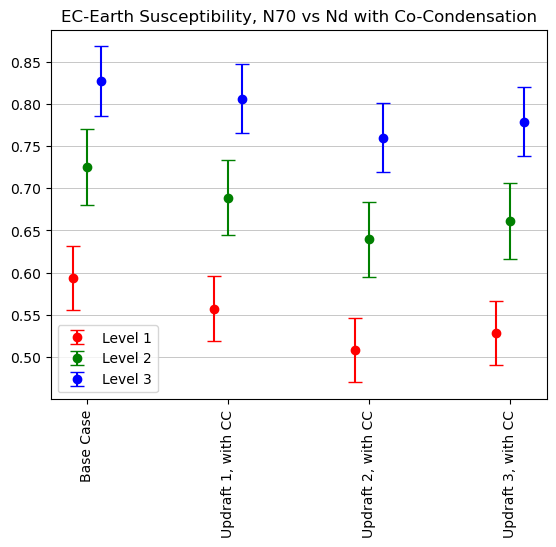

In [86]:
x_positionsN70EC = [.9,1,1.1,1.9,2,2.1,2.9,3,3.1,3.9,4,4.1]
xnamesN70EC = np.arange(len(NamesN70EC))
xnamesN70EC = xnamesN70EC +1
colors = ['red', 'green', 'blue']
for i in range(len(x_positionsN70EC)):
    color = colors[i % len(colors)] 
    if i < 3:
        plt.errorbar(x_positionsN70EC[i], SensitivityN70EC[i], yerr=YerrN70[i], fmt='o', capsize=5, color=color, label = f'Level {i+1}')
    else:
        plt.errorbar(x_positionsN70EC[i], SensitivityN70EC[i], yerr=YerrN70[i], fmt='o', capsize=5, color=color)
plt.legend()    
plt.xticks(xnamesN70EC, NamesN70EC, rotation=90)
plt.grid(True, axis = 'y', which = 'major', linestyle="-", linewidth=0.5)
plt.title('EC-Earth Susceptibility, N70 vs Nd with Co-Condensation')

plt.show()


weigthed means 
What is driving the spread at x and y axes 
where is the activation diameter and the impact of shifting 
    greater slope and particle concentration 
    greater slope lower susceptibility 
    composition?
    

(array([179., 597., 507., 342., 221., 128.,  42.,  26.,  11.,   3.]),
 array([ 47.59703827,  80.67555237, 113.7540741 , 146.83258057,
        179.91110229, 212.98962402, 246.06814575, 279.14666748,
        312.22518921, 345.30371094, 378.38223267]),
 <BarContainer object of 10 artists>)

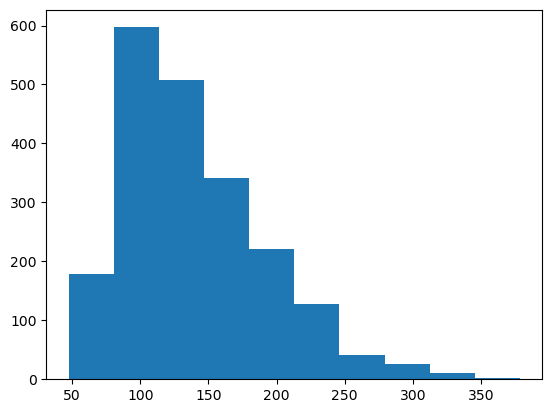

In [87]:
plt.hist(ECGroup[2]['Droplets'].isel(lev = 0))

In [88]:
303/(ECGroup[2]['ActivatedNumberUpdraft2'].isel(lev = 0)/1E6).mean()

<xarray.DataArray 'ActivatedNumberUpdraft2' ()> Size: 8B
np.float64(1.64156458368874)
Coordinates:
    lev      float32 4B 998.9
    station  <U6 24B 'SMR-II'
    Dx       float64 8B 0.03765
    index    <U19 76B 'Cluster 2 Updraft 1'

In [89]:
368/(ECGroup[2]['ActivatedNumberUpdraft2CC'].isel(lev = 0)/1E6).mean()

<xarray.DataArray 'ActivatedNumberUpdraft2CC' ()> Size: 8B
np.float64(1.5876986405694846)
Coordinates:
    lev      float32 4B 998.9
    station  <U6 24B 'SMR-II'
    Dx       float64 8B 0.03765
    index    <U19 76B 'Cluster 2 Updraft 1'

In [90]:
(ECGroup[0]['ActivatedNumberUpdraft1'].isel(lev = 0)/1E6).mean()

<xarray.DataArray 'ActivatedNumberUpdraft1' ()> Size: 8B
np.float64(110.95467624444099)
Coordinates:
    lev      float32 4B 998.9
    station  <U6 24B 'SMR-II'
    Dx       float64 8B 0.03765
    index    <U19 76B 'Cluster 2 Updraft 1'

In [91]:
ECCDNC_ds['NoCC CDNC ($cm^{-3}$)'].values[0:6]

array([644., 300., 207., 394., 496., 198.])

In [92]:
for i in range(6):
    print(f'Updraft 1 Cluster {i+1} Activated Percent= {(ECGroup[i]['ActivatedNumberUpdraft1'].isel(lev = 0)/1E6).median()/np.float64(ECCDNC_ds['NoCC CDNC ($cm^{-3}$)'][i])*100:.2f}\
    and with CC  = {(ECGroup[i]['ActivatedNumberUpdraft1CC'].isel(lev = 0)/1E6).median()/np.float64(ECCDNC_ds['CC CDNC ($cm^{-3}$)'][i])*100:.2f}')
    print(f'Updraft 2 Cluster {i+1} Activated Percent= {(ECGroup[i]['ActivatedNumberUpdraft2'].isel(lev = 0)/1E6).median()/np.float64(ECCDNC_ds['NoCC CDNC ($cm^{-3}$)'][i+6])*100:.2f}\
    and with CC  = {(ECGroup[i]['ActivatedNumberUpdraft2CC'].isel(lev = 0)/1E6).median()/np.float64(ECCDNC_ds['CC CDNC ($cm^{-3}$)'][i+12])*100:.2f}')
    print(f'Updraft 3 Cluster {i+1} Activated Percent= {(ECGroup[i]['ActivatedNumberUpdraft3'].isel(lev = 0)/1E6).median()/np.float64(ECCDNC_ds['NoCC CDNC ($cm^{-3}$)'][i+6])*100:.2f}\
    and with CC  = {(ECGroup[i]['ActivatedNumberUpdraft3CC'].isel(lev = 0)/1E6).median()/np.float64(ECCDNC_ds['CC CDNC ($cm^{-3}$)'][i+12])*100:.2f}')


Updraft 1 Cluster 1 Activated Percent= 16.11    and with CC  = nan
Updraft 2 Cluster 1 Activated Percent= 29.99    and with CC  = 34.01
Updraft 3 Cluster 1 Activated Percent= 56.26    and with CC  = 61.84
Updraft 1 Cluster 2 Activated Percent= 32.97    and with CC  = 39.31
Updraft 2 Cluster 2 Activated Percent= 54.64    and with CC  = 46.28
Updraft 3 Cluster 2 Activated Percent= 69.99    and with CC  = 65.48
Updraft 1 Cluster 3 Activated Percent= 53.04    and with CC  = 56.41
Updraft 2 Cluster 3 Activated Percent= 60.49    and with CC  = 53.71
Updraft 3 Cluster 3 Activated Percent= 72.79    and with CC  = 66.38
Updraft 1 Cluster 4 Activated Percent= 26.36    and with CC  = 28.98
Updraft 2 Cluster 4 Activated Percent= 48.11    and with CC  = 39.51
Updraft 3 Cluster 4 Activated Percent= 70.62    and with CC  = 61.97
Updraft 1 Cluster 5 Activated Percent= 23.31    and with CC  = 24.54
Updraft 2 Cluster 5 Activated Percent= 39.60    and with CC  = 34.28
Updraft 3 Cluster 5 Activated Percen

In [93]:
ECActivatedPercentUp1 = []
ECActivatedPercentUp1CC = []
ECActivatedPercentUp2 = []
ECActivatedPercentUp2CC = []
ECActivatedPercentUp3 = []
ECActivatedPercentUp3CC = []

for i in range(6):
    ECActivatedPercentUp1.append((ECGroup[i]['ActivatedNumberUpdraft1'].isel(lev = 0)/1E6).median()/np.float64(ECCDNC_ds['NoCC CDNC ($cm^{-3}$)'][i])*100)
    ECActivatedPercentUp1CC.append((ECGroup[i]['ActivatedNumberUpdraft1CC'].isel(lev = 0)/1E6).median()/np.float64(ECCDNC_ds['CC CDNC ($cm^{-3}$)'][i])*100)
    ECActivatedPercentUp2.append((ECGroup[i]['ActivatedNumberUpdraft2'].isel(lev = 0)/1E6).median()/np.float64(ECCDNC_ds['NoCC CDNC ($cm^{-3}$)'][i+6])*100)
    ECActivatedPercentUp2CC.append((ECGroup[i]['ActivatedNumberUpdraft2CC'].isel(lev = 0)/1E6).median()/np.float64(ECCDNC_ds['CC CDNC ($cm^{-3}$)'][i+12])*100)
    ECActivatedPercentUp3.append((ECGroup[i]['ActivatedNumberUpdraft3'].isel(lev = 0)/1E6).median()/np.float64(ECCDNC_ds['NoCC CDNC ($cm^{-3}$)'][i+6])*100)
    ECActivatedPercentUp3CC.append((ECGroup[i]['ActivatedNumberUpdraft3CC'].isel(lev = 0)/1E6).median()/np.float64(ECCDNC_ds['CC CDNC ($cm^{-3}$)'][i+12])*100)


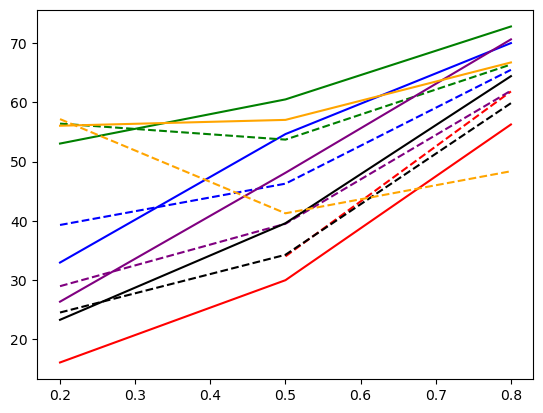

In [94]:
xposition = [0.2,0.5,0.8]
colors = ['red','blue','green','purple','black','orange']
for i in range(6):
    color = colors[i % len(colors)] 
    plt.plot(xposition, [np.float64(ECActivatedPercentUp1[i]),np.float64(ECActivatedPercentUp2[i]),np.float64(ECActivatedPercentUp3[i])], color = color)
    plt.plot(xposition, [np.float64(ECActivatedPercentUp1CC[i]),np.float64(ECActivatedPercentUp2CC[i]),np.float64(ECActivatedPercentUp3CC[i])] ,color = color, linestyle = '--')

In [95]:
for i in range(4):
    print(f'Updraft 1 Cluster {i+1} Activated Percent= {(NorGroup[i]['ActivatedNumberUpdraft1'].isel(lev = -1)).median()/np.float64(NorCDNC_ds['NoCC CDNC ($cm^{-3}$)'][i])*100:.2f}\
    and with CC  = {(NorGroup[i]['ActivatedNumberUpdraft1CC'].isel(lev = -1)).median()/np.float64(NorCDNC_ds['CC CDNC ($cm^{-3}$)'][i])*100:.2f}')
    print(f'Updraft 2 Cluster {i+1} Activated Percent= {(NorGroup[i]['ActivatedNumberUpdraft2'].isel(lev = -1)).median()/np.float64(NorCDNC_ds['NoCC CDNC ($cm^{-3}$)'][i+4])*100:.2f}\
    and with CC  = {(NorGroup[i]['ActivatedNumberUpdraft2CC'].isel(lev = -1)).median()/np.float64(NorCDNC_ds['CC CDNC ($cm^{-3}$)'][i+8])*100:.2f}')
    print(f'Updraft 3 Cluster {i+1} Activated Percent= {(NorGroup[i]['ActivatedNumberUpdraft3'].isel(lev = -1)).median()/np.float64(NorCDNC_ds['NoCC CDNC ($cm^{-3}$)'][i+4])*100:.2f}\
    and with CC  = {(NorGroup[i]['ActivatedNumberUpdraft3CC'].isel(lev = -1)).median()/np.float64(NorCDNC_ds['CC CDNC ($cm^{-3}$)'][i+8])*100:.2f}')


Updraft 1 Cluster 1 Activated Percent= 29.09    and with CC  = 27.59
Updraft 2 Cluster 1 Activated Percent= 39.90    and with CC  = 45.02
Updraft 3 Cluster 1 Activated Percent= 79.91    and with CC  = 74.25
Updraft 1 Cluster 2 Activated Percent= 39.43    and with CC  = 41.11
Updraft 2 Cluster 2 Activated Percent= 60.16    and with CC  = 73.70
Updraft 3 Cluster 2 Activated Percent= 91.22    and with CC  = 105.41
Updraft 1 Cluster 3 Activated Percent= 17.56    and with CC  = 19.84
Updraft 2 Cluster 3 Activated Percent= 25.06    and with CC  = 21.90
Updraft 3 Cluster 3 Activated Percent= 45.48    and with CC  = 47.97
Updraft 1 Cluster 4 Activated Percent= 96.98    and with CC  = 107.79
Updraft 2 Cluster 4 Activated Percent= 134.36    and with CC  = 143.18
Updraft 3 Cluster 4 Activated Percent= 165.65    and with CC  = 172.00


In [96]:
NorActivatedPercentUp1 = []
NorActivatedPercentUp1CC = []
NorActivatedPercentUp2 = []
NorActivatedPercentUp2CC = []
NorActivatedPercentUp3 = []
NorActivatedPercentUp3CC = []

for i in range(4):
    NorActivatedPercentUp1.append((NorGroup[i]['ActivatedNumberUpdraft1'].isel(lev = -1)).median()/np.float64(NorCDNC_ds['NoCC CDNC ($cm^{-3}$)'][i])*100)
    NorActivatedPercentUp1CC.append((NorGroup[i]['ActivatedNumberUpdraft1CC'].isel(lev = -1)).median()/np.float64(NorCDNC_ds['CC CDNC ($cm^{-3}$)'][i])*100)
    NorActivatedPercentUp2.append((NorGroup[i]['ActivatedNumberUpdraft2'].isel(lev = -1)).median()/np.float64(NorCDNC_ds['NoCC CDNC ($cm^{-3}$)'][i+4])*100)
    NorActivatedPercentUp2CC.append((NorGroup[i]['ActivatedNumberUpdraft2CC'].isel(lev = -1)).median()/np.float64(NorCDNC_ds['CC CDNC ($cm^{-3}$)'][i+8])*100)
    NorActivatedPercentUp3.append((NorGroup[i]['ActivatedNumberUpdraft3'].isel(lev =-1)).median()/np.float64(NorCDNC_ds['NoCC CDNC ($cm^{-3}$)'][i+4])*100)
    NorActivatedPercentUp3CC.append((NorGroup[i]['ActivatedNumberUpdraft3CC'].isel(lev = -1)).median()/np.float64(NorCDNC_ds['CC CDNC ($cm^{-3}$)'][i+8])*100)

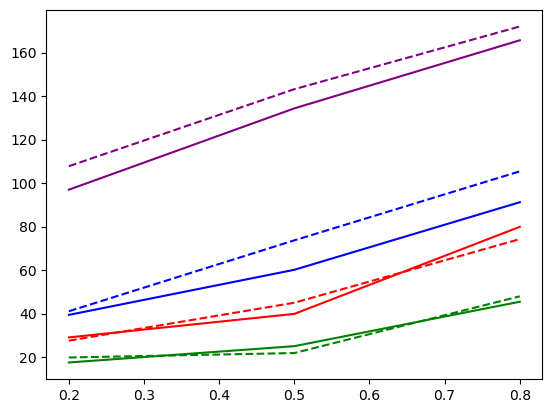

In [97]:
xposition = [0.2,0.5,0.8]
colors = ['red','blue','green','purple']
for i in range(4):
    color = colors[i % len(colors)] 
    plt.plot(xposition, [np.float64(NorActivatedPercentUp1[i]),np.float64(NorActivatedPercentUp2[i]),np.float64(NorActivatedPercentUp3[i])], color = color)
    plt.plot(xposition, [np.float64(NorActivatedPercentUp1CC[i]),np.float64(NorActivatedPercentUp2CC[i]),np.float64(NorActivatedPercentUp3CC[i])] ,color = color, linestyle = '--')

In [98]:
(ECGroup[i]['ActivatedNumberUpdraft1'].isel(lev = 0)/1E6).median()/np.float64(ECCDNC_ds['NoCC CDNC ($cm^{-3}$)'][i])*100

<xarray.DataArray 'ActivatedNumberUpdraft1' ()> Size: 8B
np.float64(26.364818957409142)
Coordinates:
    lev      float32 4B 998.9
    station  <U6 24B 'SMR-II'
    Dx       float64 8B 0.03765
    index    <U19 76B 'Cluster 2 Updraft 1'

In [99]:

((ECGroup[2]['Tot_dis'].isel(lev = 0).where(ECearth_ds['D']>ECActR[2]).sum('D')*dx[0])/1E6).dropna('time').mean()

<xarray.DataArray ()> Size: 8B
np.float64(113.31890216177399)
Coordinates:
    lev      float32 4B 998.9
    station  <U6 24B 'SMR-II'
    Dx       float64 8B 0.03765
    index    <U19 76B 'Cluster 2 Updraft 1'
    D        float64 8B 0.3162

In [100]:
CCN = []
CCNCC = []
for i in range(6):
    CCN.append((ECGroup[i]['ActivatedNumberUpdraft1'].isel(lev = 0)/1E6).mean())
    CCNCC.append((ECGroup[i]['ActivatedNumberUpdraft1CC'].isel(lev = 0)/1E6).mean())
for i in range(6):
    CCN.append((ECGroup[i]['ActivatedNumberUpdraft2'].isel(lev = 0)/1E6).mean())
    CCNCC.append((ECGroup[i]['ActivatedNumberUpdraft2CC'].isel(lev = 0)/1E6).mean())
for i in range(6):
    CCN.append((ECGroup[i]['ActivatedNumberUpdraft3'].isel(lev = 0)/1E6).mean())
    CCNCC.append((ECGroup[i]['ActivatedNumberUpdraft3CC'].isel(lev = 0)/1E6).mean())
NorCCN = []
NorCCNCC = []
for i in range(4):
    NorCCN.append((NorGroup[i]['ActivatedNumberUpdraft1'].isel(lev = -1)).mean())
    NorCCNCC.append((NorGroup[i]['ActivatedNumberUpdraft1CC'].isel(lev = -1)).mean())
for i in range(4):
    NorCCN.append((NorGroup[i]['ActivatedNumberUpdraft2'].isel(lev = -1)).mean())
    NorCCNCC.append((NorGroup[i]['ActivatedNumberUpdraft2CC'].isel(lev = -1)).mean())
for i in range(4):
    NorCCN.append((NorGroup[i]['ActivatedNumberUpdraft3'].isel(lev = -1)).mean())
    NorCCNCC.append((NorGroup[i]['ActivatedNumberUpdraft3CC'].isel(lev = -1)).mean())


In [101]:
CCN = []
CCNCC = []
for i in range(6):
    CCN.append((ECGroup[i]['ActivatedNumberUpdraft1'].isel(lev = 0)/1E6).median())
    CCNCC.append((ECGroup[i]['ActivatedNumberUpdraft1CC'].isel(lev = 0)/1E6).median())
for i in range(6):
    CCN.append((ECGroup[i]['ActivatedNumberUpdraft2'].isel(lev = 0)/1E6).median())
    CCNCC.append((ECGroup[i]['ActivatedNumberUpdraft2CC'].isel(lev = 0)/1E6).median())
for i in range(6):
    CCN.append((ECGroup[i]['ActivatedNumberUpdraft3'].isel(lev = 0)/1E6).median())
    CCNCC.append((ECGroup[i]['ActivatedNumberUpdraft3CC'].isel(lev = 0)/1E6).median())
NorCCN = []
NorCCNCC = []
for i in range(4):
    NorCCN.append((NorGroup[i]['ActivatedNumberUpdraft1'].isel(lev = -1)).median())
    NorCCNCC.append((NorGroup[i]['ActivatedNumberUpdraft1CC'].isel(lev = -1)).median())
for i in range(4):
    NorCCN.append((NorGroup[i]['ActivatedNumberUpdraft2'].isel(lev = -1)).median())
    NorCCNCC.append((NorGroup[i]['ActivatedNumberUpdraft2CC'].isel(lev = -1)).median())
for i in range(4):
    NorCCN.append((NorGroup[i]['ActivatedNumberUpdraft3'].isel(lev = -1)).median())
    NorCCNCC.append((NorGroup[i]['ActivatedNumberUpdraft3CC'].isel(lev = -1)).median())


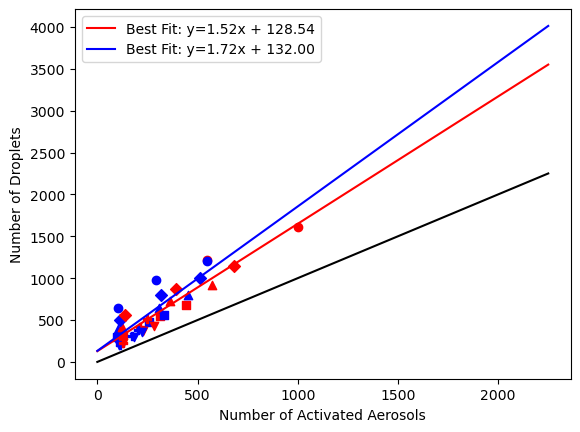

In [102]:
x = np.linspace(0, 2250,10)
slopeNoCC, interceptNoCC = np.polyfit(CCN,ECCDNC_ds['NoCC CDNC ($cm^{-3}$)'], 1)
slopeCC, interceptCC = np.polyfit(CCNCC[1:],ECCDNC_ds['CC CDNC ($cm^{-3}$)'][1:], 1)
lineCC = slopeCC * x + interceptCC
line = slopeNoCC * x + interceptNoCC
markers = ['o', 's', 'v', '^', 'D', 'P']
for i in range(18):
    plt.scatter(CCN[i],ECCDNC_ds['NoCC CDNC ($cm^{-3}$)'][i], marker = markers[i % 6], color = 'blue')
    plt.scatter(CCNCC[i],ECCDNC_ds['CC CDNC ($cm^{-3}$)'][i], marker = markers[i % 6], color = 'red')
plt.plot(x, lineCC, 'r-', label=f'Best Fit: y={slopeCC:.2f}x + {interceptCC:.2f}')

plt.plot(x, line, 'b-', label=f'Best Fit: y={slopeNoCC:.2f}x + {interceptNoCC:.2f}')

plt.xlabel('Number of Activated Aerosols')
plt.ylabel('Number of Droplets')
plt.legend()
plt.plot(x, x, color ='black', label='x = y')


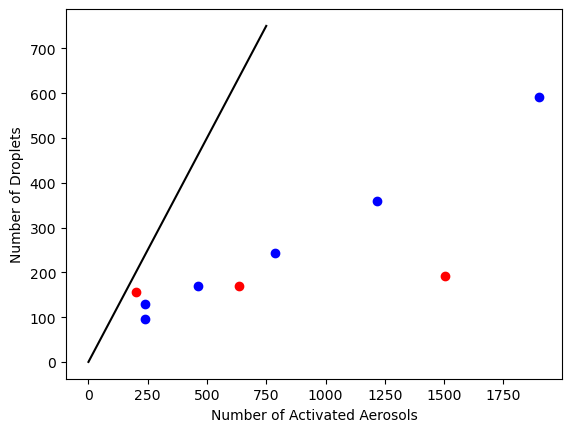

In [103]:
x = np.linspace(0, 750,10)

for i in range(6):
    plt.scatter(ECGroup[i]['TotN70'].isel(lev = 0).median()/1E6,ECGroup[i]['Droplets'].isel(lev = 0).median(), color = 'blue')
for i in range(4):
    plt.scatter(NorGroup[i]['TotN70'].isel(lev = -1).median(),NorGroup[i]['Droplets'].isel(lev = -1).median(), color = 'red')
plt.xlabel('Number of Activated Aerosols')
plt.ylabel('Number of Droplets')
plt.plot(x, x, color ='black', label='x = y')

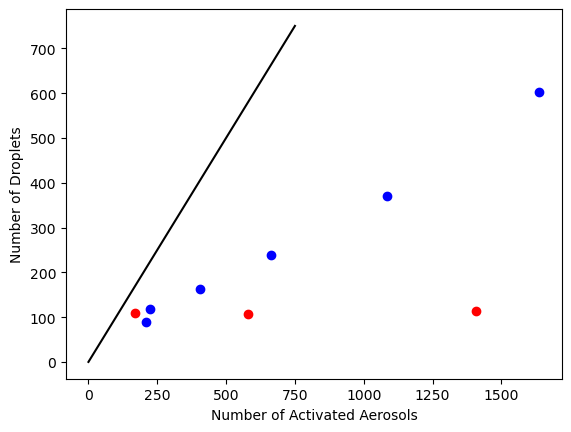

In [104]:
x = np.linspace(0, 750,10)

for i in range(6):
    plt.scatter(ECGroup[i]['TotN70'].isel(lev = 1).median()/1E6,ECGroup[i]['Droplets'].isel(lev = 1).median(), color = 'blue')
for i in range(4):
    plt.scatter(NorGroup[i]['TotN70'].isel(lev = -2).median(),NorGroup[i]['Droplets'].isel(lev = -2).median(), color = 'red')
plt.xlabel('Number of Activated Aerosols')
plt.ylabel('Number of Droplets')
plt.plot(x, x, color ='black', label='x = y')

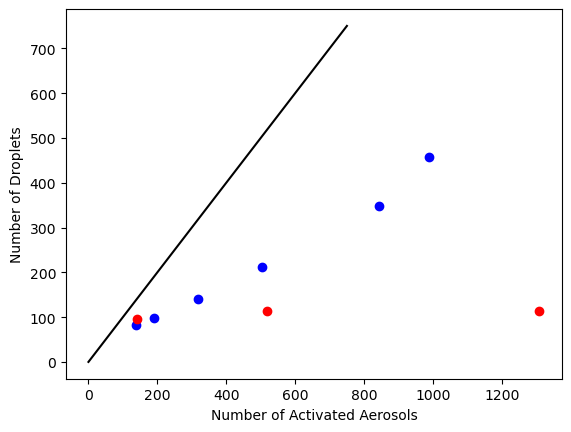

In [105]:
x = np.linspace(0, 750,10)

for i in range(6):
    plt.scatter(ECGroup[i]['TotN70'].isel(lev = 2).median()/1E6,ECGroup[i]['Droplets'].isel(lev = 2).median(), color = 'blue')
for i in range(4):
    plt.scatter(NorGroup[i]['TotN70'].isel(lev = -3).median(),NorGroup[i]['Droplets'].isel(lev = -3).median(), color = 'red')
plt.xlabel('Number of Activated Aerosols')
plt.ylabel('Number of Droplets')
plt.plot(x, x, color ='black', label='x = y')

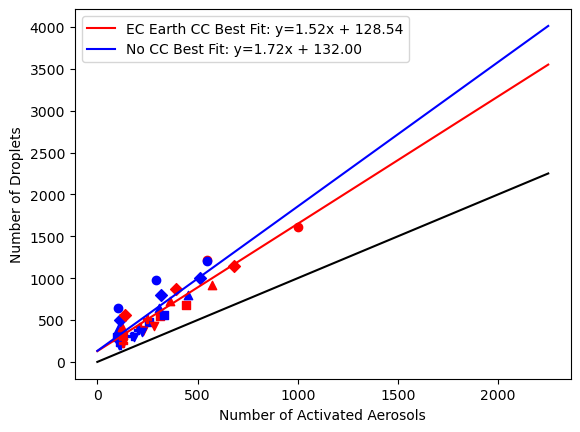

In [106]:
x = np.linspace(0, 2250,10)
slopeNoCC, interceptNoCC = np.polyfit(CCN,ECCDNC_ds['NoCC CDNC ($cm^{-3}$)'], 1)
slopeCC, interceptCC = np.polyfit(CCNCC[1:],ECCDNC_ds['CC CDNC ($cm^{-3}$)'][1:], 1)
lineCC = slopeCC * x + interceptCC
line = slopeNoCC * x + interceptNoCC
markers = ['o', 's', 'v', '^', 'D', 'P']
for i in range(18):
    plt.scatter(CCN[i],ECCDNC_ds['NoCC CDNC ($cm^{-3}$)'][i], marker = markers[i % 6], color = 'blue')
    plt.scatter(CCNCC[i],ECCDNC_ds['CC CDNC ($cm^{-3}$)'][i], marker = markers[i % 6], color = 'red')
plt.plot(x, lineCC, 'r-', label=f'EC Earth CC Best Fit: y={slopeCC:.2f}x + {interceptCC:.2f}')

plt.plot(x, line, 'b-', label=f'No CC Best Fit: y={slopeNoCC:.2f}x + {interceptNoCC:.2f}')

plt.xlabel('Number of Activated Aerosols')
plt.ylabel('Number of Droplets')
plt.legend()
plt.plot(x, x, color ='black', label='x = y')


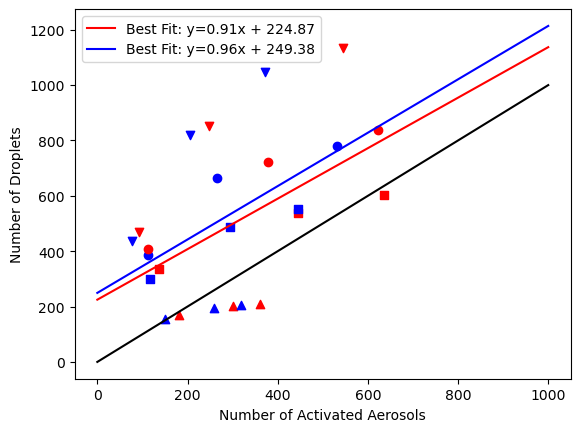

In [107]:
x = np.linspace(0, 1000,10)
NorslopeNoCC, NorinterceptNoCC = np.polyfit(NorCCN,NorCDNC_ds['NoCC CDNC ($cm^{-3}$)'], 1)
NorslopeCC, NorinterceptCC = np.polyfit(NorCCNCC[1:],NorCDNC_ds['CC CDNC ($cm^{-3}$)'][1:], 1)
NorlineCC = NorslopeCC * x + NorinterceptCC
Norline = NorslopeNoCC * x + NorinterceptNoCC
markers = ['o', 's', 'v', '^']
for i in range(12):
    plt.scatter(NorCCN[i],NorCDNC_ds['NoCC CDNC ($cm^{-3}$)'][i], marker = markers[i % 4], color = 'blue')
    plt.scatter(NorCCNCC[i],NorCDNC_ds['CC CDNC ($cm^{-3}$)'][i], marker = markers[i % 4], color = 'red')
plt.plot(x, NorlineCC, 'r-', label=f'Best Fit: y={NorslopeCC:.2f}x + {NorinterceptCC:.2f}')

plt.plot(x, Norline, 'b-', label=f'Best Fit: y={NorslopeNoCC:.2f}x + {NorinterceptNoCC:.2f}')

plt.xlabel('Number of Activated Aerosols')
plt.ylabel('Number of Droplets')
plt.legend()
plt.plot(x, x, color ='black', label='x = y')


In [108]:
slopeNoCC

np.float64(1.7242013293031946)

In [109]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(CCN, np.float64(ECCDNC_ds['NoCC CDNC ($cm^{-3}$)']))
                                        


In [110]:
slope

np.float64(1.7242013293031953)

In [111]:
r_value

np.float64(0.8398155602822471)

In [112]:
print(np.float64(CCN)[0:6])
print(np.float64(CCN)[6:12])
print(np.float64(CCN)[12:18])

[103.74889327  98.90069228 109.79903843 103.87738669 115.61164168
 110.97749214]
[293.03696611 259.01018904 183.29412734 307.90559074 315.25175105
 173.96099326]
[549.6688854  331.76481802 220.56774839 451.95070095 512.7210423
 203.51727032]


In [113]:
np.float64(ECCDNC_ds['NoCC CDNC ($cm^{-3}$)'])

array([ 644.,  300.,  207.,  394.,  496.,  198.,  977.,  474.,  303.,
        640.,  796.,  305., 1209.,  564.,  356.,  798., 1000.,  380.])

In [114]:
ECGroup[1]['ActivatedNumberUpdraft1'].mean()/1E6

<xarray.DataArray 'ActivatedNumberUpdraft1' ()> Size: 8B
np.float64(17.41874503977224)
Coordinates:
    station  <U6 24B 'SMR-II'
    Dx       float64 8B 0.03765
    index    <U19 76B 'Cluster 2 Updraft 1'

In [115]:
np.float64(CCN)

array([103.74889327,  98.90069228, 109.79903843, 103.87738669,
       115.61164168, 110.97749214, 293.03696611, 259.01018904,
       183.29412734, 307.90559074, 315.25175105, 173.96099326,
       549.6688854 , 331.76481802, 220.56774839, 451.95070095,
       512.7210423 , 203.51727032])

In [116]:
ECParsecActivatedNumber = [ 697.98601545,  307.12073215,  216.08362304,  401.490477  ,
        513.97946329,  206.10580896, 1052.50384102,  490.63046998,
        311.71483773,  663.69494594,  845.56783003,  326.74899515,
       1348.06327298,  586.52782858,  367.35097776,  832.36247683,
       1069.92051396,  423.71160092]
ECParsecActivatedNumberCC = [np.nan,  329.1303442 ,  232.55622821,  425.99755994,
        566.19180573,  225.1833819 , 1348.06327298,  568.86663733,
        379.79380959,  754.07533413,  918.28904452,  451.15416564,
       1822.62207734,  705.41044274,  444.90564644,  965.47695031,
       1227.19914176,  580.40515481]

In [117]:
np.float64(CCNCC)

array([         nan, 126.17486895, 128.0446592 , 120.8515429 ,
       136.91980826, 126.33461123, 549.6688854 , 313.28549782,
       230.40617867, 364.31028966, 391.09593335, 213.00131129,
       999.30922892, 443.30287447, 284.77228905, 571.32574246,
       682.95708414, 249.60658323])

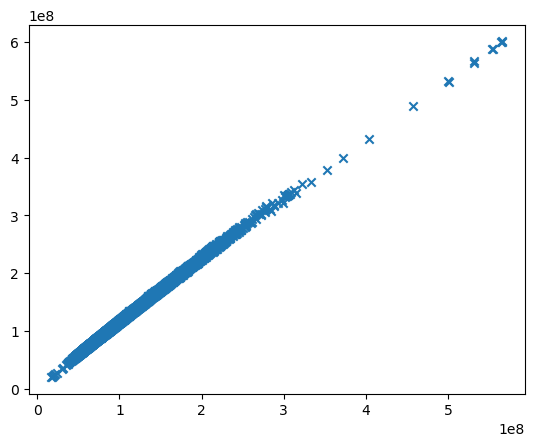

In [118]:
plt.scatter(ECGroup[3]['ActivatedNumberUpdraft1'].isel(lev = 0), ECGroup[3]['ActivatedNumberUpdraft1CC'].isel(lev = 0), marker = 'x',)

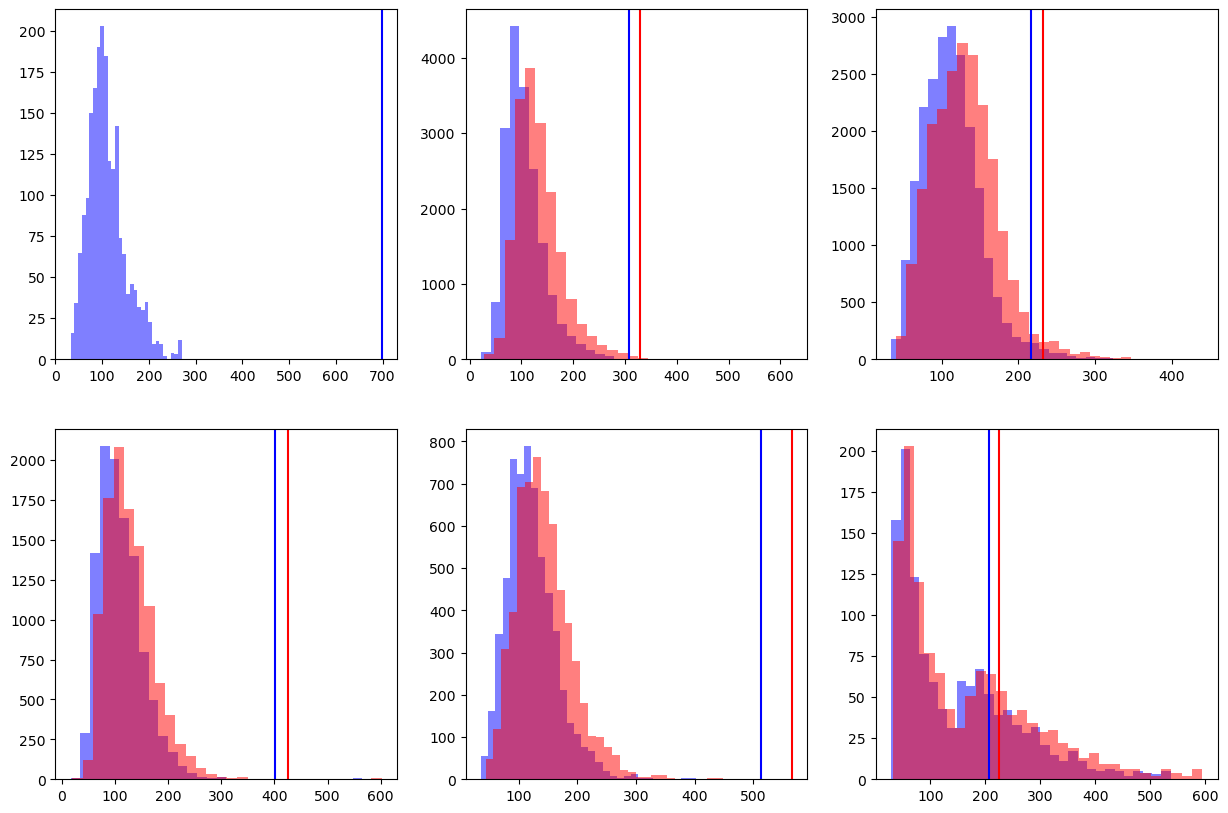

In [119]:
fig = plt.figure(figsize = (15,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    if i == 0:
        plt.hist(ECGroup[i]['ActivatedNumberUpdraft1'].isel(lev = 0)/1E6,bins = 30, color = 'blue', alpha = 0.5, label = 'No CC')
        plt.axvline(ECParsecActivatedNumber[i], color = 'blue',label = 'Parsec Activated Number, No CC')
        continue
    plt.subplot(2,3,i+1)
    plt.hist(ECGroup[i]['ActivatedNumberUpdraft1'].isel(lev = 0)/1E6,bins = 30, color = 'blue', alpha = 0.5, label = 'No CC')
    plt.hist(ECGroup[i]['ActivatedNumberUpdraft1CC'].isel(lev = 0)/1E6,bins = 30, color = 'red', alpha = 0.5, label = 'With CC')
    plt.axvline(ECParsecActivatedNumberCC[i], color = 'red', label = 'Parsec Activated Number, No CC')
    plt.axvline(ECParsecActivatedNumber[i], color = 'blue', label = 'Parsec Activated Number, With CC')


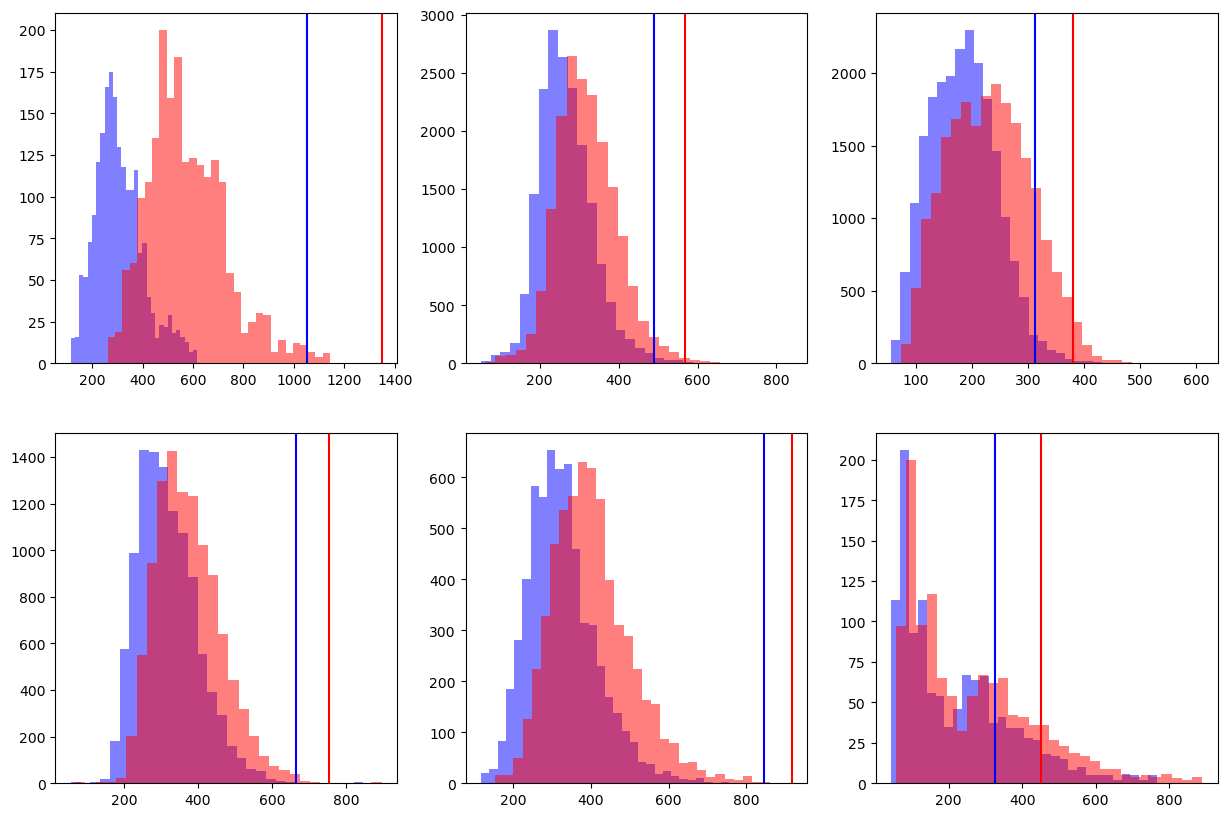

In [120]:
fig = plt.figure(figsize = (15,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.hist(ECGroup[i]['ActivatedNumberUpdraft2'].isel(lev = 0)/1E6,bins = 30, color = 'blue', alpha = 0.5, label = 'No CC')
    plt.hist(ECGroup[i]['ActivatedNumberUpdraft2CC'].isel(lev = 0)/1E6,bins = 30, color = 'red', alpha = 0.5, label = 'With CC')
    plt.axvline(ECParsecActivatedNumberCC[i+6], color = 'red', label = 'Parsec Activated Number, No CC')
    plt.axvline(ECParsecActivatedNumber[i+6], color = 'blue', label = 'Parsec Activated Number, With CC')


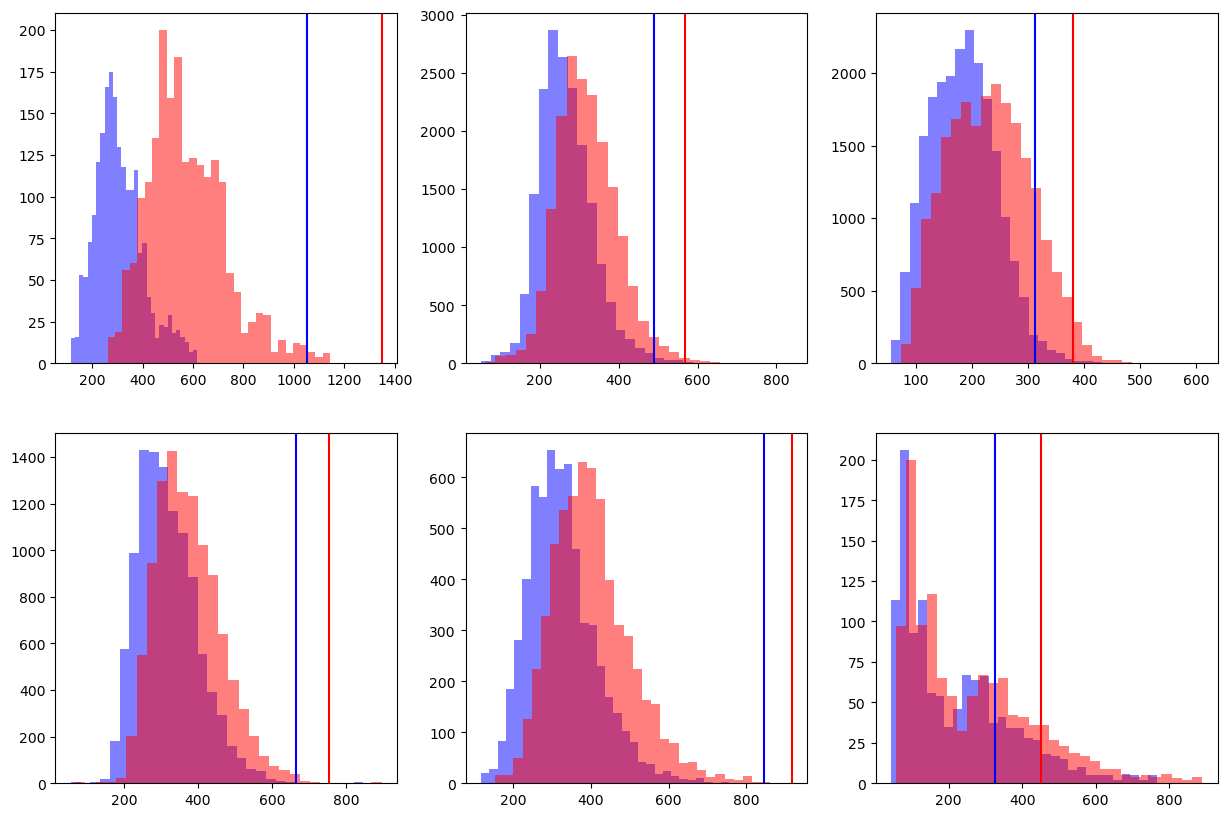

In [121]:
fig = plt.figure(figsize = (15,10))
for i in range(6):
    
    plt.subplot(2,3,i+1)
    plt.hist(ECGroup[i]['ActivatedNumberUpdraft2'].isel(lev = 0)/1E6,bins = 30, color = 'blue', alpha = 0.5, label = 'No CC')
    plt.hist(ECGroup[i]['ActivatedNumberUpdraft2CC'].isel(lev = 0)/1E6,bins = 30, color = 'red', alpha = 0.5, label = 'With CC')
    plt.axvline(ECParsecActivatedNumberCC[i+6], color = 'red', label = 'Parsec Activated Number, No CC')
    plt.axvline(ECParsecActivatedNumber[i+6], color = 'blue', label = 'Parsec Activated Number, With CC')


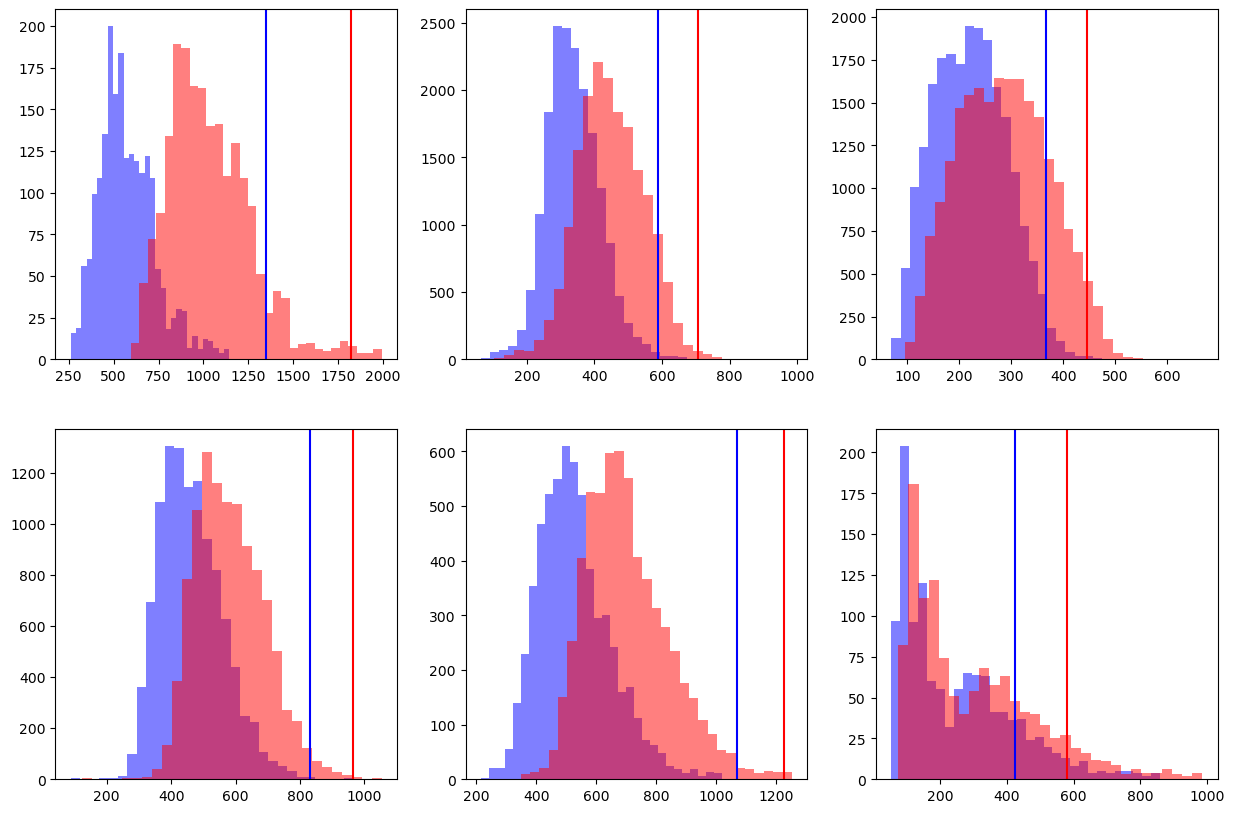

In [122]:
fig = plt.figure(figsize = (15,10))
for i in range(6):
    
    plt.subplot(2,3,i+1)
    plt.hist(ECGroup[i]['ActivatedNumberUpdraft3'].isel(lev = 0)/1E6,bins = 30, color = 'blue', alpha = 0.5, label = 'No CC')
    plt.hist(ECGroup[i]['ActivatedNumberUpdraft3CC'].isel(lev = 0)/1E6,bins = 30, color = 'red', alpha = 0.5, label = 'With CC')
    plt.axvline(ECParsecActivatedNumberCC[i+12], color = 'red', label = 'Parsec Activated Number, No CC')
    plt.axvline(ECParsecActivatedNumber[i+12], color = 'blue', label = 'Parsec Activated Number, With CC')


In [123]:
ECGroup[0]['D']>ECActR[0]

<xarray.DataArray 'D' (D: 200)> Size: 200B
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])
Coordinates:
    station  <U6 24B 'SMR-II'
  * D        (D) float64 2kB 0.3162 0.3331 0.3509 ... 9.011e+03 9.493e+03 1e+04
    Dx       float64 8B 0.03765
    index    <U19 76B 'Cluster 2 Updraft 1'